Project/homework
There are two tasks to choose from. Do one or the other (obligatory).

House Prices prediction. Practice data review, cleaning/preparing, feature engineering. Finally, build a model for a price prediction.
Predict the "cut" feature from the diamonds dataset.
This homework is obligatory. Please send colab link to kwant@agh.edu.pl before 13.03.2024.

## CHECK PY VERSION AND DISABLE WARRNING FROM SEABORN
# https://github.com/mwaskom/seaborn/issues/3462
# I'm using PyPy instead of CPython. For speed only

In [1]:
import platform
v = platform.python_version_tuple();
print(v)
if float(v[1]) < 10:
    raise Exception("MUST USE Python 3.10 to use MATCH expression!")

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

('3', '10', '12')


In [2]:
!pip install gdown numpy pandas seaborn matplotlib

In [3]:
# House Price

import gdown
gdown.download('https://drive.google.com/uc?id=1Z74AfhGE64qhyuO9Hgfj56xCJpZHocmA', 'house.zip', quiet=False)

!unzip -o house.zip

Downloading...
From: https://drive.google.com/uc?id=1Z74AfhGE64qhyuO9Hgfj56xCJpZHocmA
To: /home/mg/AI_ML_Course/ex_1/house.zip
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204k/204k [00:00<00:00, 1.37MB/s]

Archive:  house.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [5]:
# PLOTS are enabled SETTING THE DO_NOT_PLOT variable to False

In [6]:
DO_NOT_PLOT = False

In [7]:
# FUNCTIONS FOR PLOTS!

In [8]:
#define Seaborn color palette to use
import numpy as np
from math import ceil
from itertools import zip_longest

def plot_pie_for_unique_category(df,col_name_x, ax):
    if not DO_NOT_PLOT:
        colors = sns.color_palette('pastel')
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}", ax = ax)


def plot_hist_for_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        fig, axs = plt.subplots(nrows=len(unique_v_df), figsize=(16,10))
        i = 0;
        for index, row in unique_v_df.iterrows():
            value_percent = row.iloc[1];
            value = row.iloc[0];
            name = index;
            sns.histplot(data=df.loc[df[col_name_x] == name], x=col_name_y, ax = axs[i],bins=100, label =f'{col_name_x} {name} : {value} | {value_percent:.2f}%')
            axs[i].set_xlim(df[col_name_y].min(), df[col_name_y].max())
            axs[i].legend()
            i+=1
        fig.suptitle(f"{col_name_x} on {col_name_y}")
        plt.show()
        
def plot_hist_for_unique_category_stat(df,col_name_x,col_name_y, stat = 'count'):
    if not DO_NOT_PLOT:
        sns.histplot(data=df, x=col_name_x, stat = stat)
        plt.legend()
        plt.show()
                     
    
def plot_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        plot_hist_for_unique_category(df,col_name_x,col_name_y)
        fig, axs = plt.subplots(1, 2, figsize=(10,10))
        fig.tight_layout()
        plot_pie_for_unique_category(df,col_name_x,axs[0])
        sns.boxenplot(data=test_data_csv, x=col_name_x, y=col_name_y, ax = axs[1])
        plt.show()
    
def plot_hist_for_unique_category_array(df,col_names_x,col_name_y):
    if not DO_NOT_PLOT:
        for col_name_x in col_names_x:
            plot_hist_for_unique_category(df,col_name_x,col_name_y)
            plt.show()

#RAVEL returns flatted array, depricated. use to_numpy
def plot_pie_for_unique_category_array(df,col_names_x):
    if not DO_NOT_PLOT:
        n_rows, n_cols = ceil(len(col_names_x) / 3), 3
        fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20, 80))
        for col_name_x,ax in zip_longest(col_names_x,axs.ravel()):
            if col_name_x is not None:
                colors = sns.color_palette('pastel')
                unique_v_df = (df[col_name_x].value_counts()).to_frame()
                unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
                unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}",ax=ax )
            else:
                fig.delaxes(ax)
        plt.draw()
        plt.tight_layout()
    

def plot_correlation_for(df, col_name):
    if not DO_NOT_PLOT:
        corr = df.corr(numeric_only=True)[col_name].sort_values(ascending=False)
        print(corr)
        top_corr = corr[1:10]
        selected_features = list(top_corr.index) + [col_name]
        correlation_matrix = df[selected_features].corr()
        mask = np.triu(correlation_matrix)

        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", vmin=-1, vmax=1,mask=mask)
    
        plt.title(f"Top of correlation with{col_name}", fontsize=16)
        plt.show()

# check if IDs are unique and load all data from test.csv

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

dates_columns = ['YearBuilt','YearRemodAdd','GarageYrBlt']

test_data_csv = pd.read_csv("test.csv", parse_dates=dates_columns)
all_id_unique = test_data_csv['Id'].is_unique;
if all_id_unique:
    print("ALL ID ARE UNIQUE!")
else:
    print("NON_Unique IDS!!")



ALL ID ARE UNIQUE!


# Read CSV with prices, append it to the current, set Id column as Index

In [10]:
sample_submission_csv = pd.read_csv("sample_submission.csv")
all_id_unique = sample_submission_csv['Id'].is_unique;
if all_id_unique:
    print("ALL ID ARE UNIQUE!")
else:
    print("NON_Unique IDS!!")

test_data_csv = pd.merge(test_data_csv, sample_submission_csv, on="Id")

#We can switch to Id as index!
test_data_csv = test_data_csv.set_index('Id')

ALL ID ARE UNIQUE!


# CONVERT DATES

In [11]:
#Convert Dates
#print(test_data_csv["YrSold"].isnull().any())
#print(test_data_csv["MoSold"].isnull().any())
year_month = ["YrSold",'MoSold']

test_data_csv["SoldDate"] = pd.to_datetime(test_data_csv[year_month[0]].astype(str) + test_data_csv[year_month[1]].astype(str),format='%Y%m' )
test_data_csv = test_data_csv.drop(columns=year_month);


# Clear out data from NA, convert functions

In [12]:
from enum import Enum, unique

@unique
class PDataType(Enum):
    NUMERICAL = 1
    CATHEGORICAL = 2

def remove_distinct_value_features(df):
    return [e for e in df.columns if df[e].nunique() == 1]

def get_data_type(df, type):
    match type:
        case PDataType.NUMERICAL:
            return df.select_dtypes(np.number);
        case PDataType.CATHEGORICAL:
            return df.select_dtypes(include='object');

#select all cathegorigal data where the first value is more than percent%?
def get_cathegorical_data_by_percent(df, percent):
    col_names = get_data_type(df,PDataType.CATHEGORICAL)
    to_return = []
    for col_name in col_names:
        unique_v_df = (df[col_name].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        if unique_v_df.iloc[0].percent > percent:
            to_return.append(col_name);
    return to_return
    
def fill_empty_data_with(df, type, filler):
    col_names = get_data_type(df,type)
    for c in col_names:
        test_data_csv[c] = test_data_csv[c].fillna(filler)

## Fill GarageYrBlt with data YearBuilt

In [13]:
test_data_csv['GarageYrBlt'] = test_data_csv['GarageYrBlt'].fillna(test_data_csv['YearBuilt'])


In [14]:
#test_data_csv['Fence'] = test_data_csv['Fence'].fillna('NoFence')
#test_data_csv['PoolQC'] = test_data_csv['PoolQC'].fillna('NoPoolQC')
#test_data_csv['MiscFeature'] = test_data_csv['MiscFeature'].fillna('NoMiscFeature')
#test_data_csv['Alley'] = test_data_csv['Alley'].fillna('NoAlley')


fill_empty_data_with(test_data_csv,PDataType.CATHEGORICAL,"None")
#fill_empty_data_with(test_data_csv,PDataType.NUMERICAL,0)

to_drop_non_unique = remove_distinct_value_features(test_data_csv)
if not to_drop_non_unique:
    print(f"No non unique features")
else: 
    print(f"ToRemove {to_drop_non_unique}")
    test_data_csv.drop(to_drop_non_unique,axis=1,inplace=True)

only_numbers = get_data_type(test_data_csv,PDataType.NUMERICAL)

inf_in_numbers = only_numbers.columns.to_series()[np.isinf(only_numbers).any()]

if inf_in_numbers.empty:
    print("No Inf values")
else:
    print(f"Remove Inf values! in {inf_in_numbers}");

#test_data_csv.index[np.isinf(test_data_csv).any(1)]


No non unique features
No Inf values


# MSSubClass is not numerical!


In [15]:
'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_data_csv['MSSubClass'] = le.fit_transform(test_data_csv['MSSubClass'])
test_data_csv['MSSubClass'].info()
test_data_csv['MSSubClass'].describe()
plot_unique_category(test_data_csv,'MSSubClass','SalePrice');
# This is less efficient!
'''

"from sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ntest_data_csv['MSSubClass'] = le.fit_transform(test_data_csv['MSSubClass'])\ntest_data_csv['MSSubClass'].info()\ntest_data_csv['MSSubClass'].describe()\nplot_unique_category(test_data_csv,'MSSubClass','SalePrice');\n# This is less efficient!\n"

<class 'pandas.core.series.Series'>
Index: 1459 entries, 1461 to 2919
Series name: MSSubClass
Non-Null Count  Dtype
--------------  -----
1459 non-null   int8 
dtypes: int8(1)
memory usage: 12.8 KB


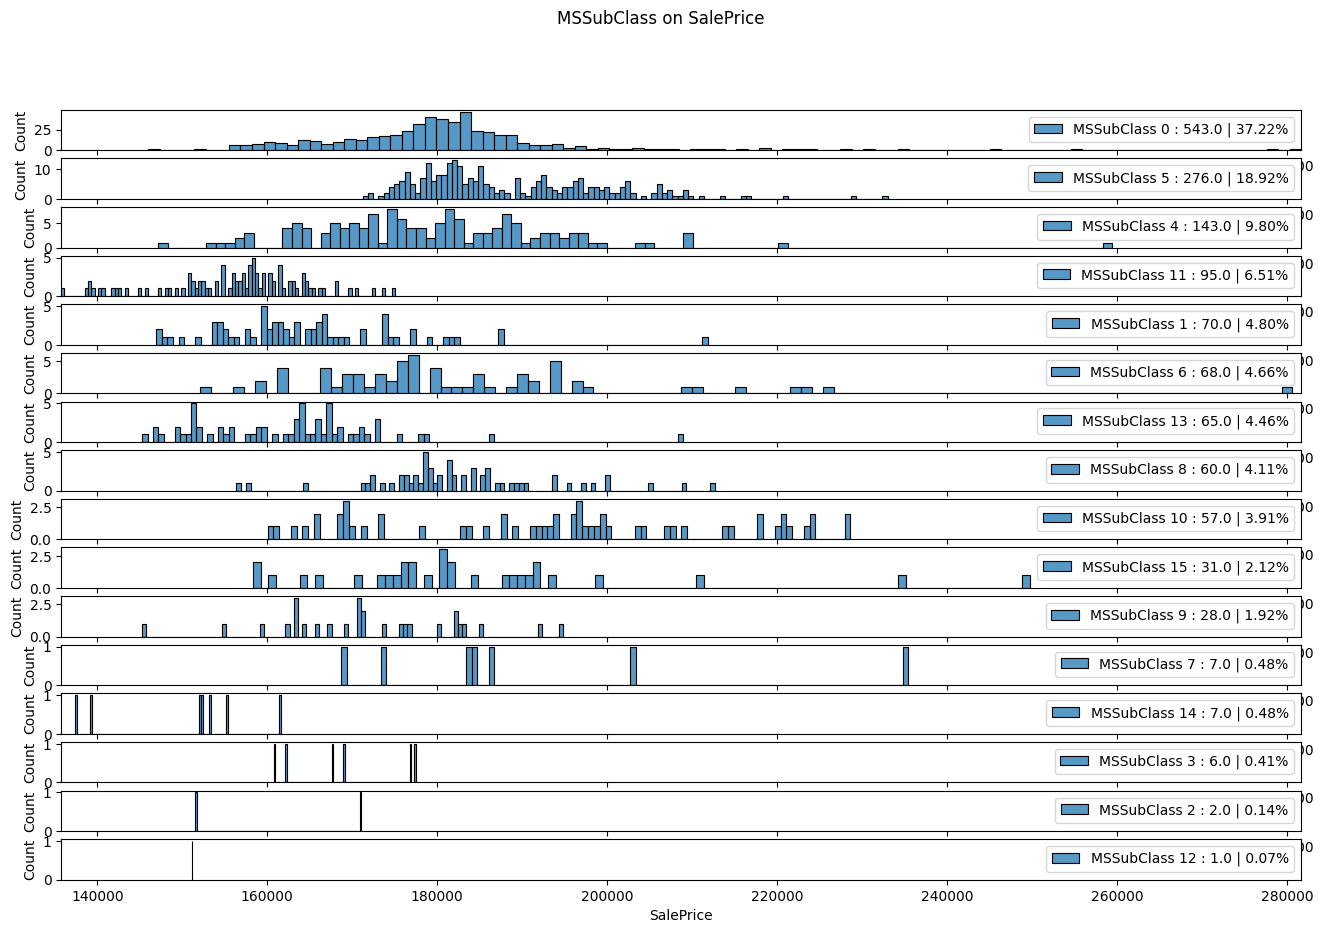

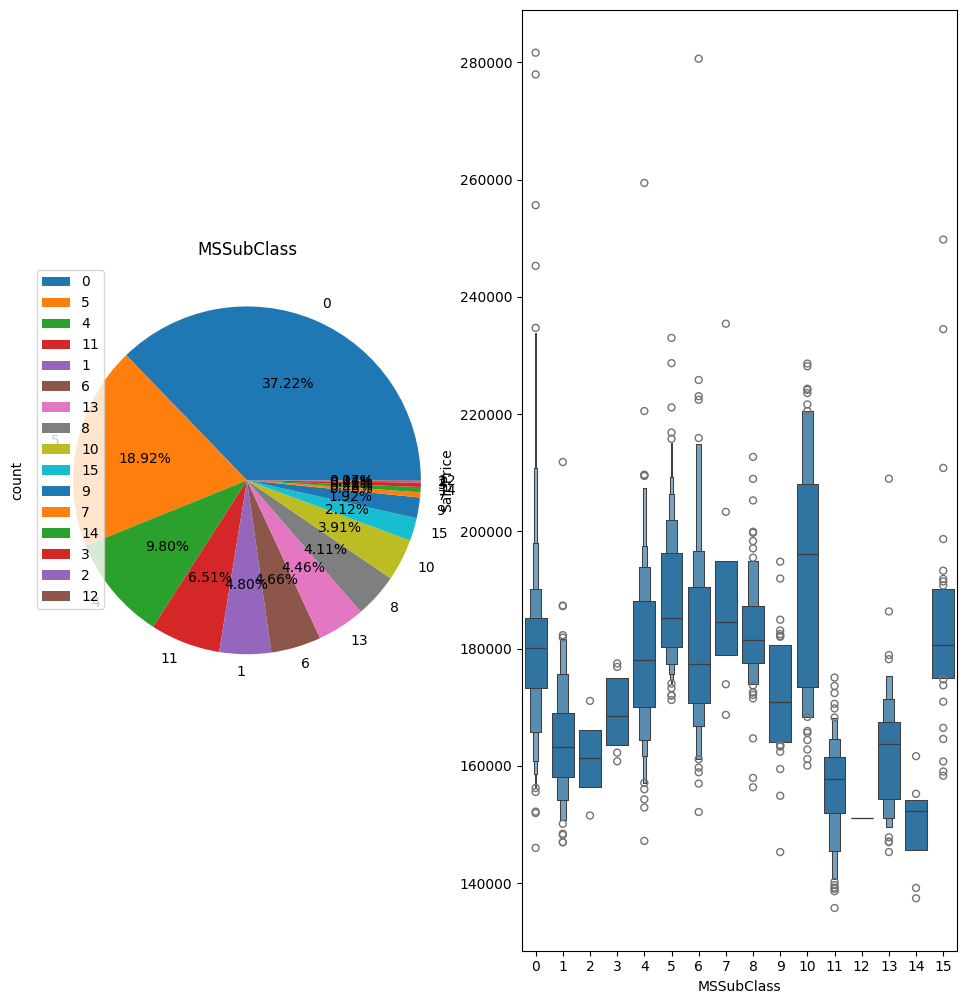

In [16]:
test_data_csv['MSSubClass'] = test_data_csv['MSSubClass'].astype('category')
cat_columns = test_data_csv.select_dtypes(['category']).columns

test_data_csv[cat_columns] = test_data_csv[cat_columns].apply(lambda x: x.cat.codes)
test_data_csv['MSSubClass'].info()
test_data_csv['MSSubClass'].describe()
plot_unique_category(test_data_csv,'MSSubClass','SalePrice');


In [17]:
## I should remove those values which are lower than some percentage right?

In [18]:
more_than_90 = []
for i in range(90,99,5):
    more_than = get_cathegorical_data_by_percent(test_data_csv,i);
    for x in more_than:
        more_than_90.append(x) 
more_than_90 = list(set(more_than_90))
#plot_pie_for_unique_category_array(test_data_csv, more_than_90)
#for column in more_than_90:
#    plot_unique_category(test_data_csv, column,'SalePrice');
#drop those columns at all?
print(more_than_90)


['Street', 'Electrical', 'GarageCond', 'Alley', 'MiscFeature', 'CentralAir', 'PoolQC', 'LandSlope', 'RoofMatl', 'Heating', 'Functional', 'Utilities', 'Condition2']


# To check if those values have any meaning for LinearRegresion, drop all columns that have less than 90% of 1 cathegorical value

In [19]:
#test_data_csv = test_data_csv.drop(columns=more_than_90);

## GarageType GarageYrBlt GarageFinish GarageCars GarageArea GarageQual GarageCond are all corelated. How to combine them?

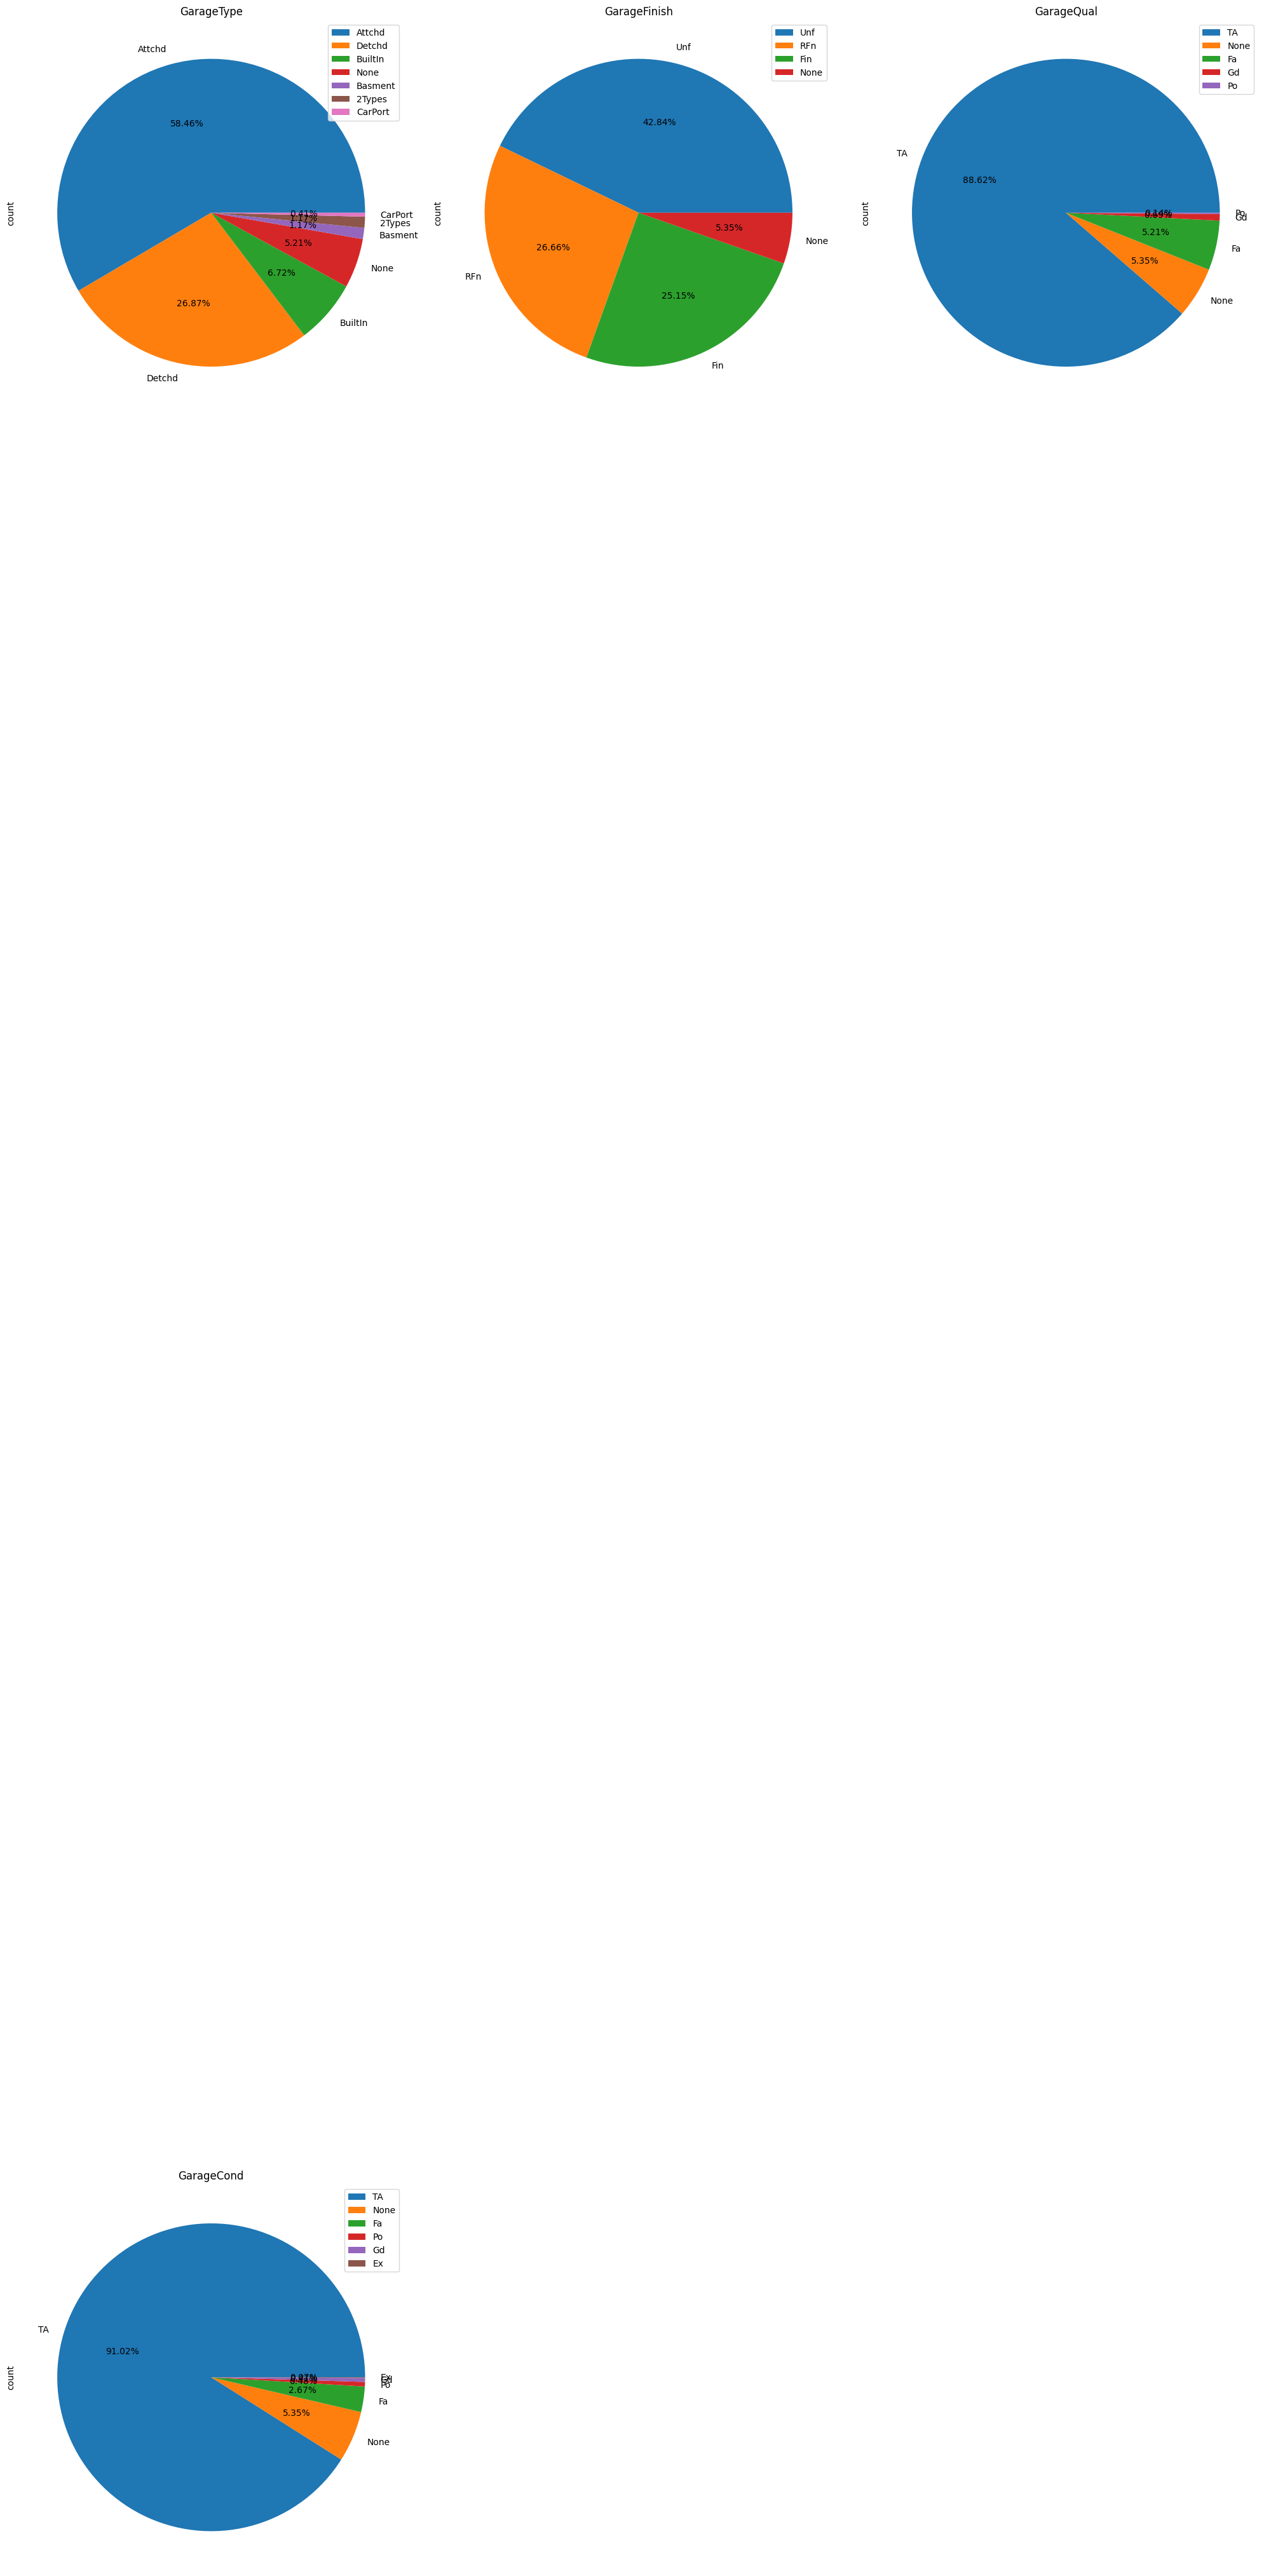

In [20]:
cols = get_data_type(test_data_csv, PDataType.CATHEGORICAL).filter(regex='Garage')
plot_pie_for_unique_category_array(test_data_csv, cols.columns.to_numpy())


## PoolArea PoolQC, we can remove the PoolQC

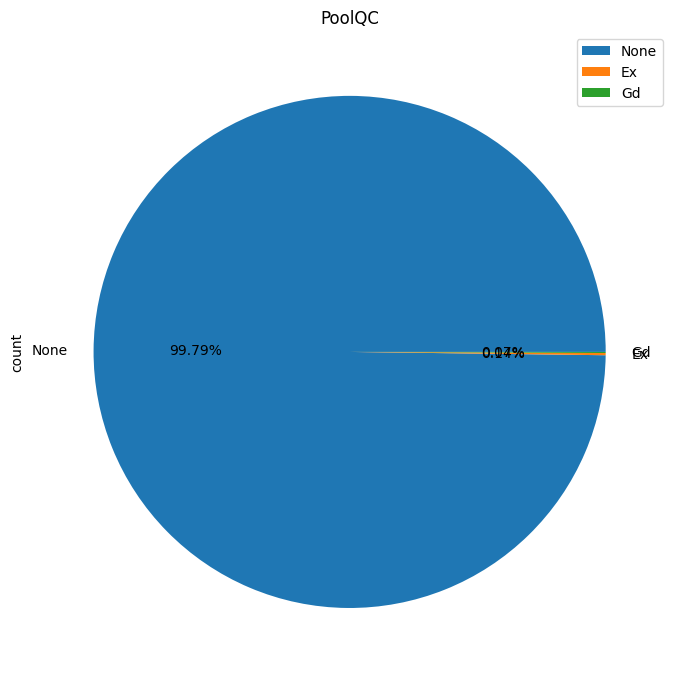

In [21]:
cols = get_data_type(test_data_csv, PDataType.CATHEGORICAL).filter(regex='Pool')
plot_pie_for_unique_category_array(test_data_csv, cols.columns.to_numpy())
test_data_csv.drop(columns = ['PoolQC'],axis=1,inplace=True)


# Fireplace 


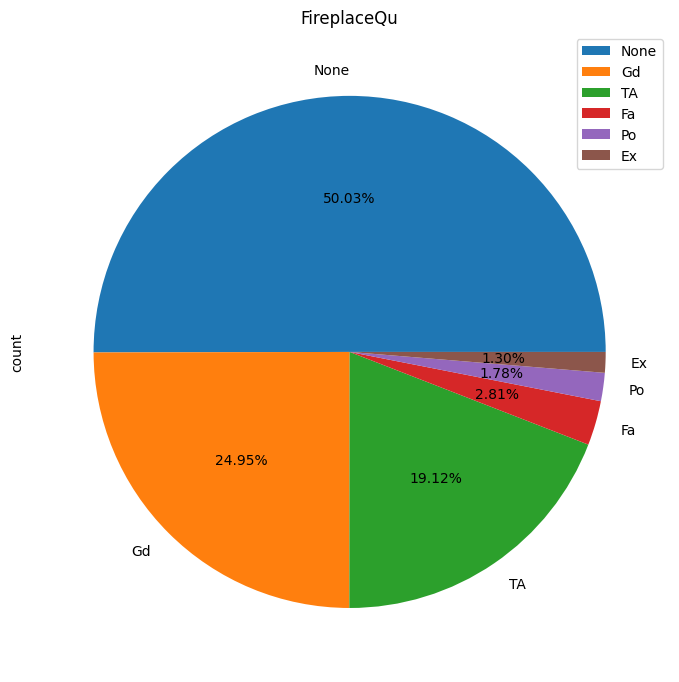

In [22]:
cols = get_data_type(test_data_csv, PDataType.CATHEGORICAL).filter(regex='Fireplace')
plot_pie_for_unique_category_array(test_data_csv, cols.columns.to_numpy())


In [23]:
## Basement?

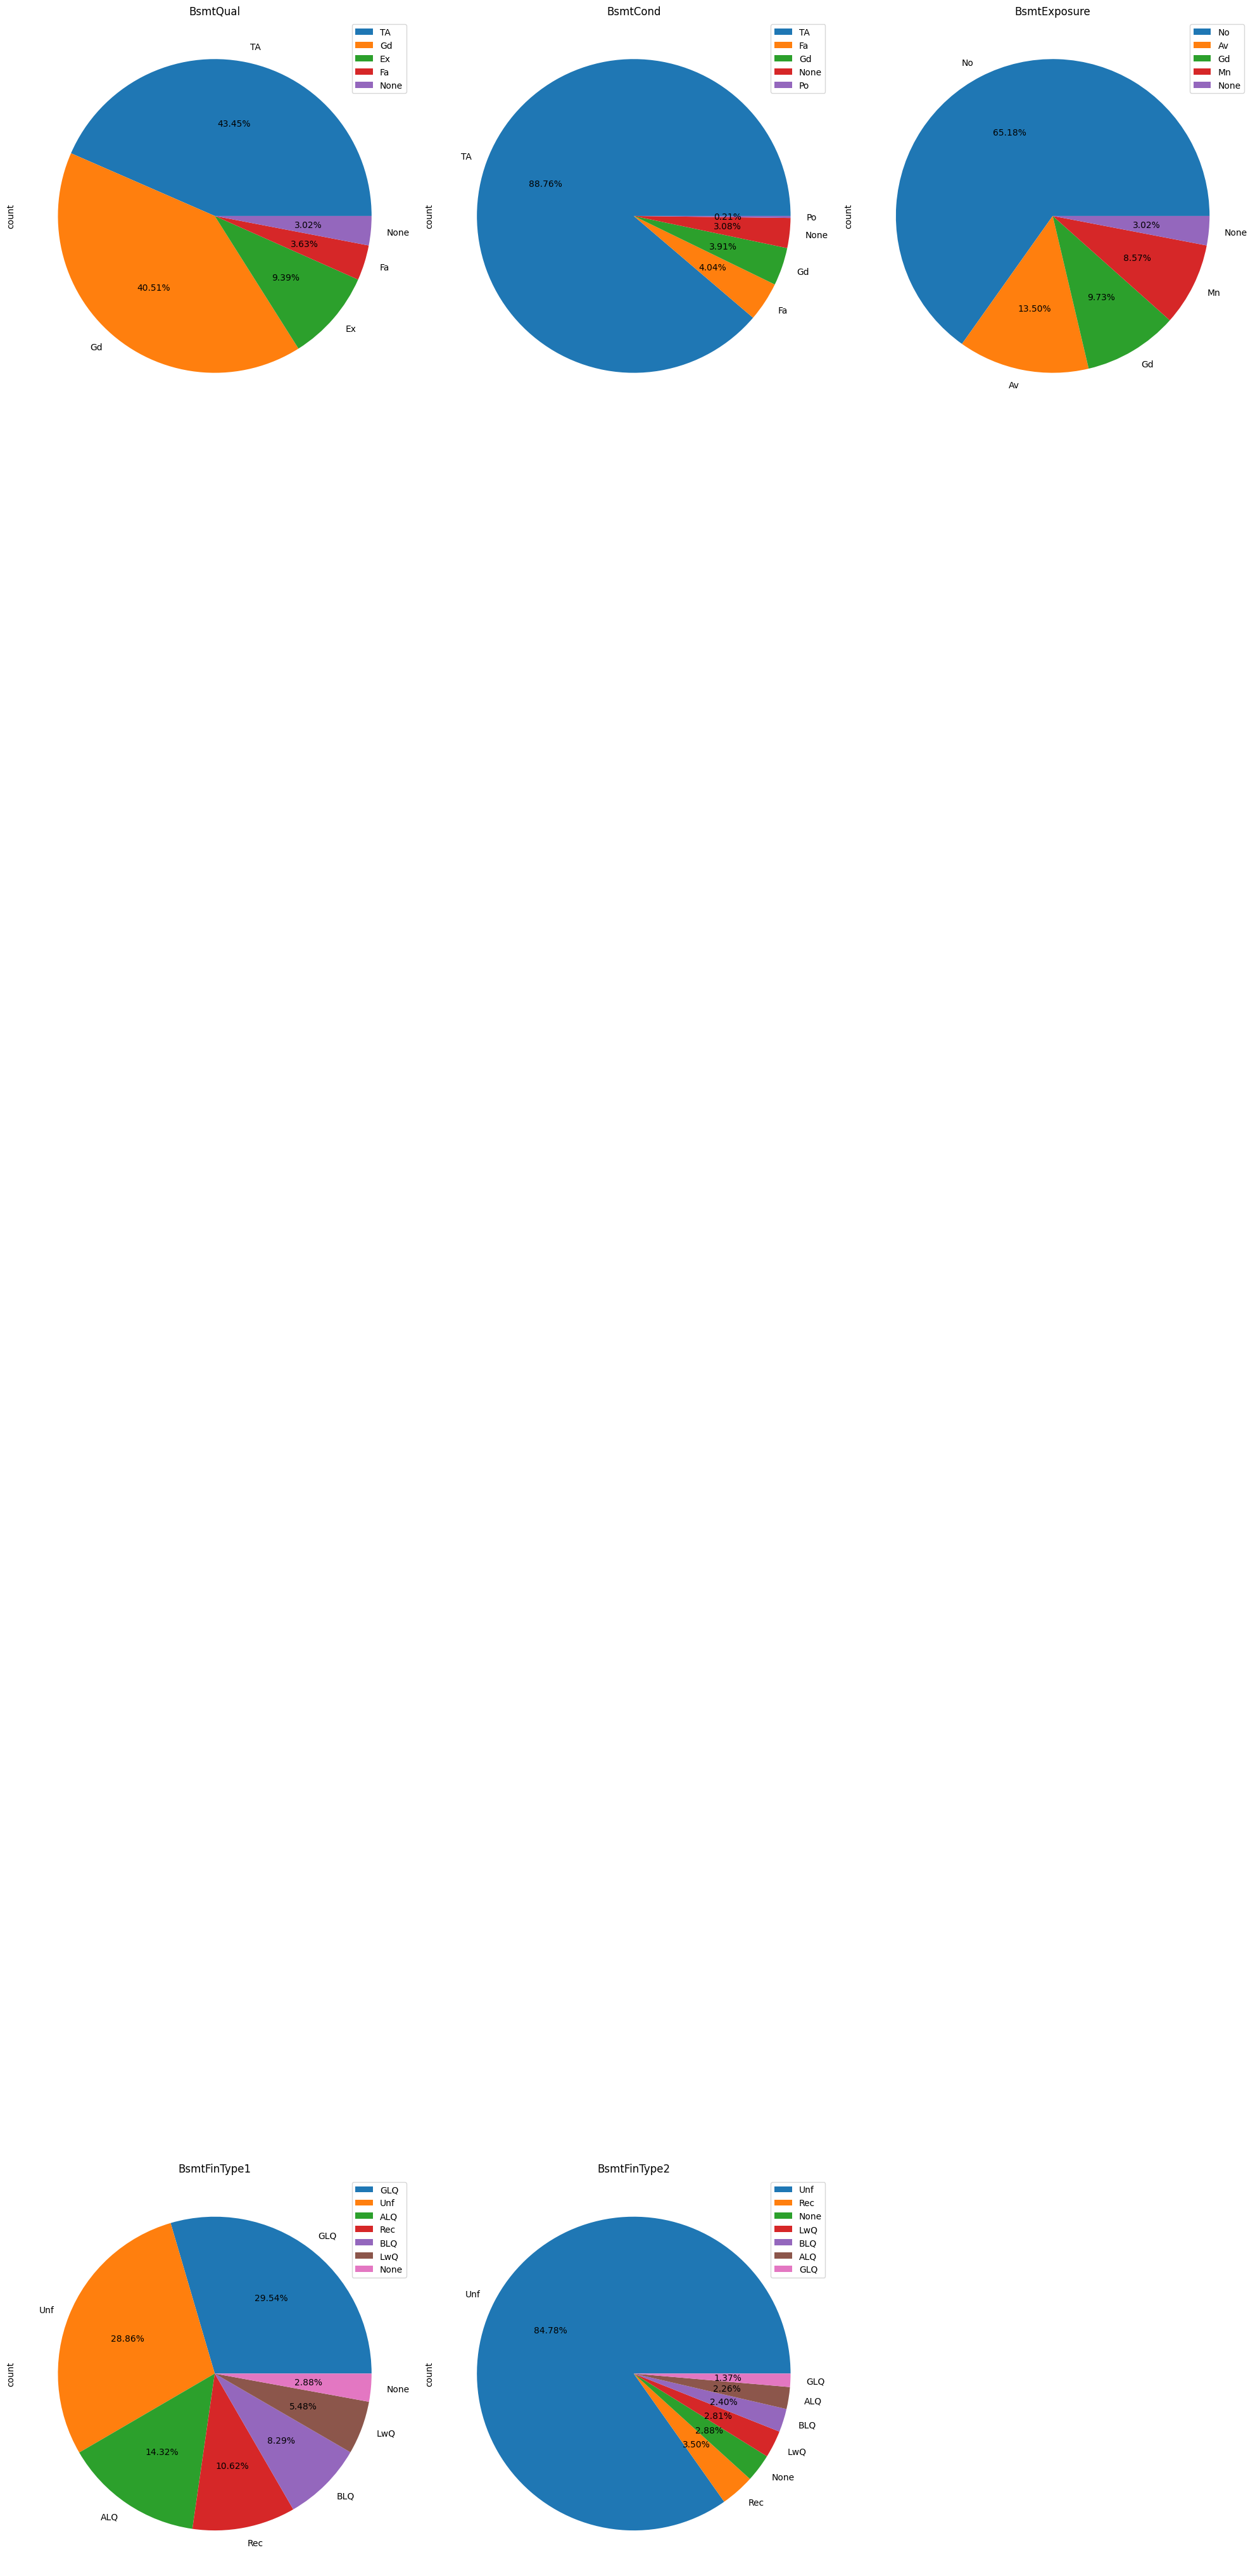

In [24]:
cols = get_data_type(test_data_csv, PDataType.CATHEGORICAL).filter(regex='Bsmt')
plot_pie_for_unique_category_array(test_data_csv, cols.columns.to_numpy())

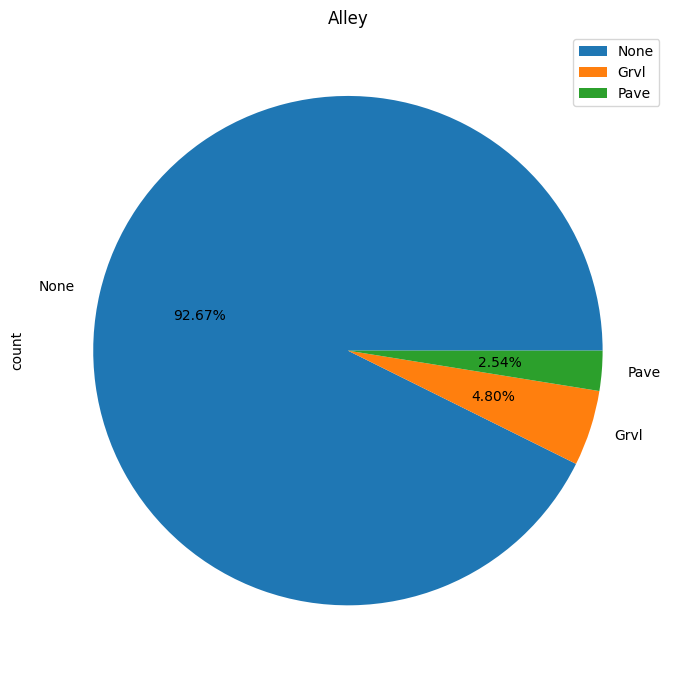

In [25]:
cols = get_data_type(test_data_csv, PDataType.CATHEGORICAL).filter(regex='Alley')
plot_pie_for_unique_category_array(test_data_csv, cols.columns.to_numpy())

In [26]:
print(test_data_csv.describe())
print(test_data_csv.info())
print(test_data_csv.shape)

        MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000   
mean      4.296093    68.580357   9819.161069     6.078821     5.553804   
min       0.000000    21.000000   1470.000000     1.000000     1.000000   
25%       0.000000    58.000000   7391.000000     5.000000     5.000000   
50%       4.000000    67.000000   9399.000000     6.000000     5.000000   
75%       6.000000    80.000000  11517.500000     7.000000     6.000000   
max      15.000000   200.000000  56600.000000    10.000000     9.000000   
std       4.379313    22.376841   4955.517327     1.436812     1.113740   

                           YearBuilt                   YearRemodAdd  \
count                           1459                           1459   
mean   1971-05-11 19:25:37.217272104  1983-08-31 04:56:05.592871808   
min              1879-01-01 00:00:00            1950-01-01 00:00:00   
25%              1953-01-01 00:00:00    

In [27]:
print(test_data_csv[test_data_csv.isna().any(axis=1)])


      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1467           0       RL          NaN     7980   Pave  None      IR1   
1501          13       FV          NaN     2980   Pave  None      Reg   
1502          13       FV          NaN     2403   Pave  None      IR1   
1506           0       RL          NaN    10456   Pave  None      IR1   
1508           4       RL          NaN    18837   Pave  None      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2851           5       RL          NaN    21533   Pave  None      IR2   
2863           0       RL         75.0     8050   Pave  None      Reg   
2901           0       RL          NaN    50102   Pave  None      IR1   
2902           0       RL          NaN     8098   Pave  None      IR1   
2909          10       RL          NaN    11836   Pave  None      IR1   

     LandContour Utilities LotConfig  ... 3SsnPorc

# PLOTTING!

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt



count      1459.000000
mean     179183.918243
std       16518.303051
min      135751.318893
25%      168703.011202
50%      179208.665698
75%      186789.409363
max      281643.976117
Name: SalePrice, dtype: float64


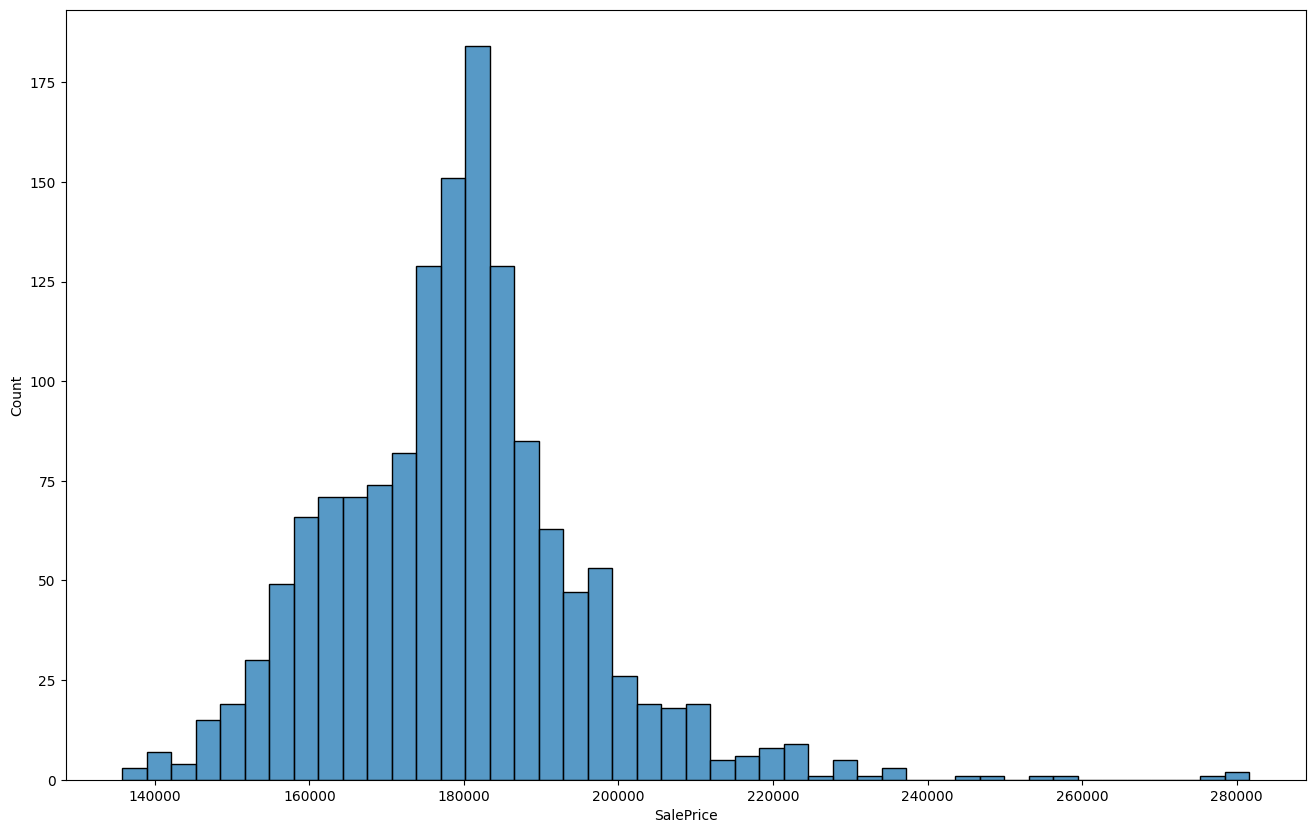

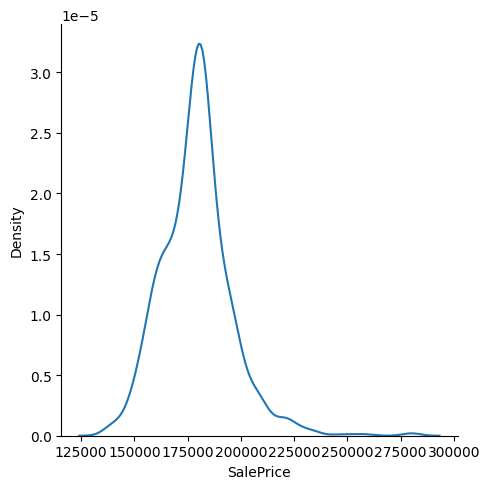

In [29]:
fig, axs = plt.subplots(1, figsize=(16,10))
if not DO_NOT_PLOT:
    sns.histplot(test_data_csv["SalePrice"], ax = axs)
    sns.displot(test_data_csv["SalePrice"], kind = 'kde') # I have no idea what it means..

print(test_data_csv["SalePrice"].describe())

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

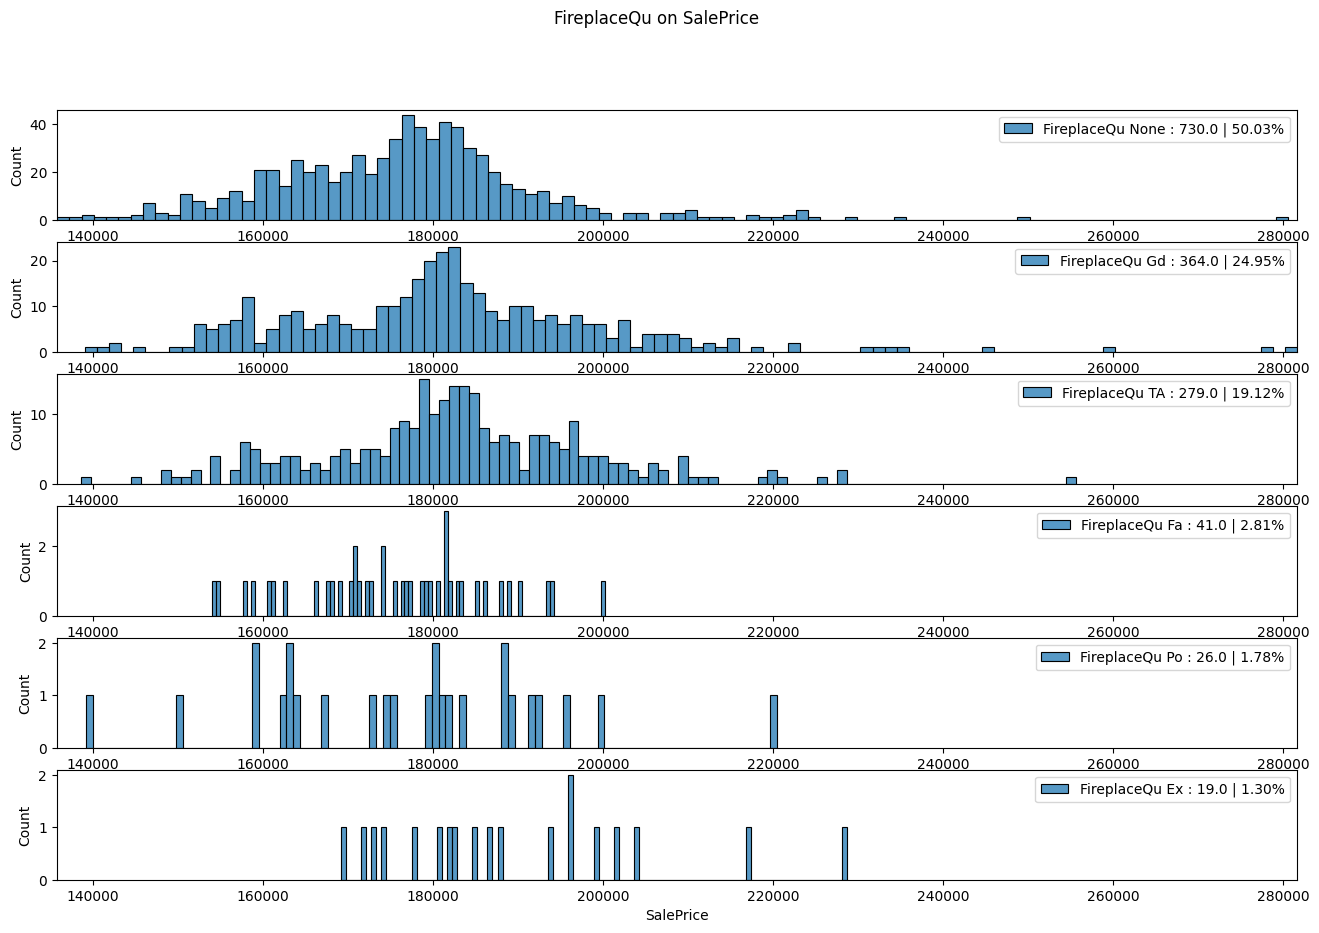

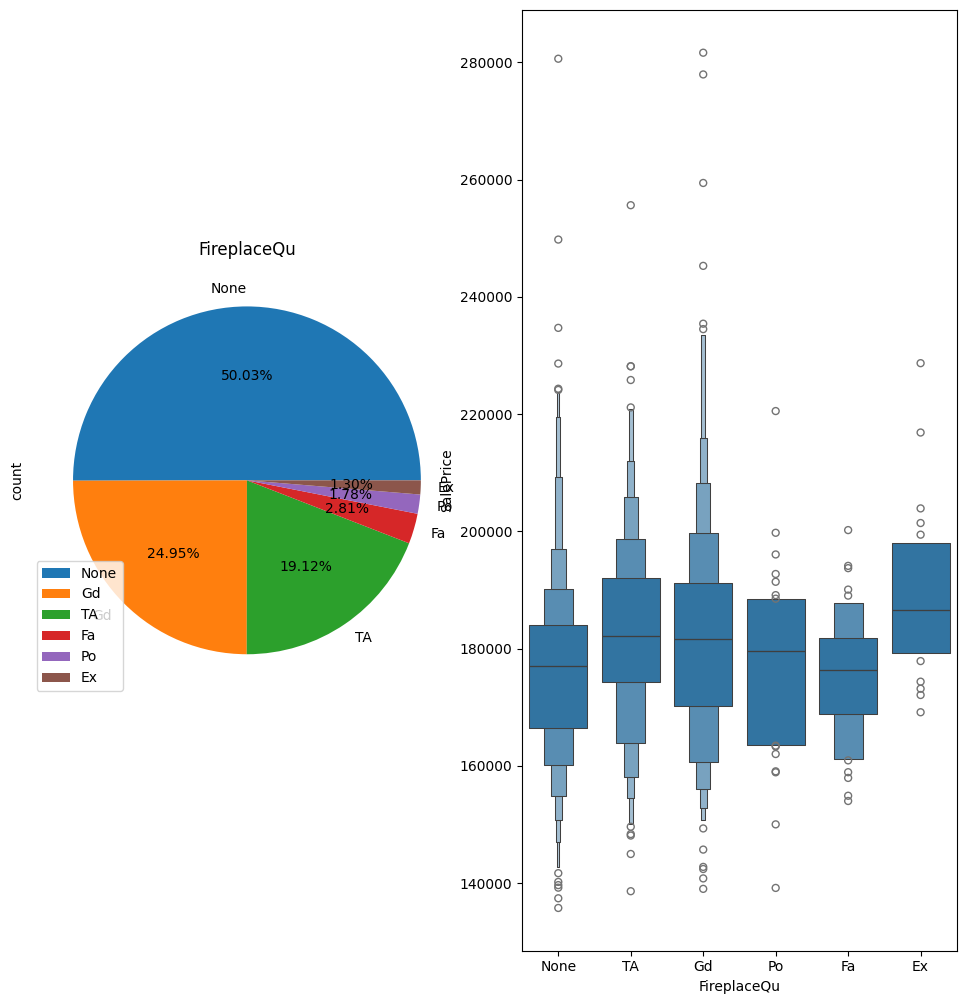

In [31]:
#EFILRYN FireplaceQu does not count into price
plot_unique_category(test_data_csv,'FireplaceQu','SalePrice');


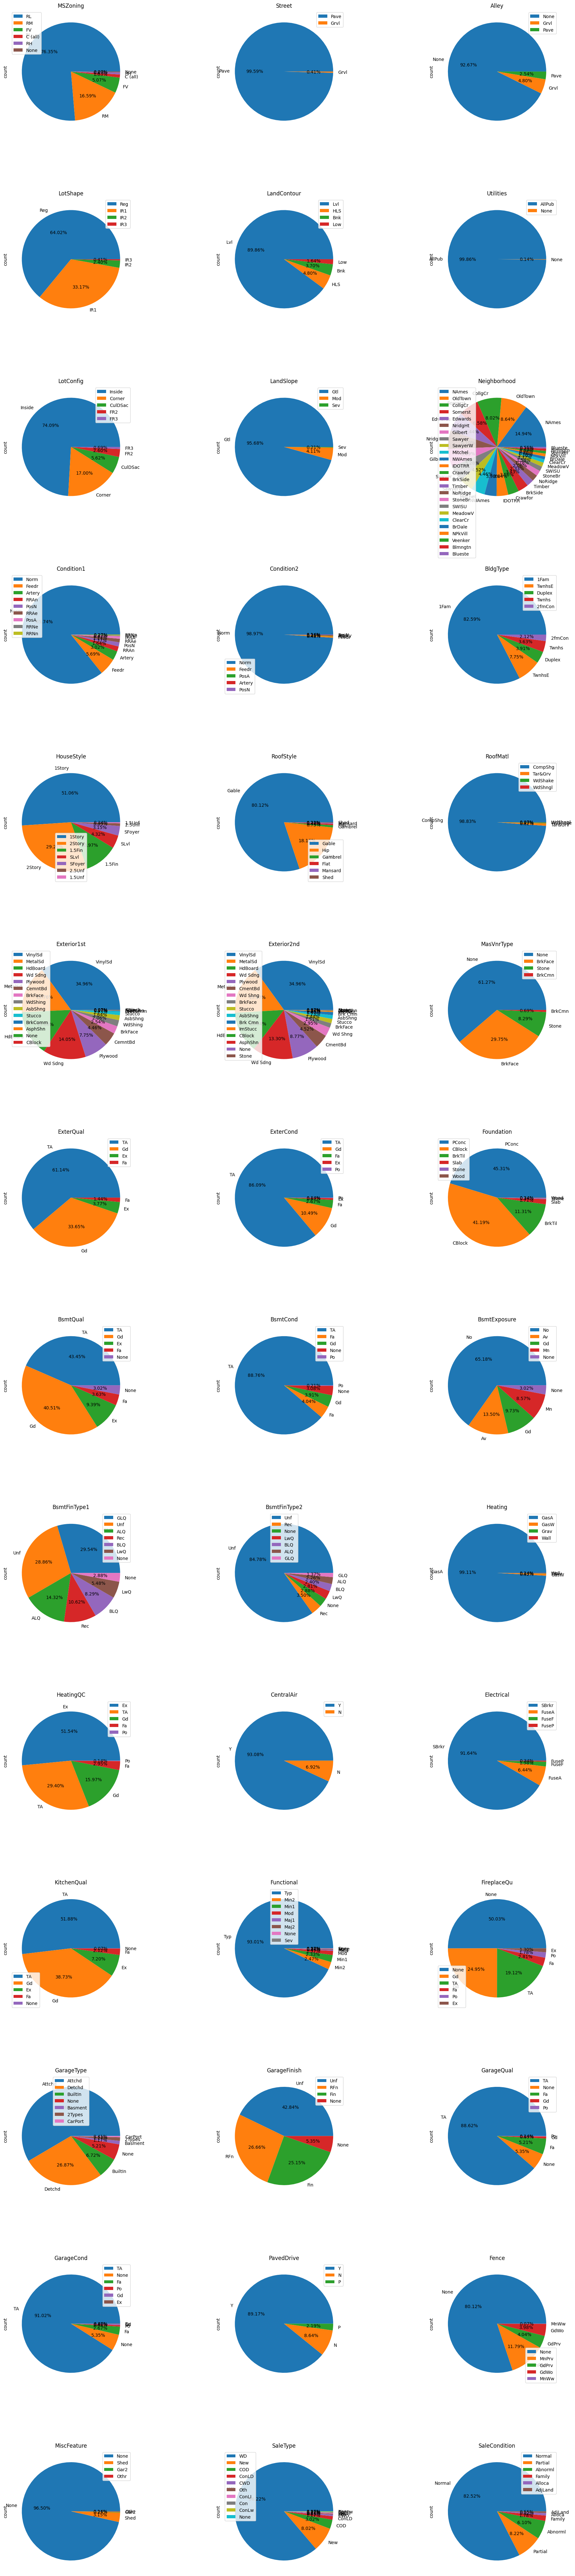

In [32]:
number_cols = get_data_type(test_data_csv,PDataType.CATHEGORICAL)
plot_pie_for_unique_category_array(test_data_csv, number_cols.columns.to_numpy())

In [33]:
train_data_csv = pd.read_csv("train.csv")
print(train_data_csv.describe())
print(train_data_csv.shape)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

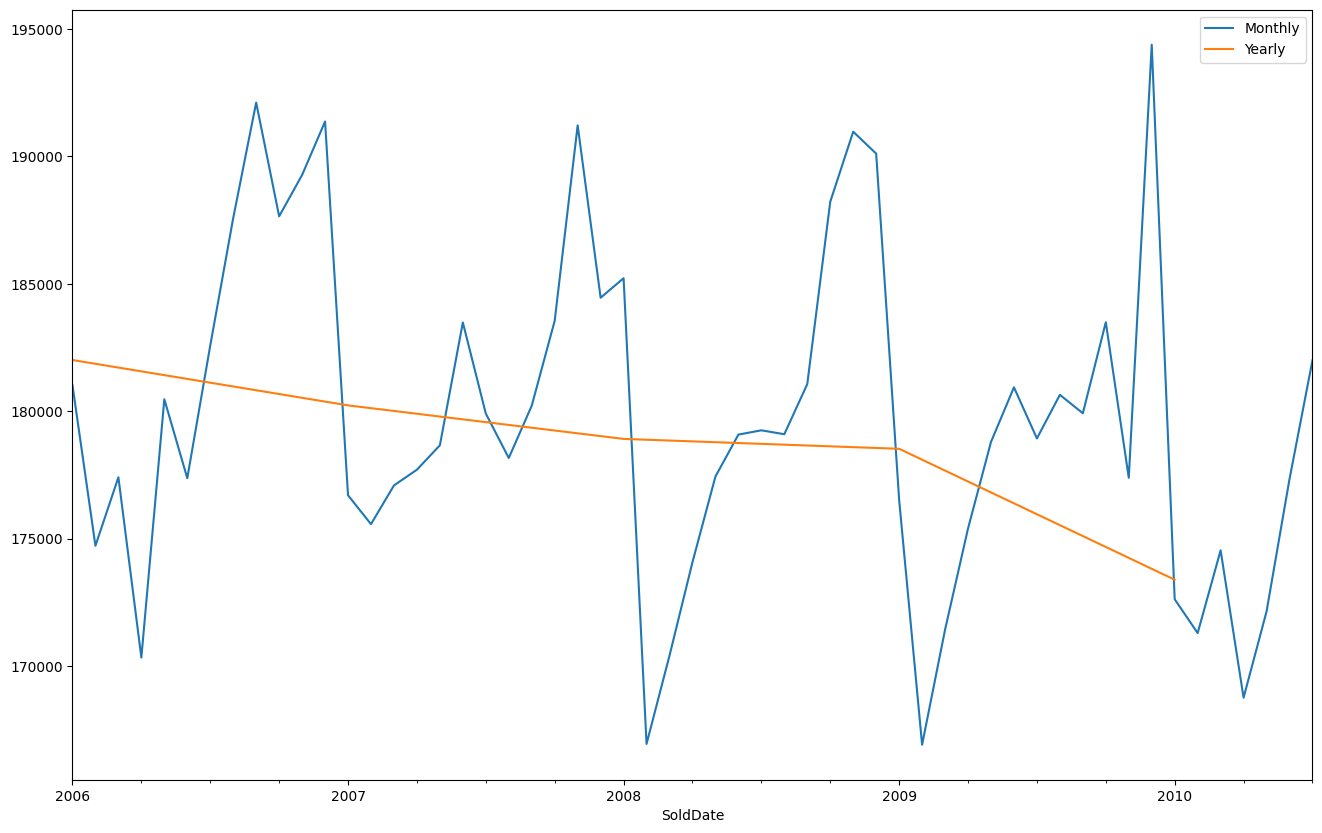

In [34]:
if not DO_NOT_PLOT:
    test_data_csv.set_index('SoldDate').resample('ME')['SalePrice'].mean().plot.line(legend = True, figsize=(16,10))
    test_data_csv.set_index('SoldDate').resample('YE')['SalePrice'].mean().plot.line(legend = True, figsize=(16,10))
    plt.legend(["Monthly", "Yearly"]);

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


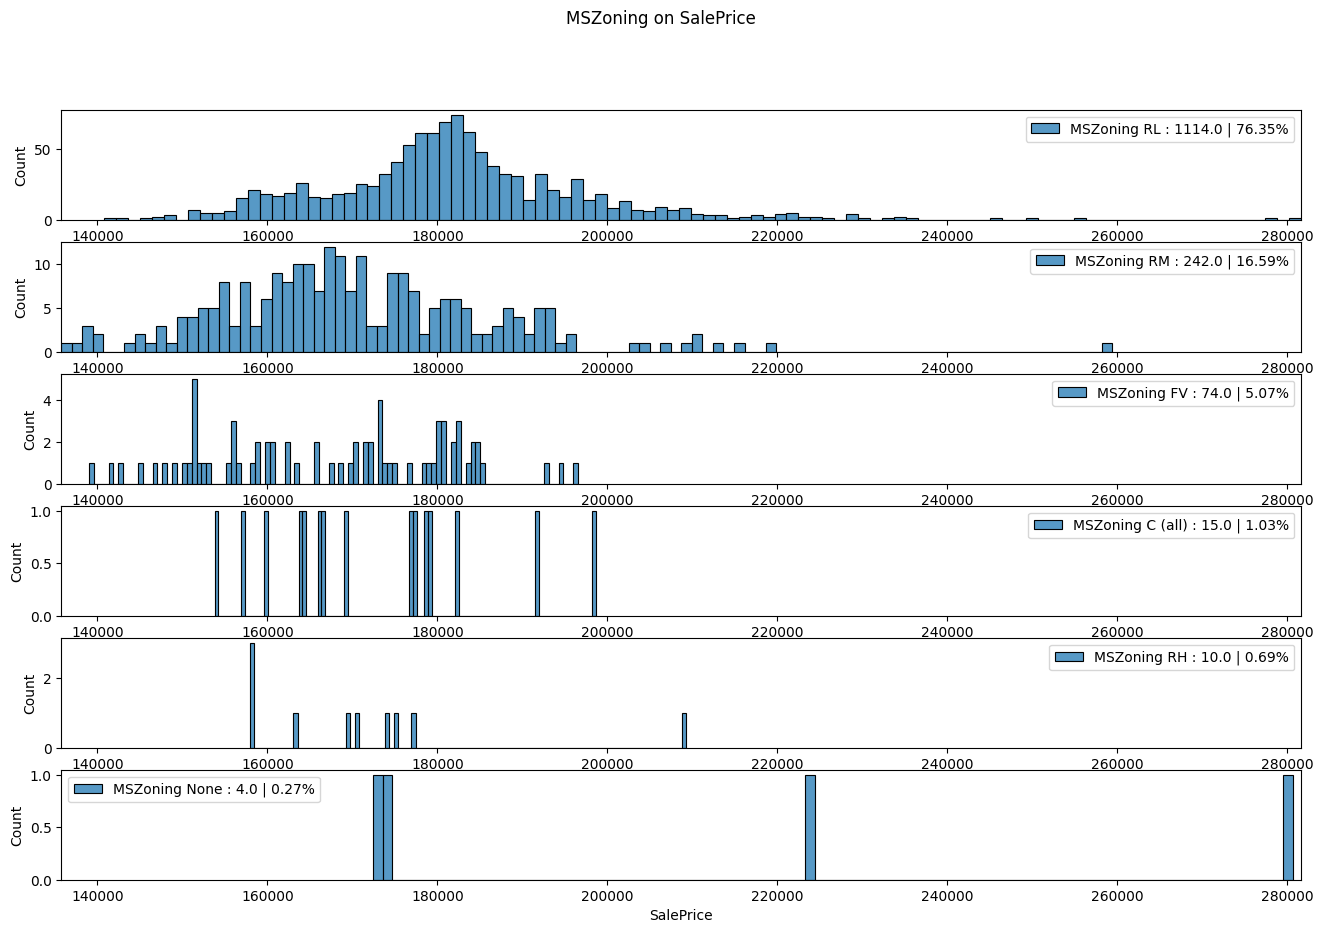

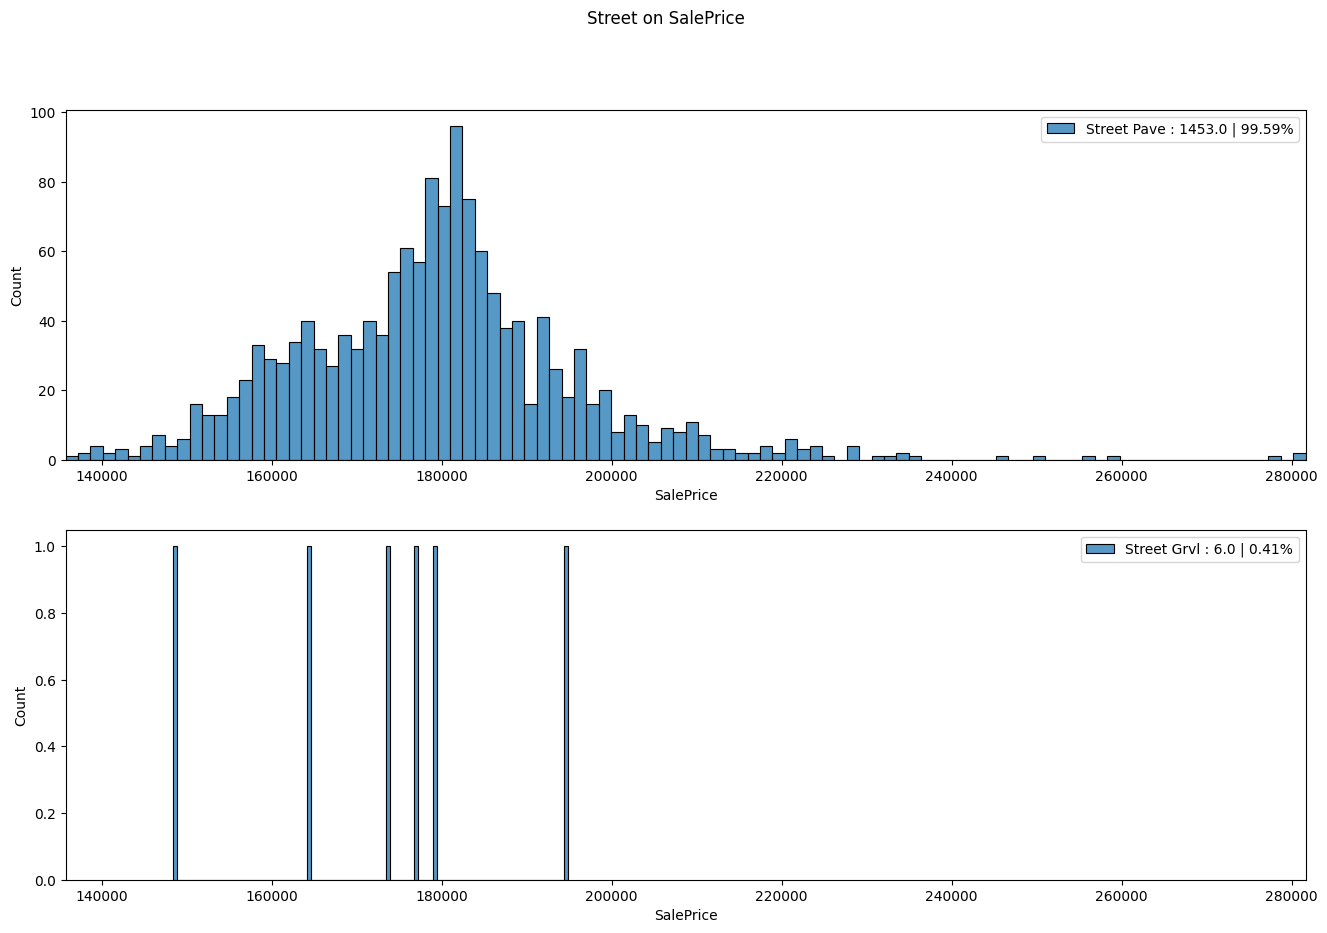

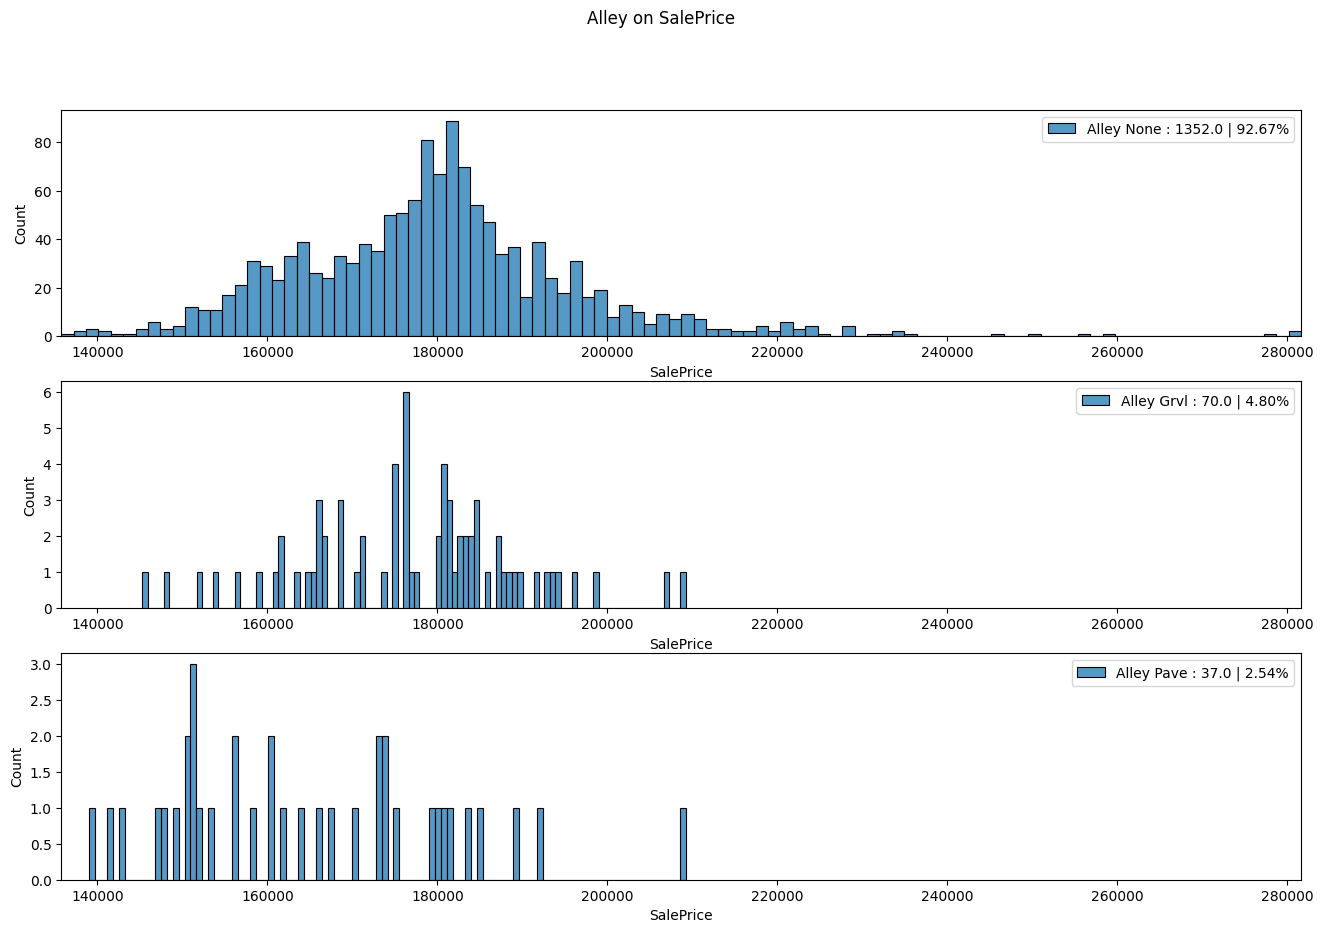

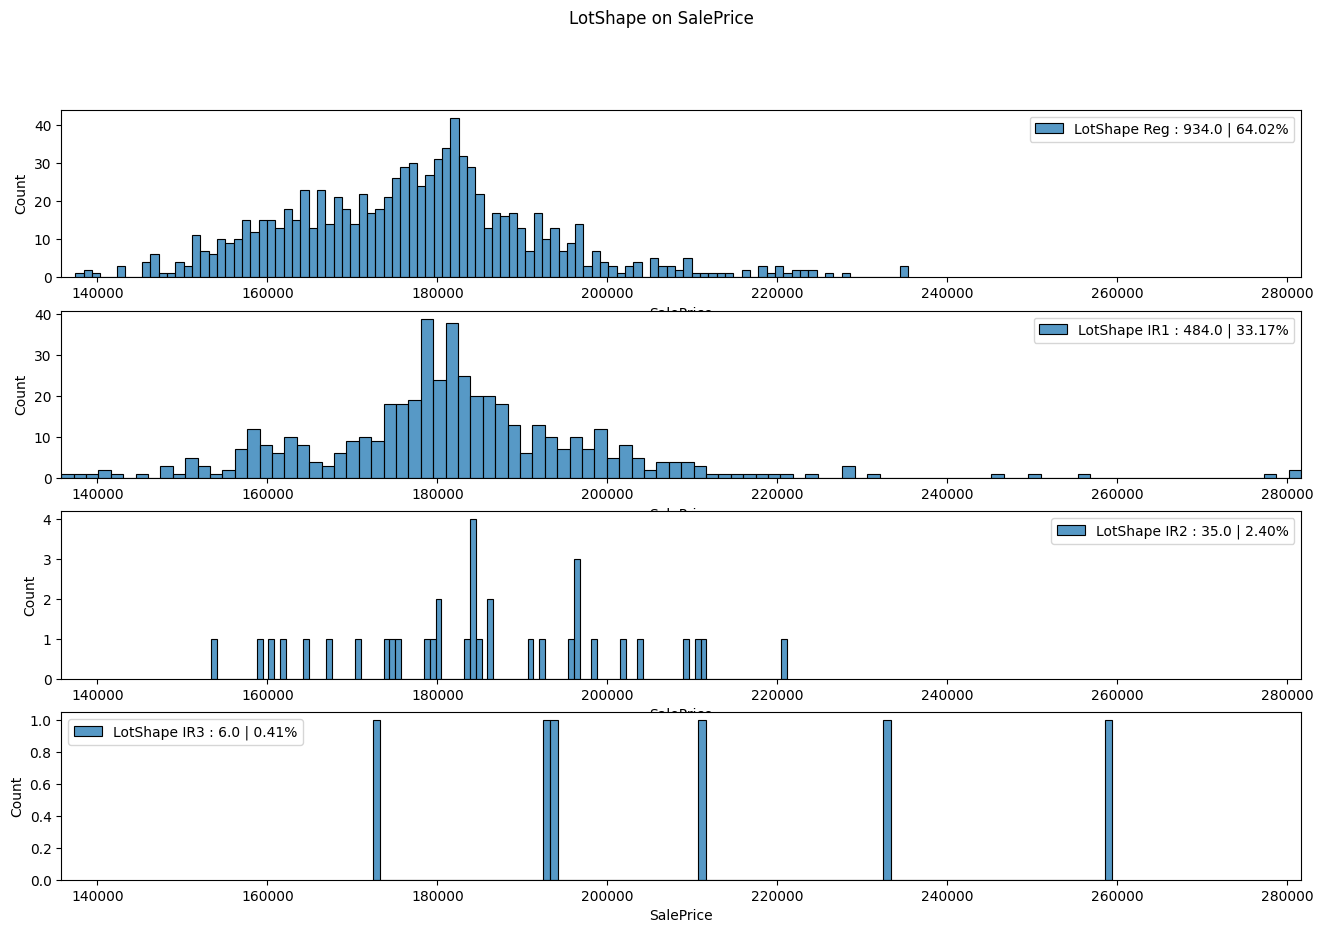

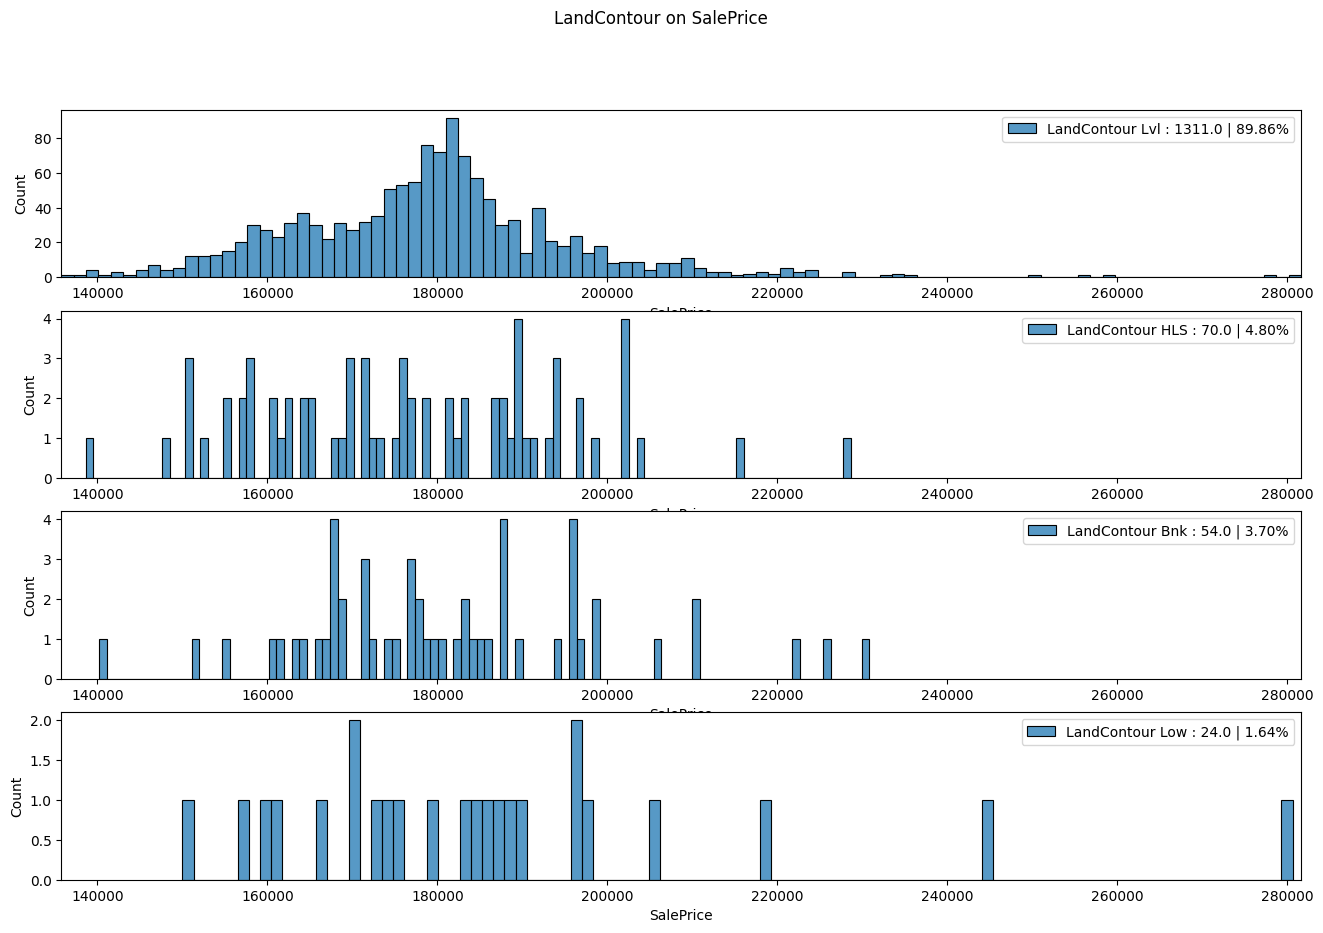

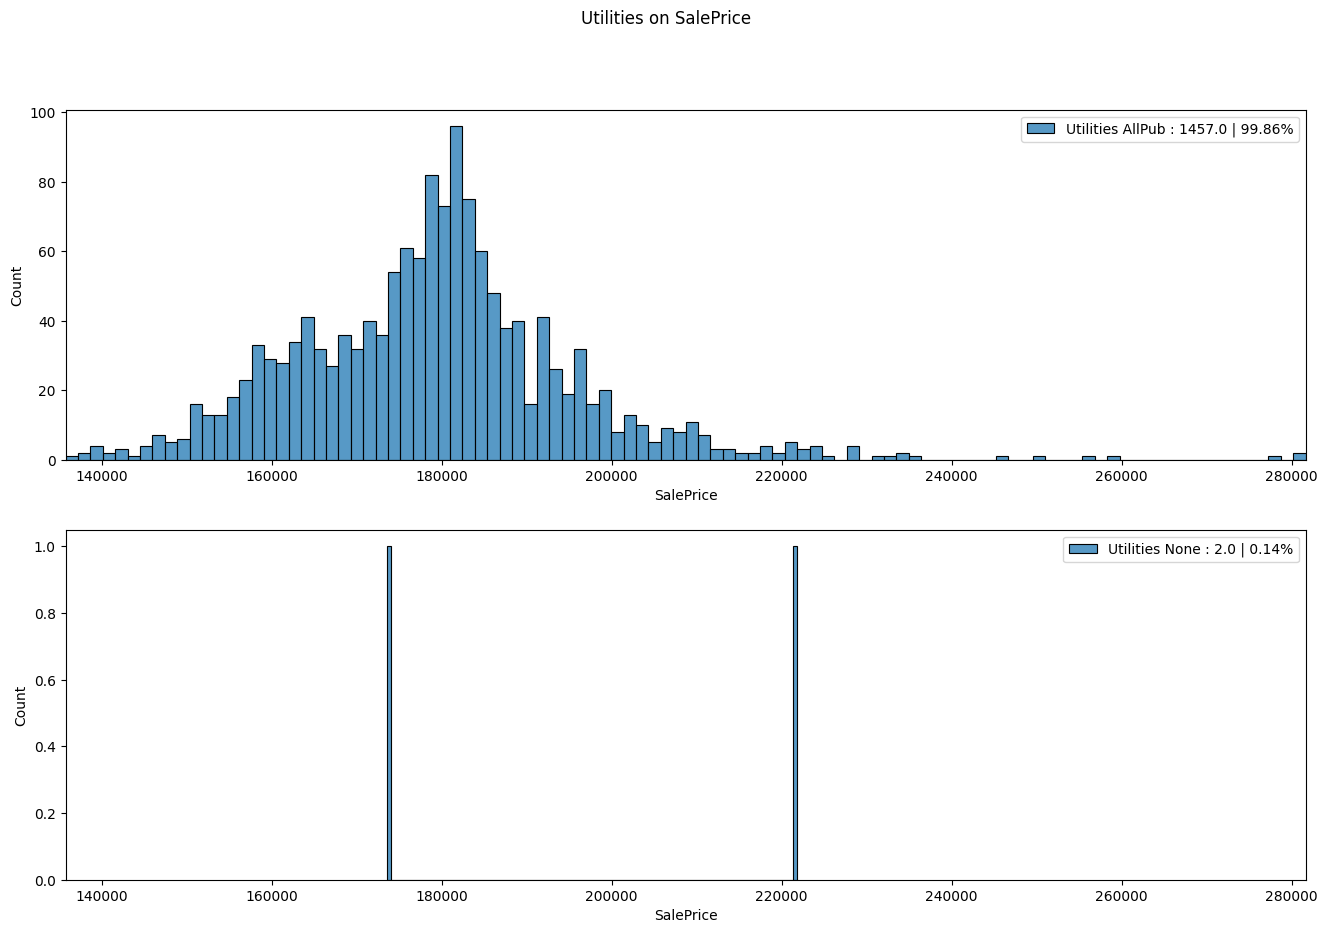

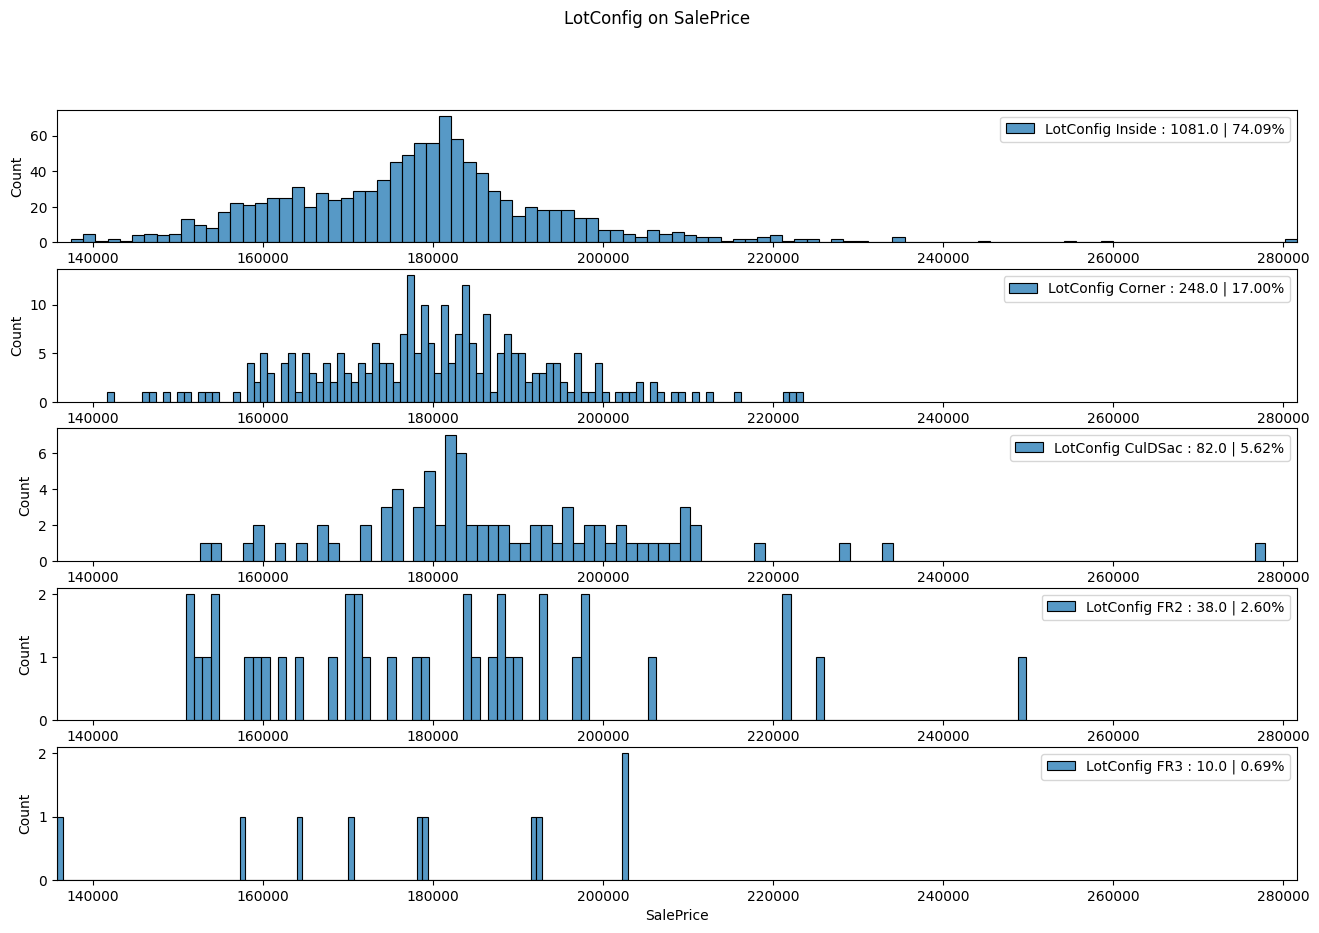

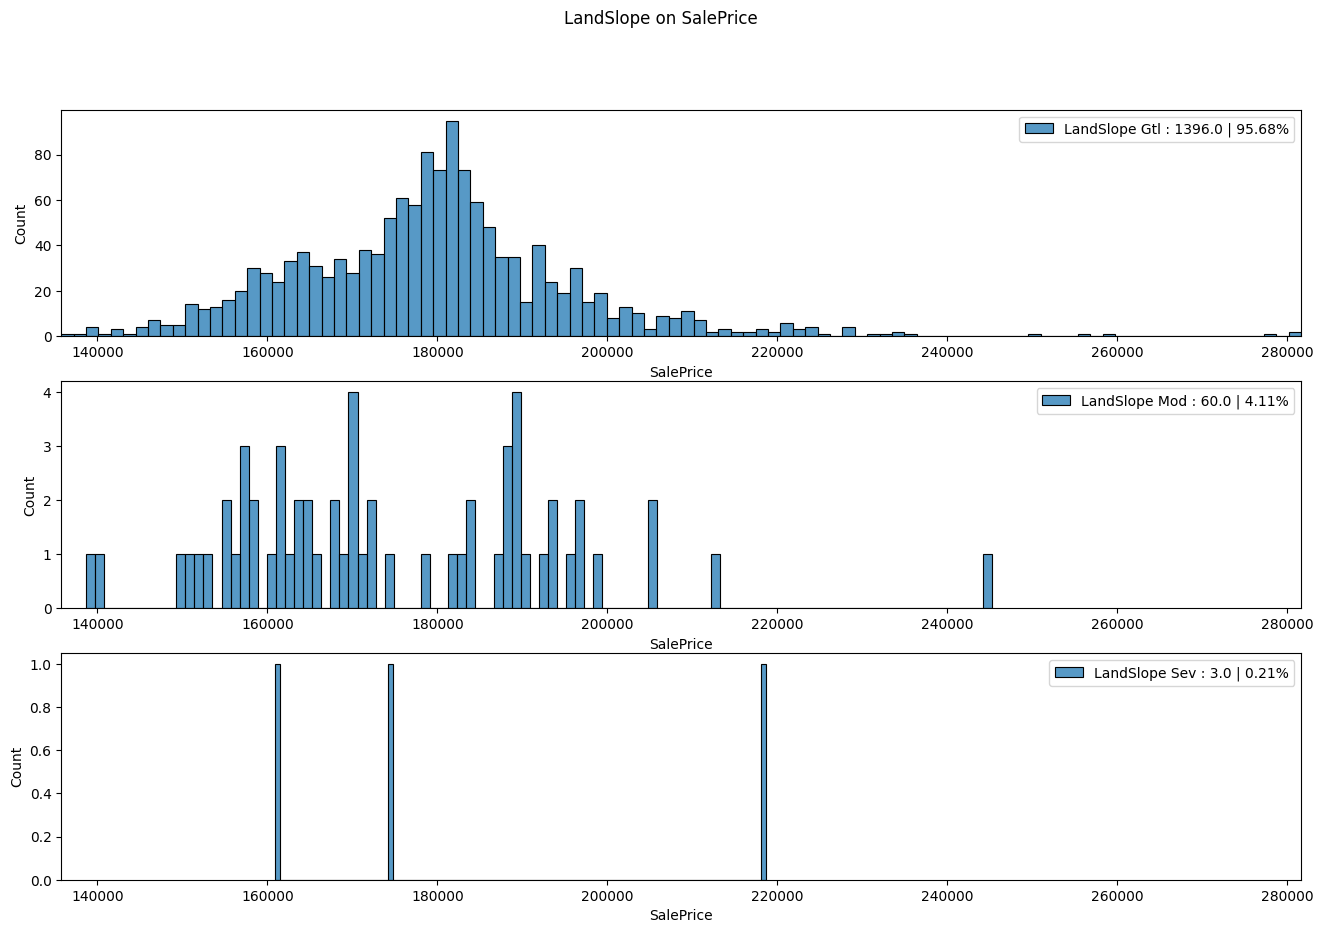

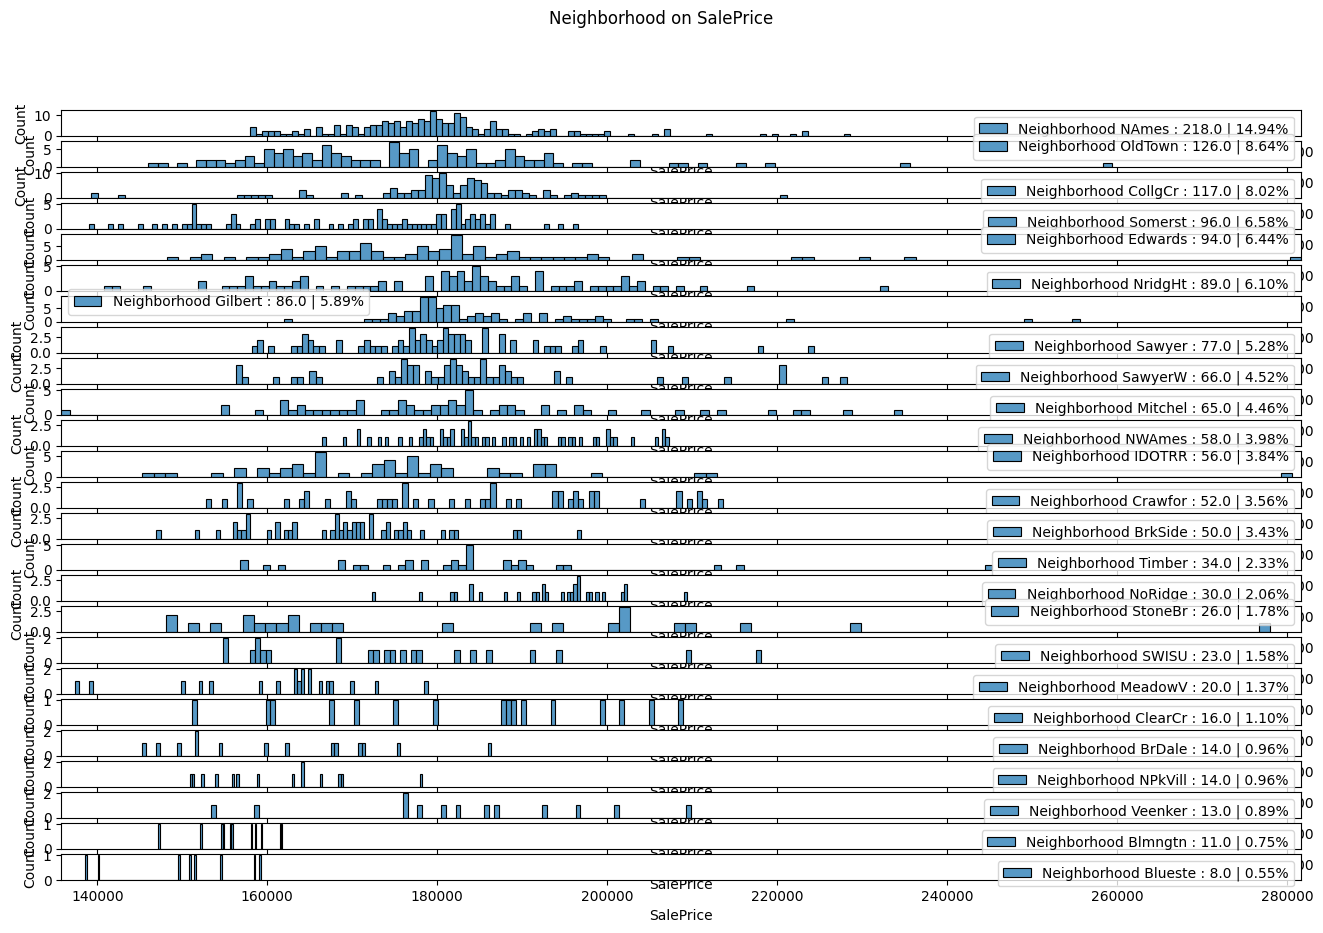

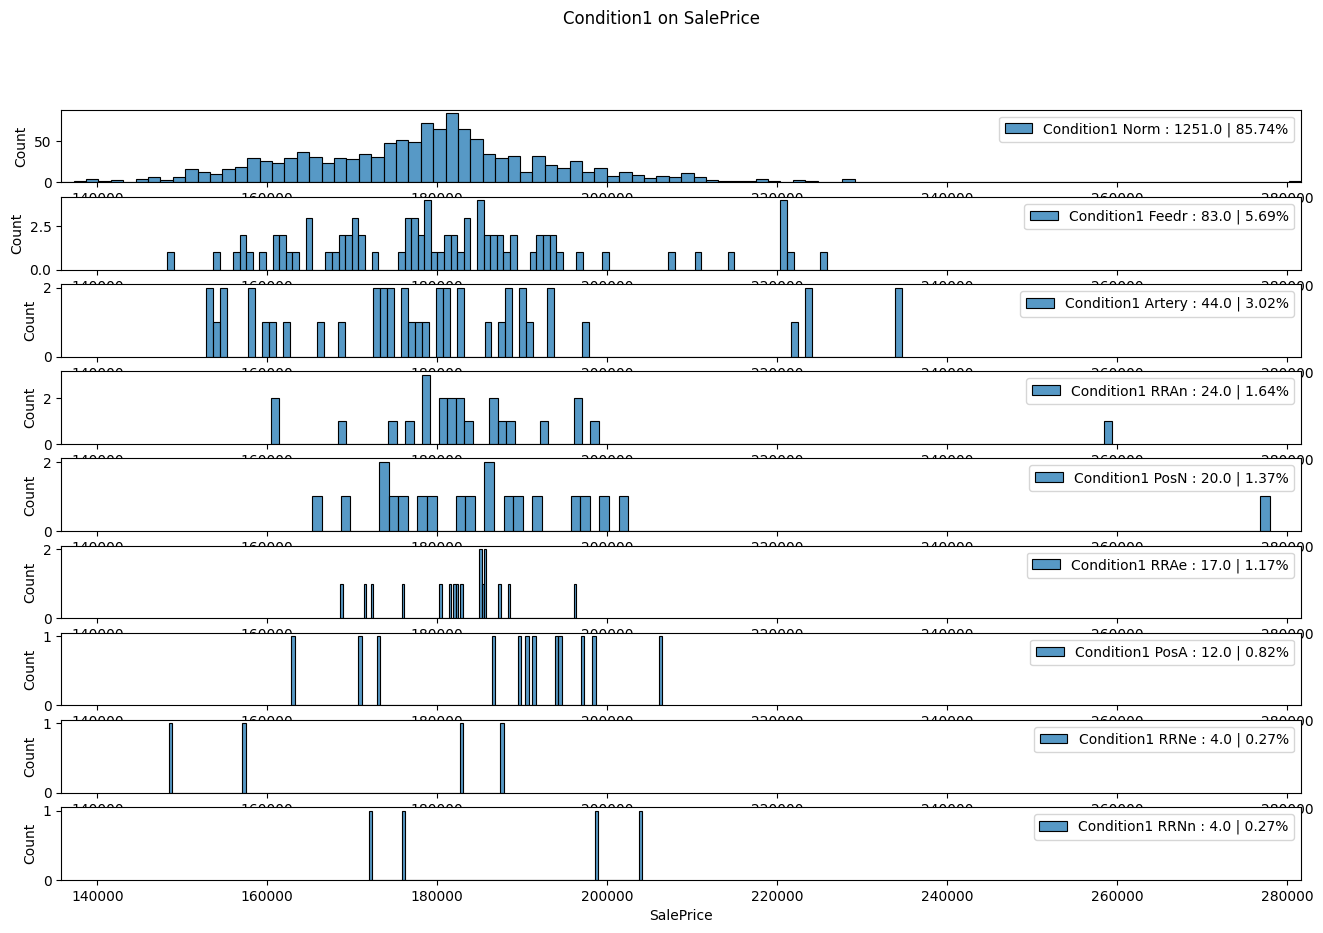

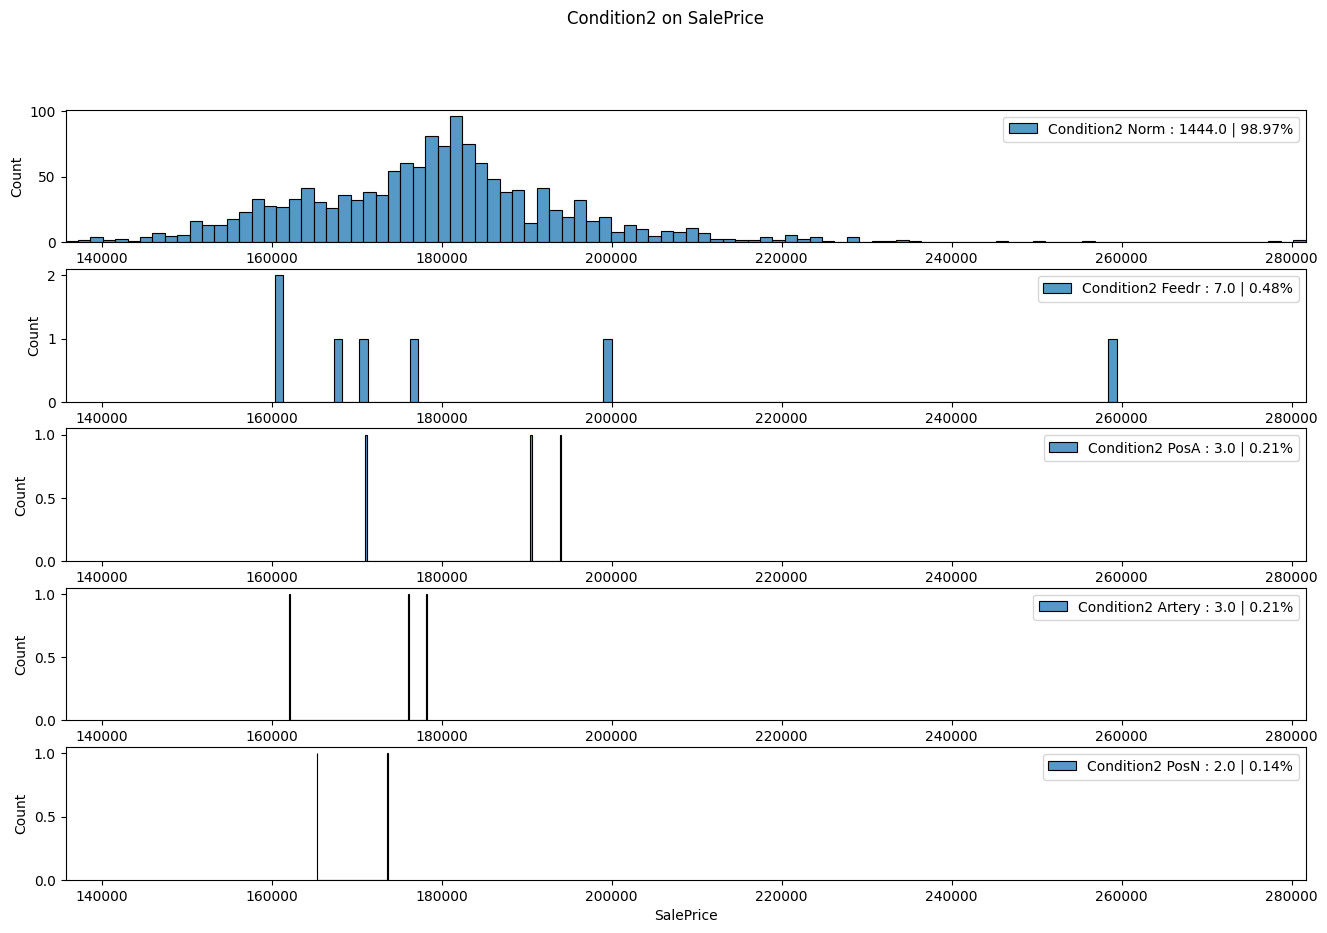

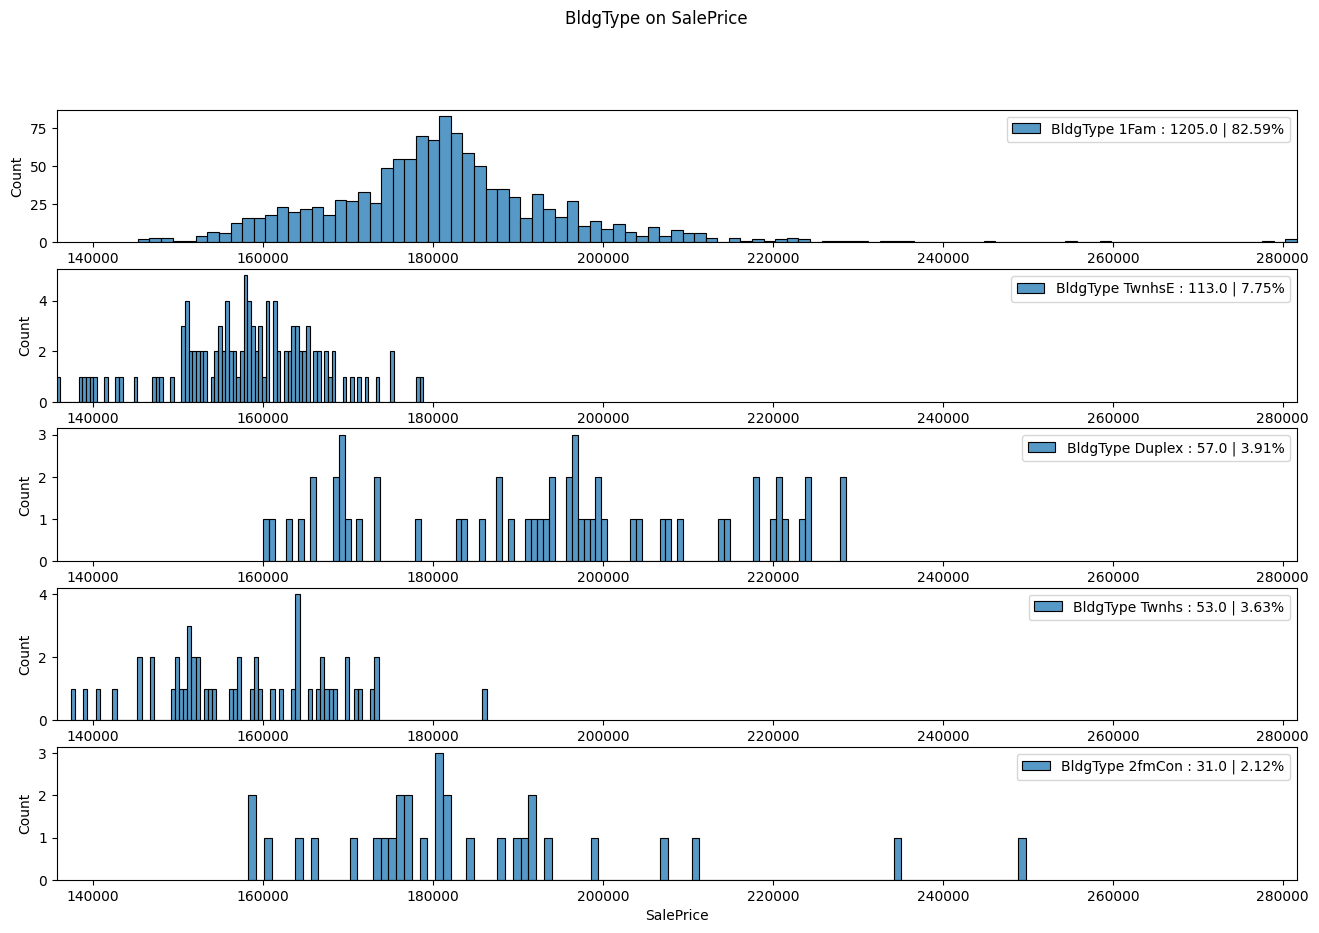

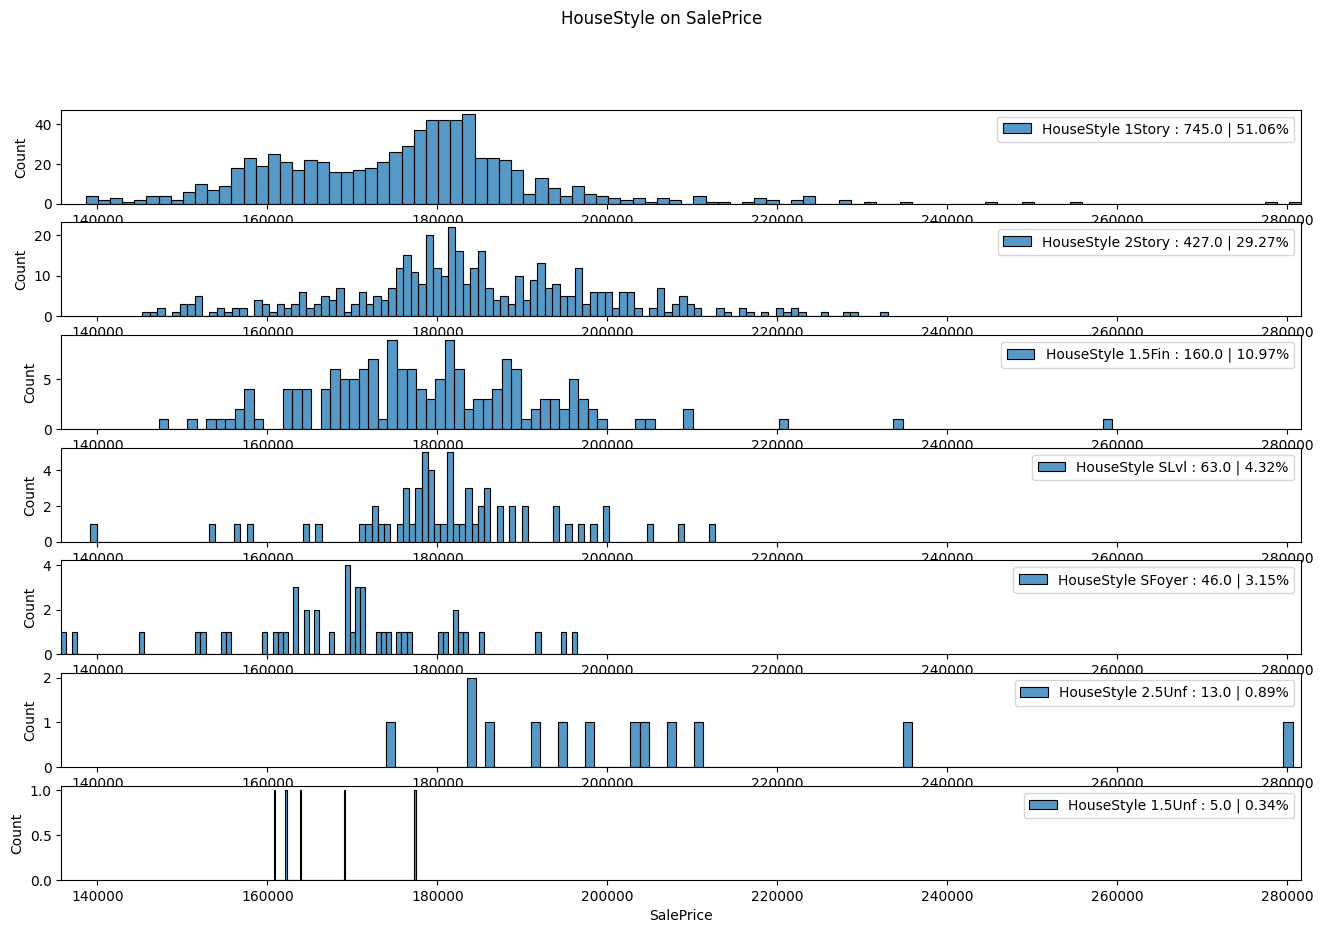

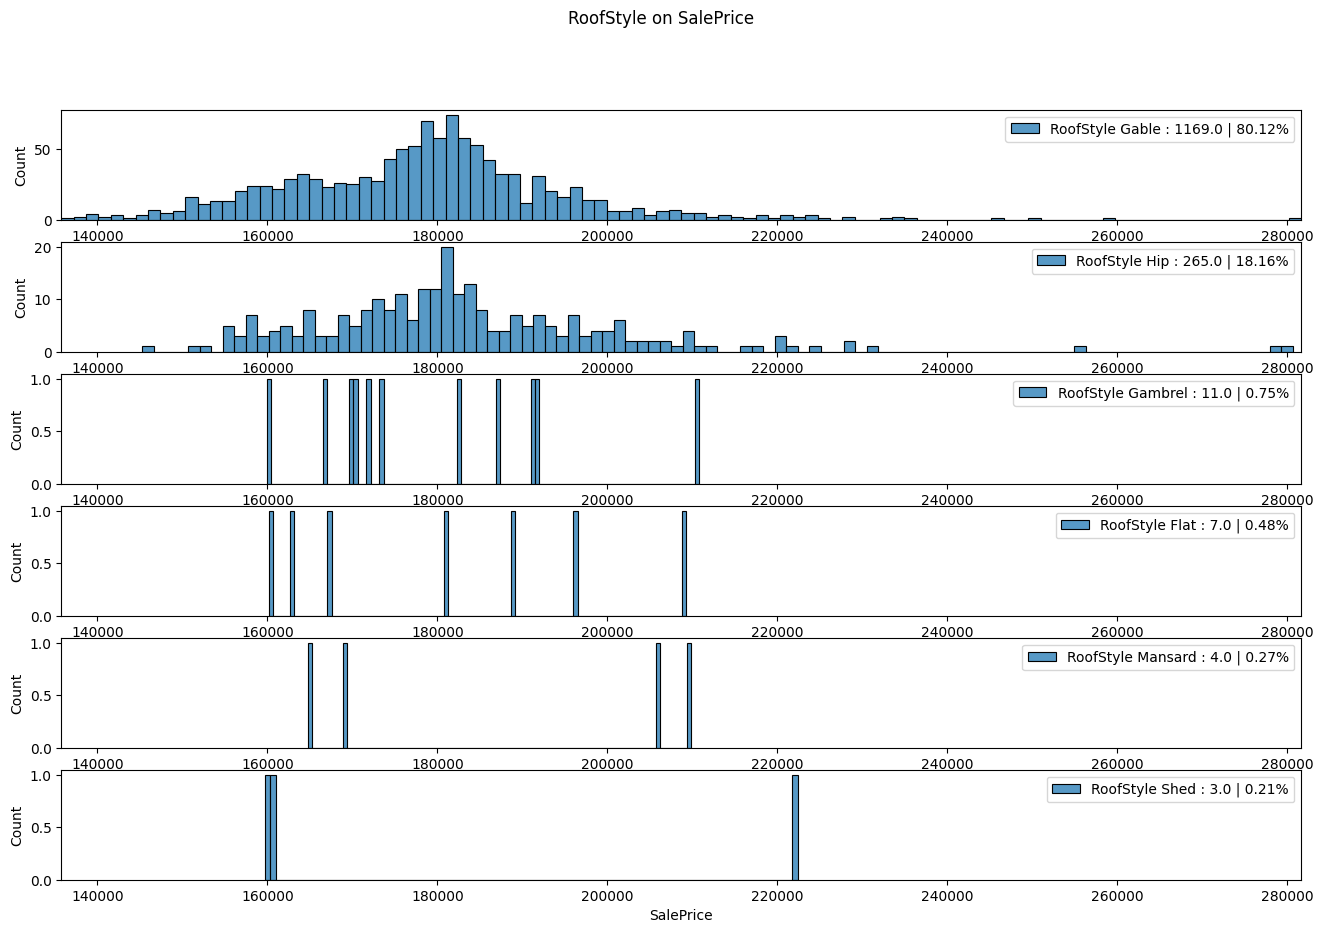

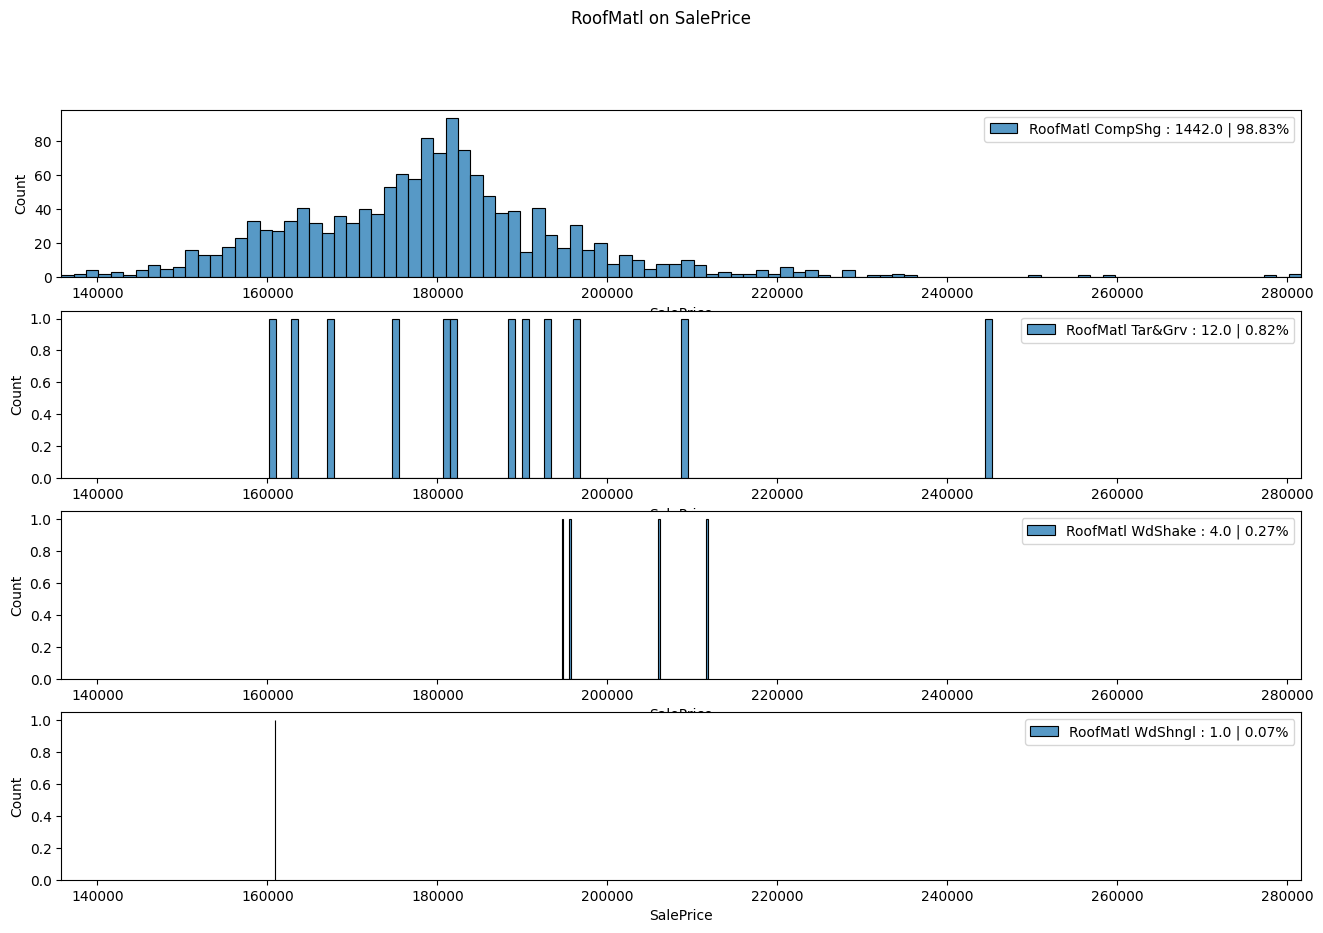

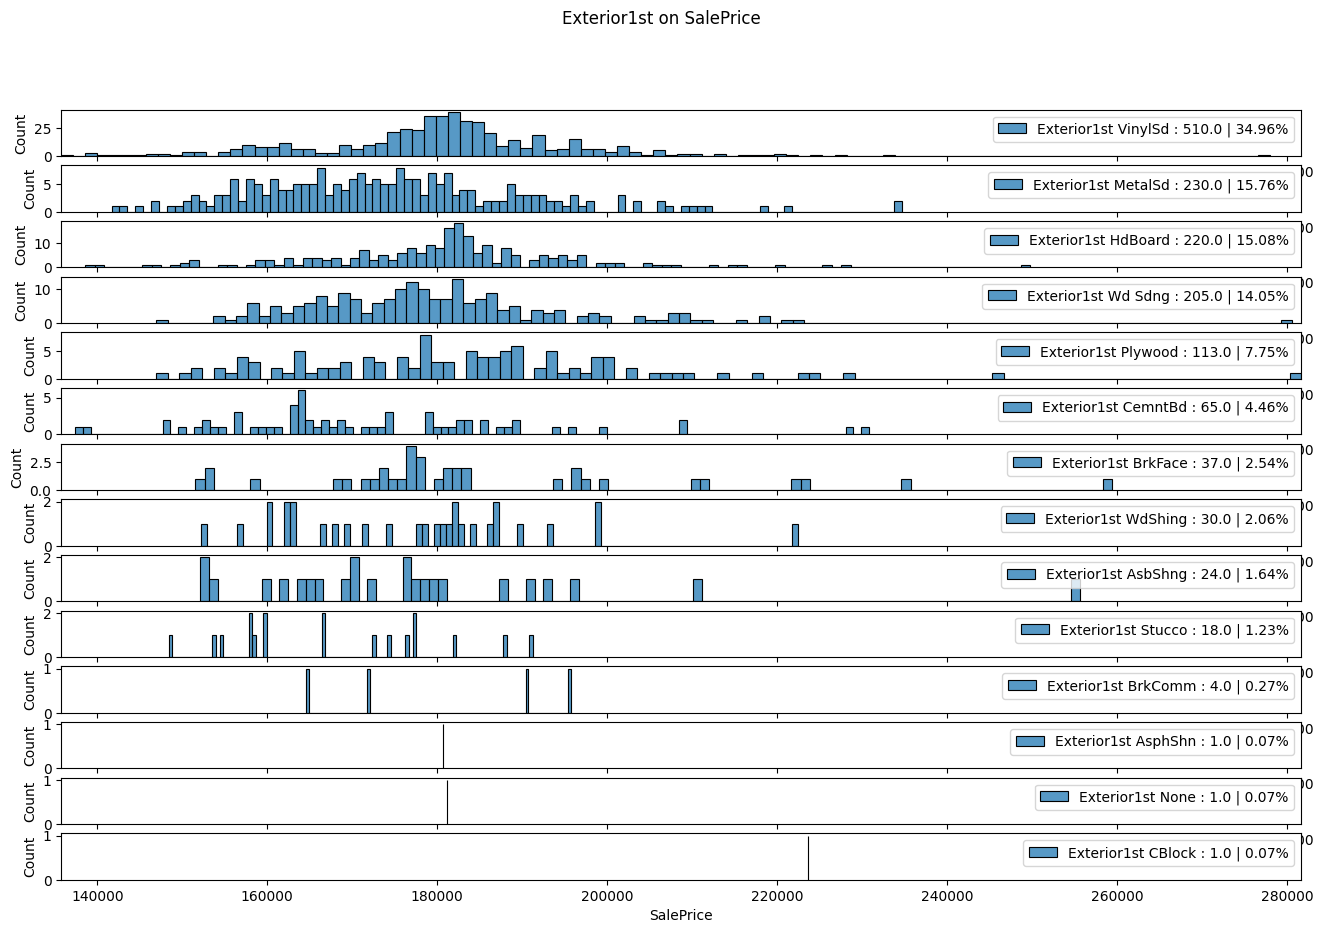

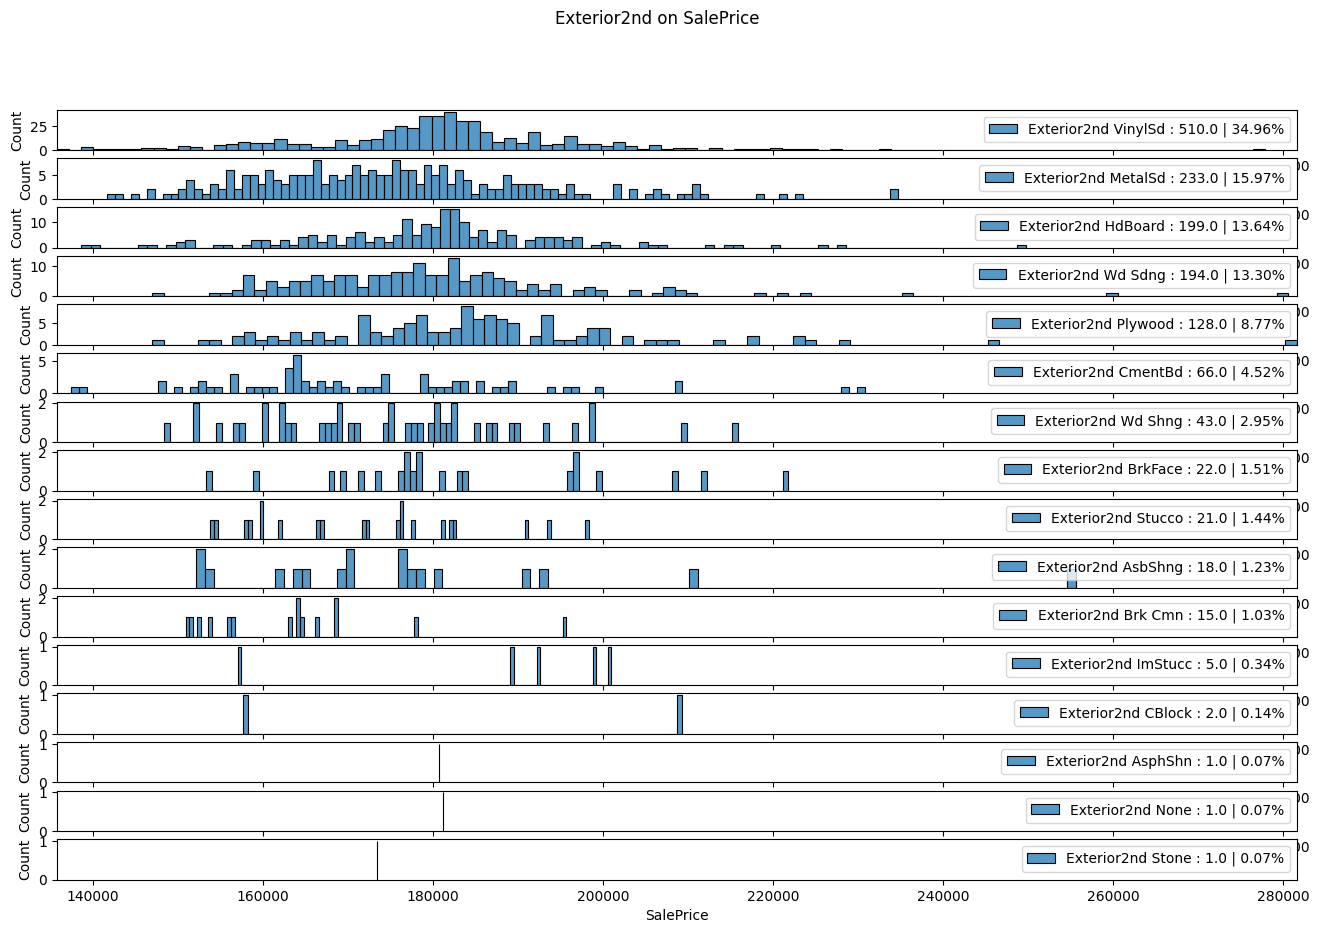

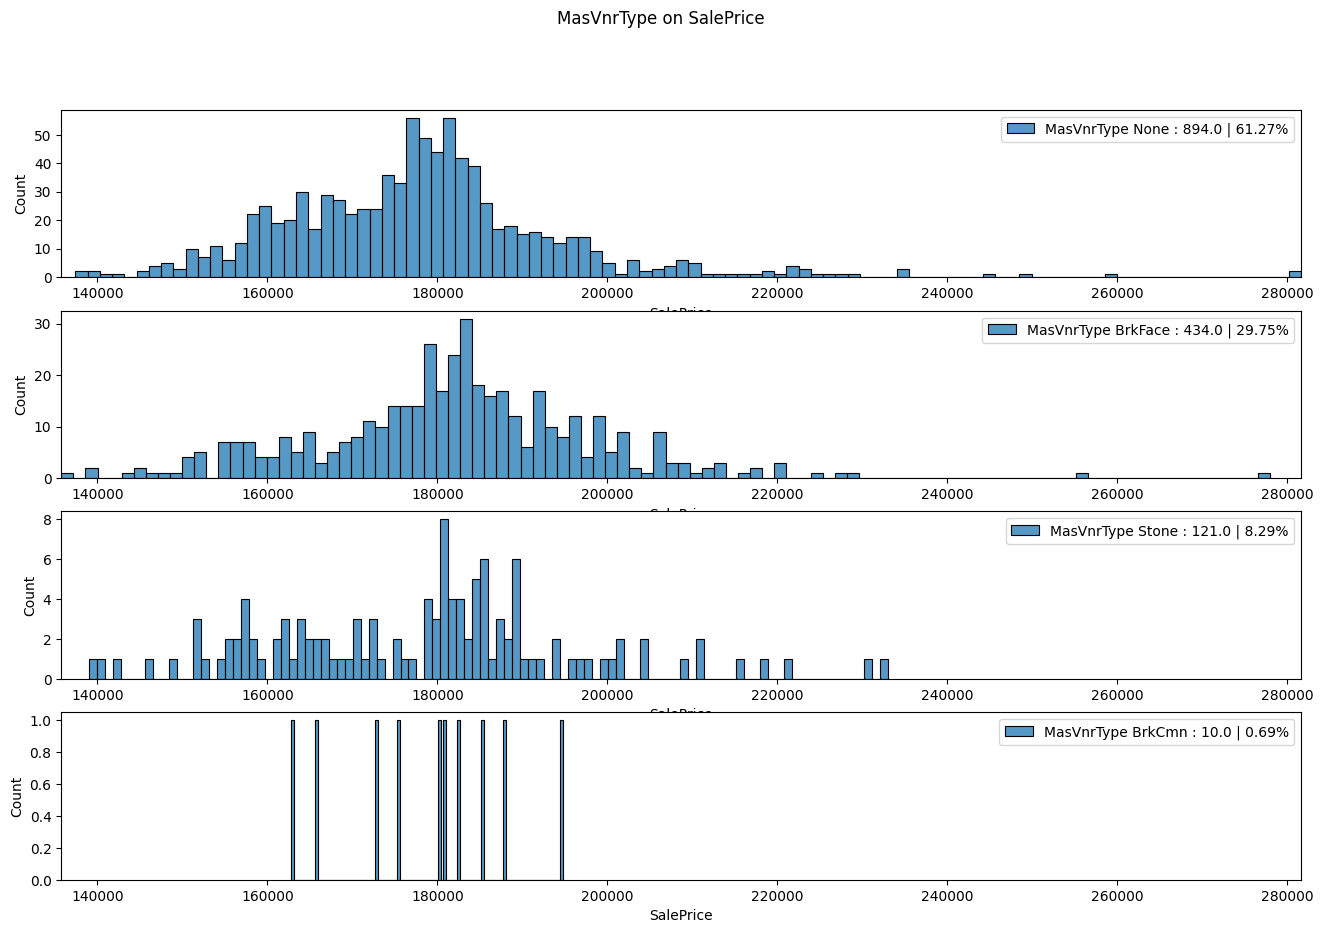

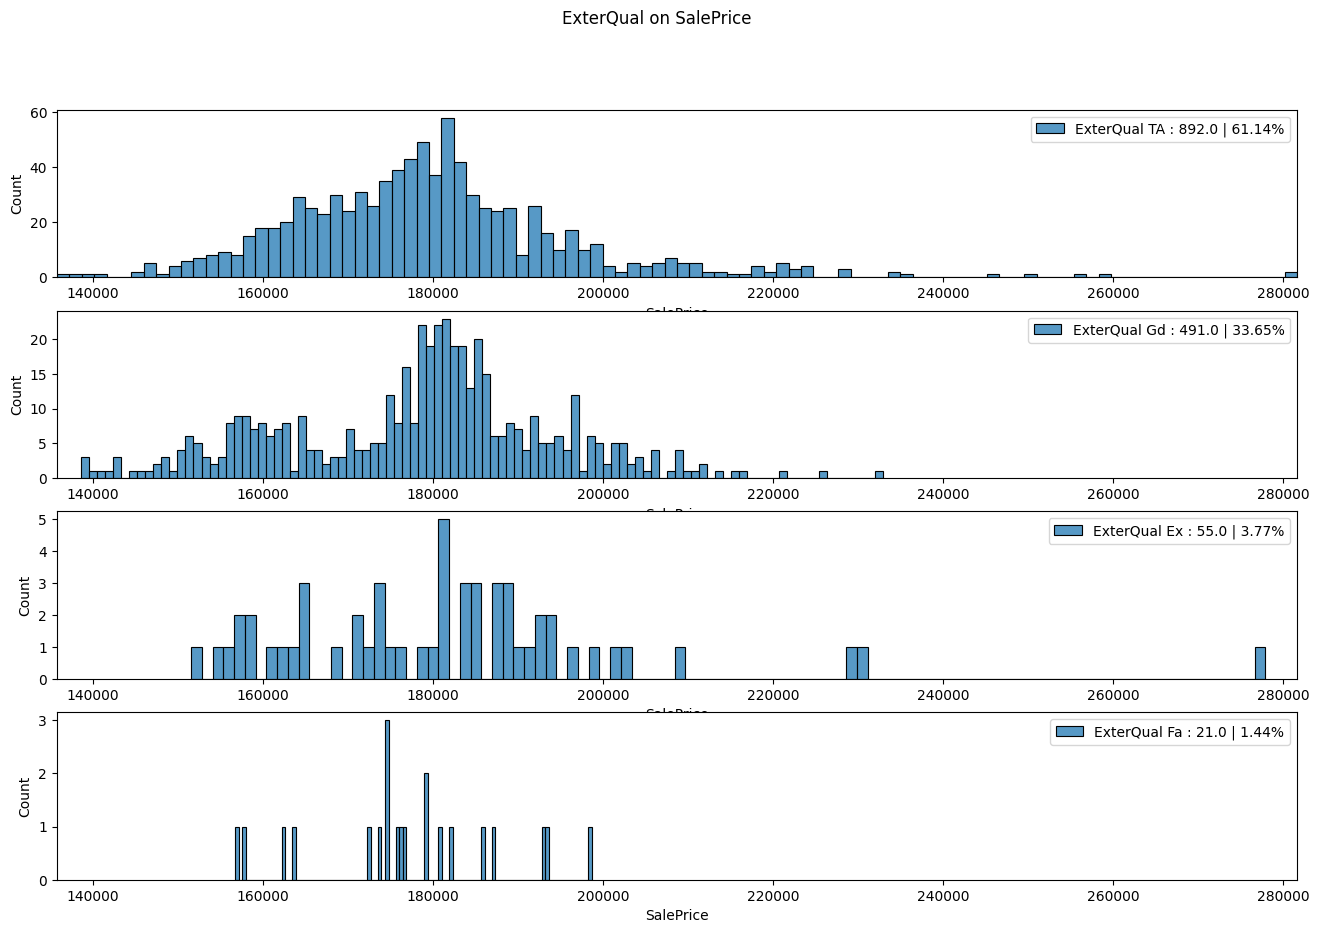

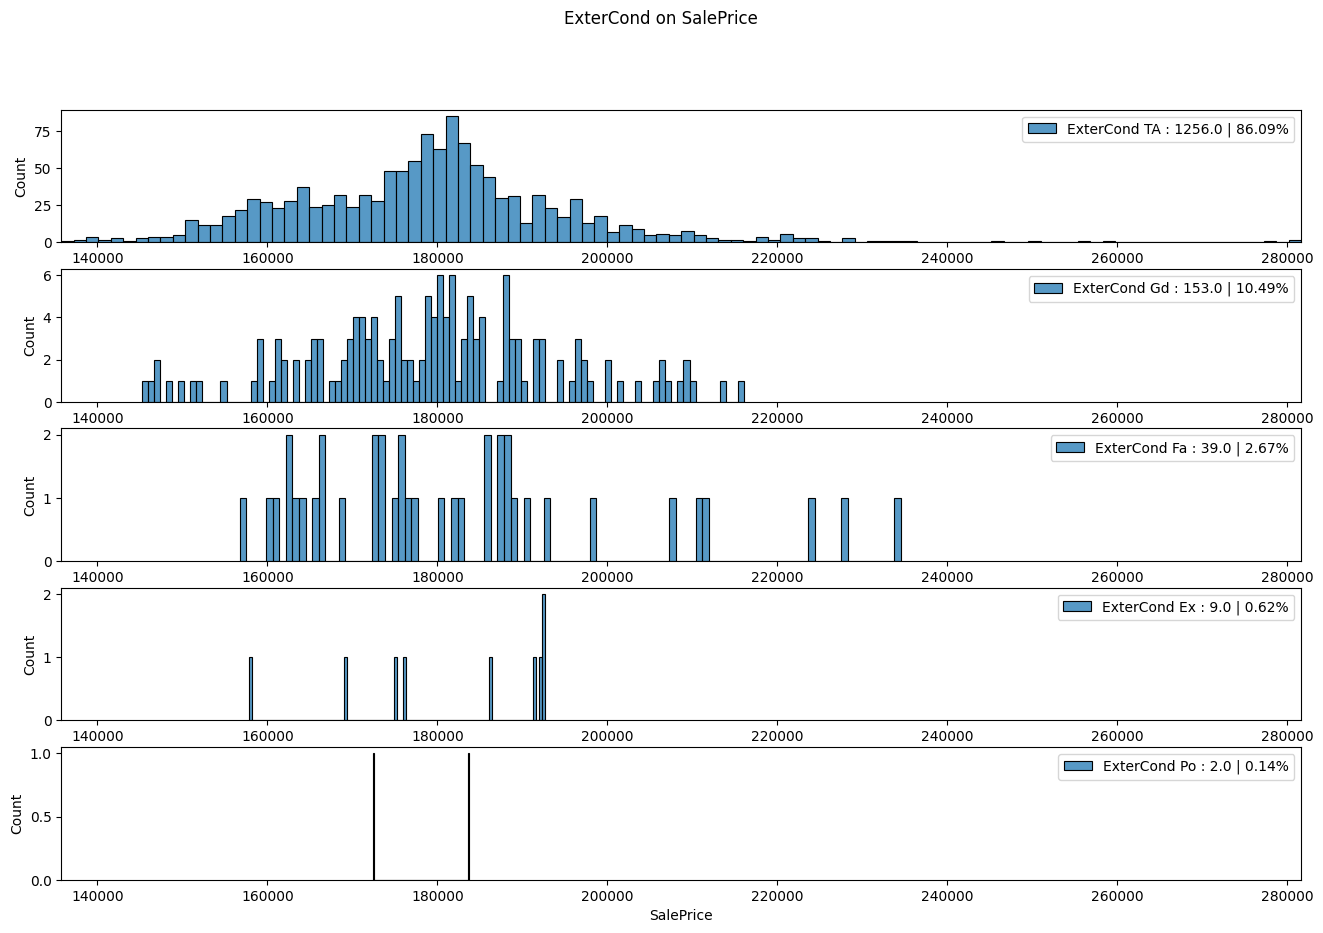

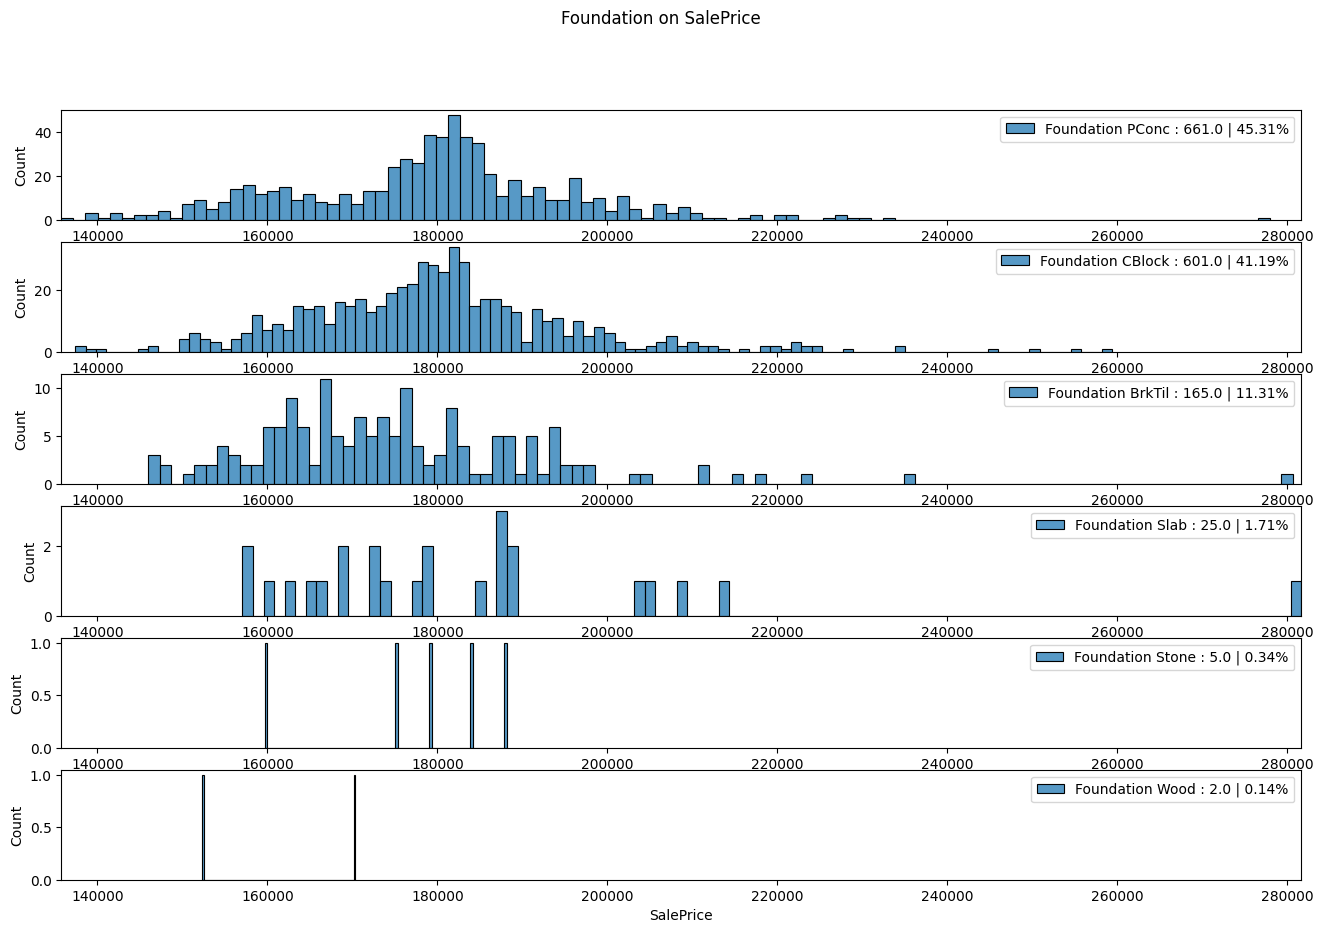

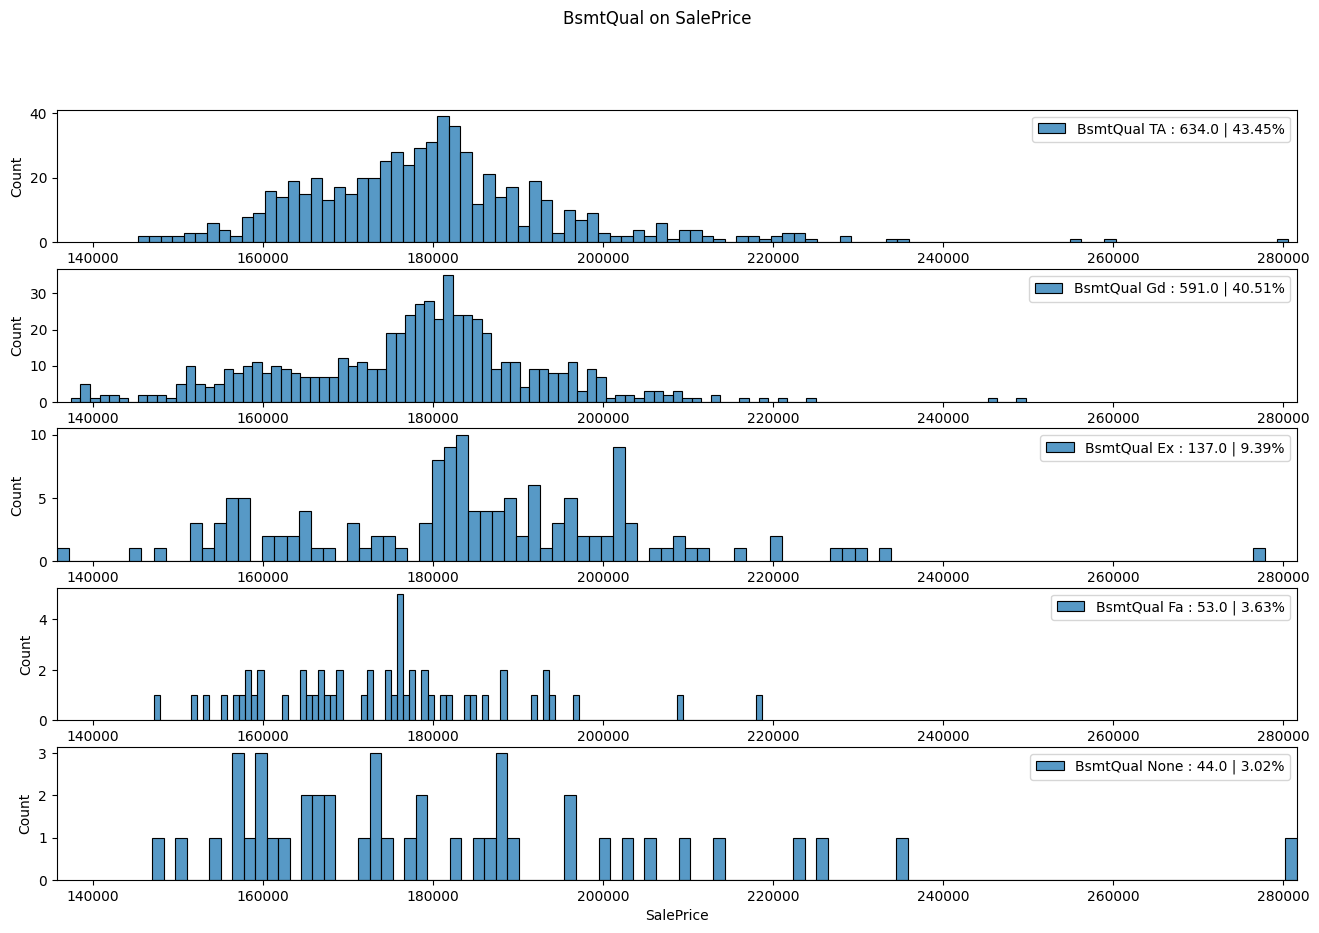

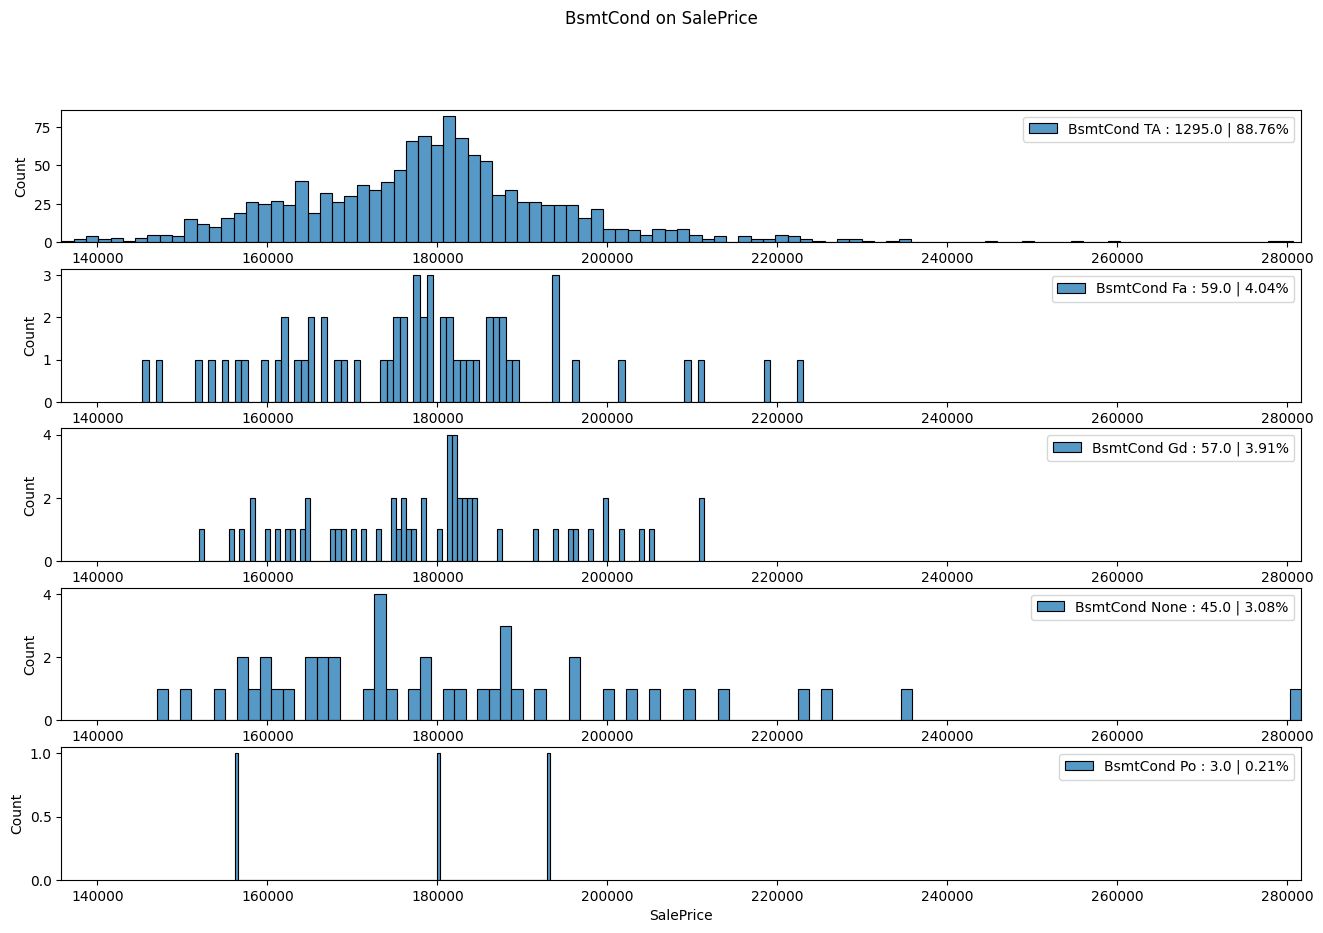

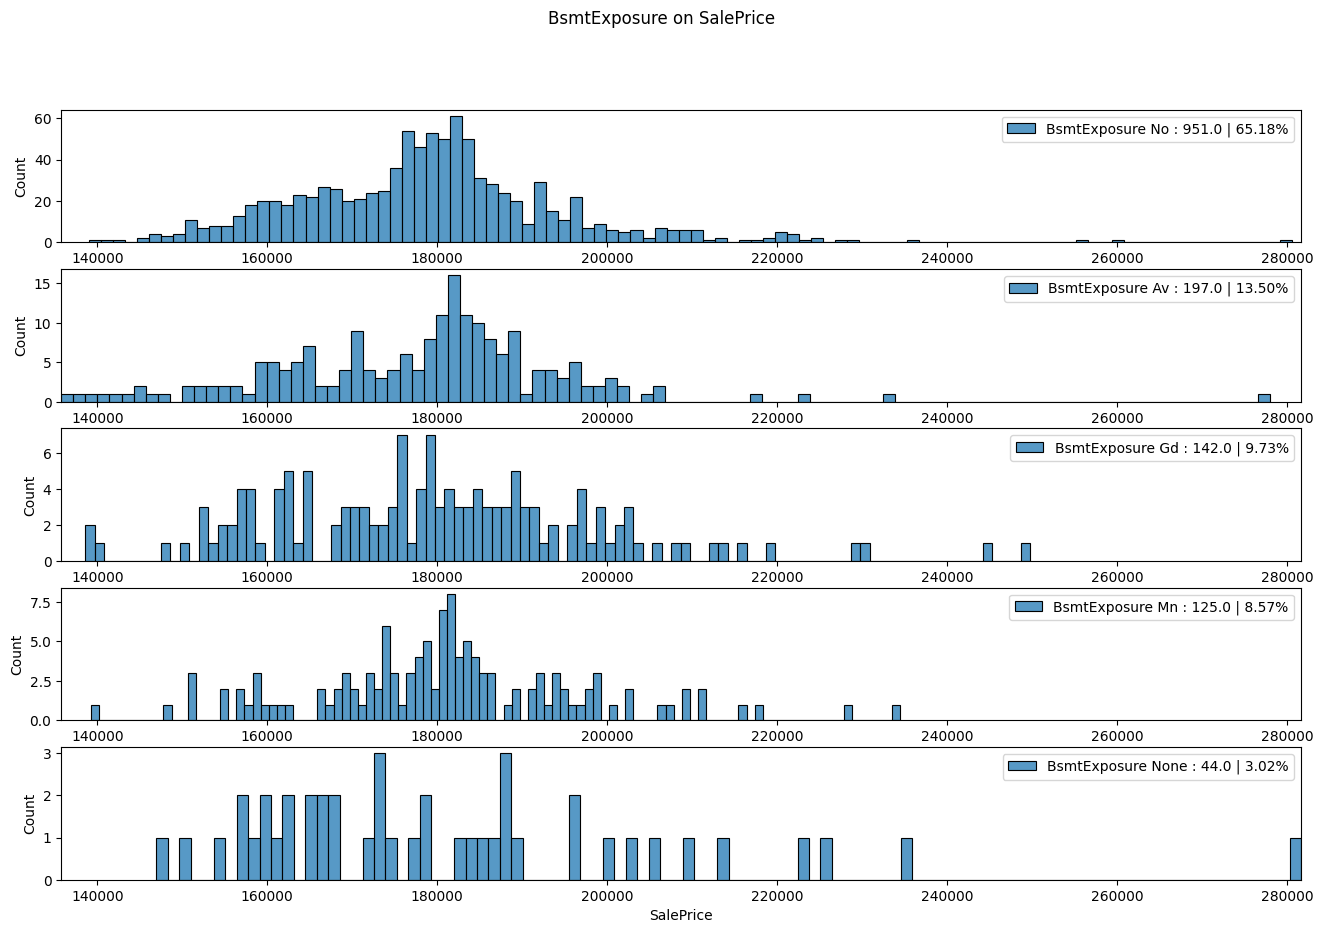

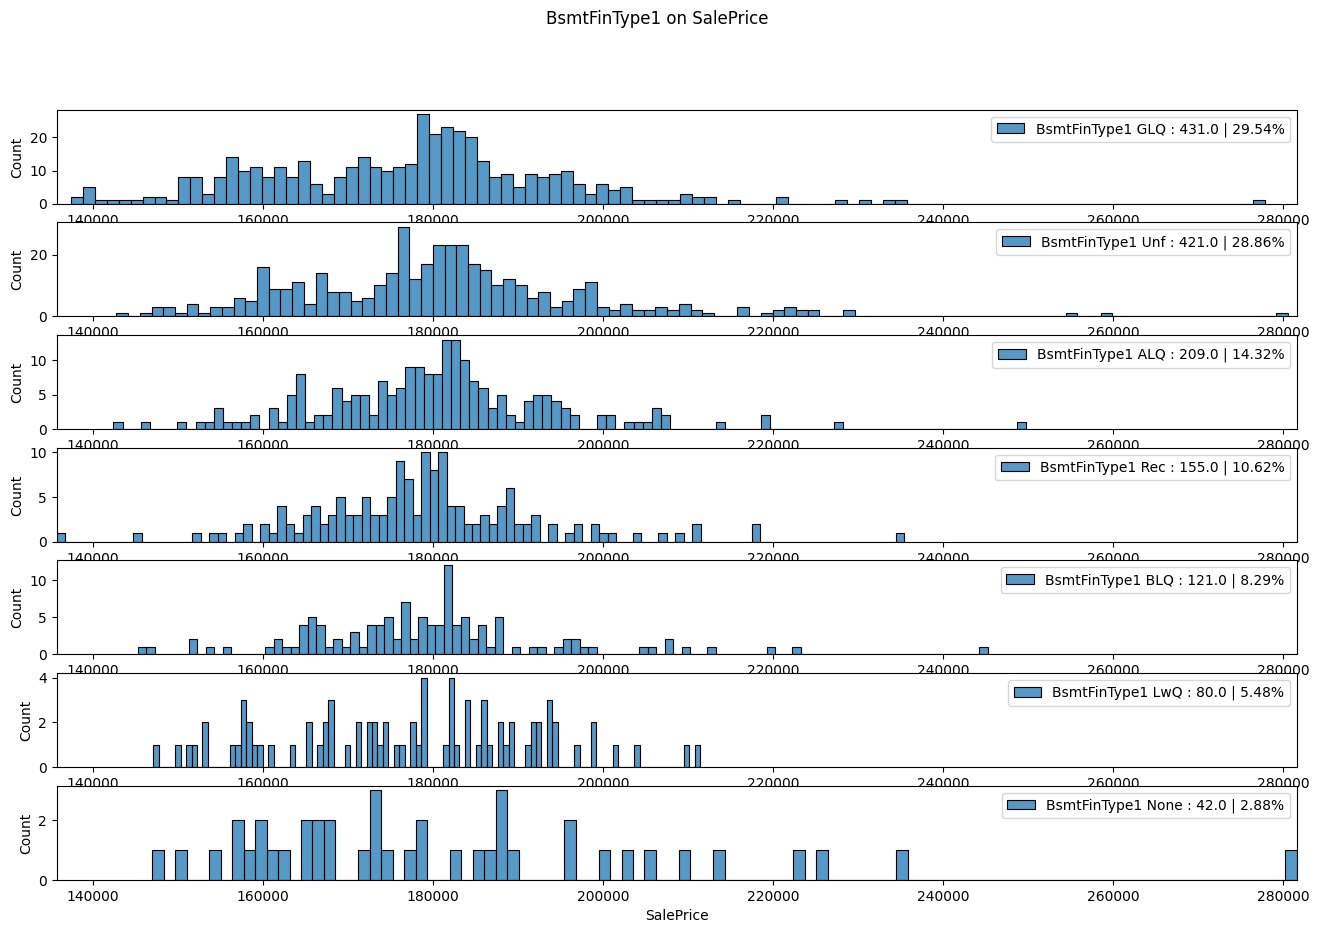

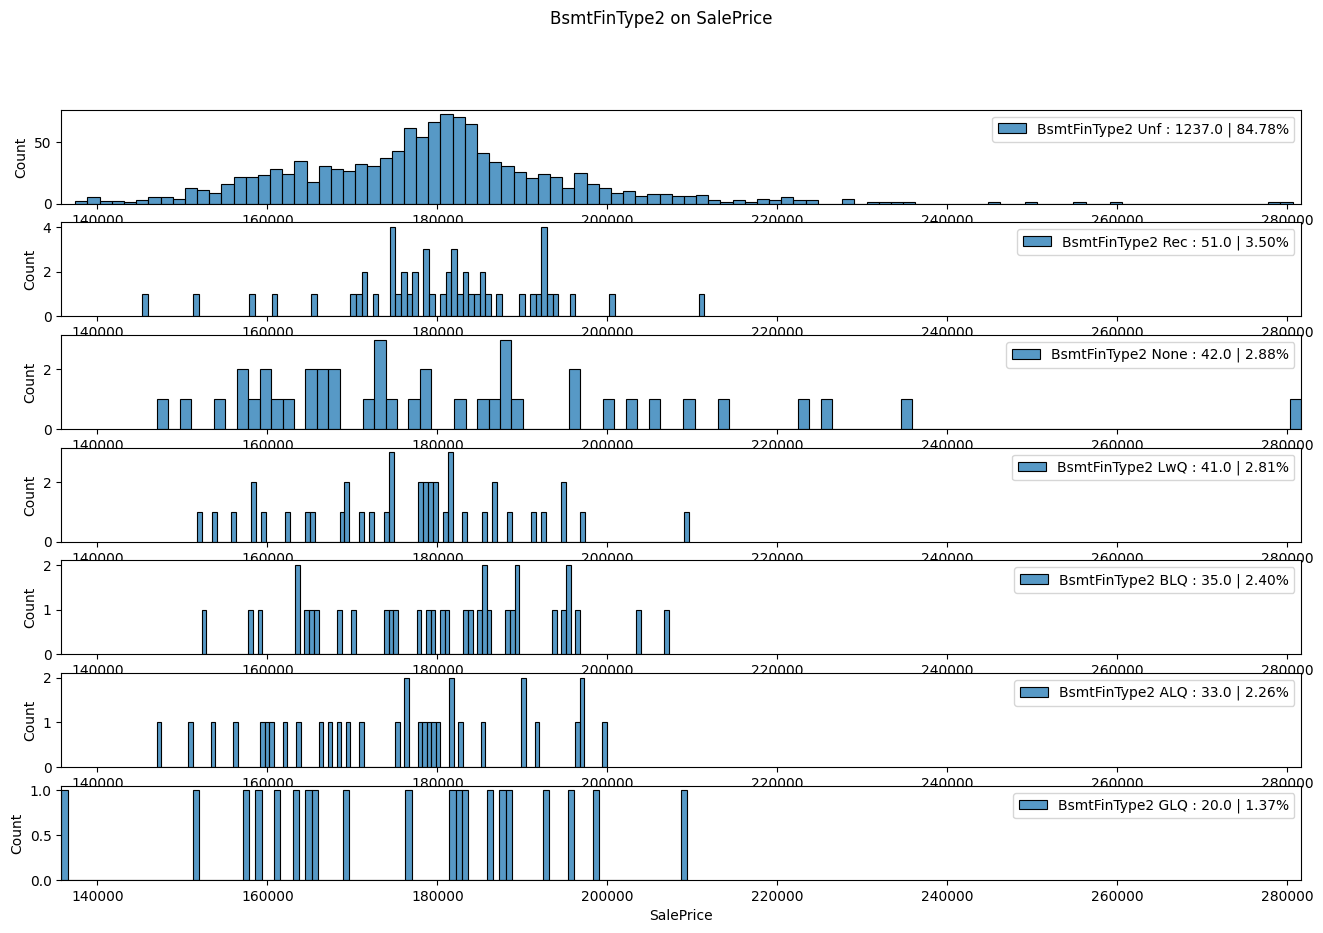

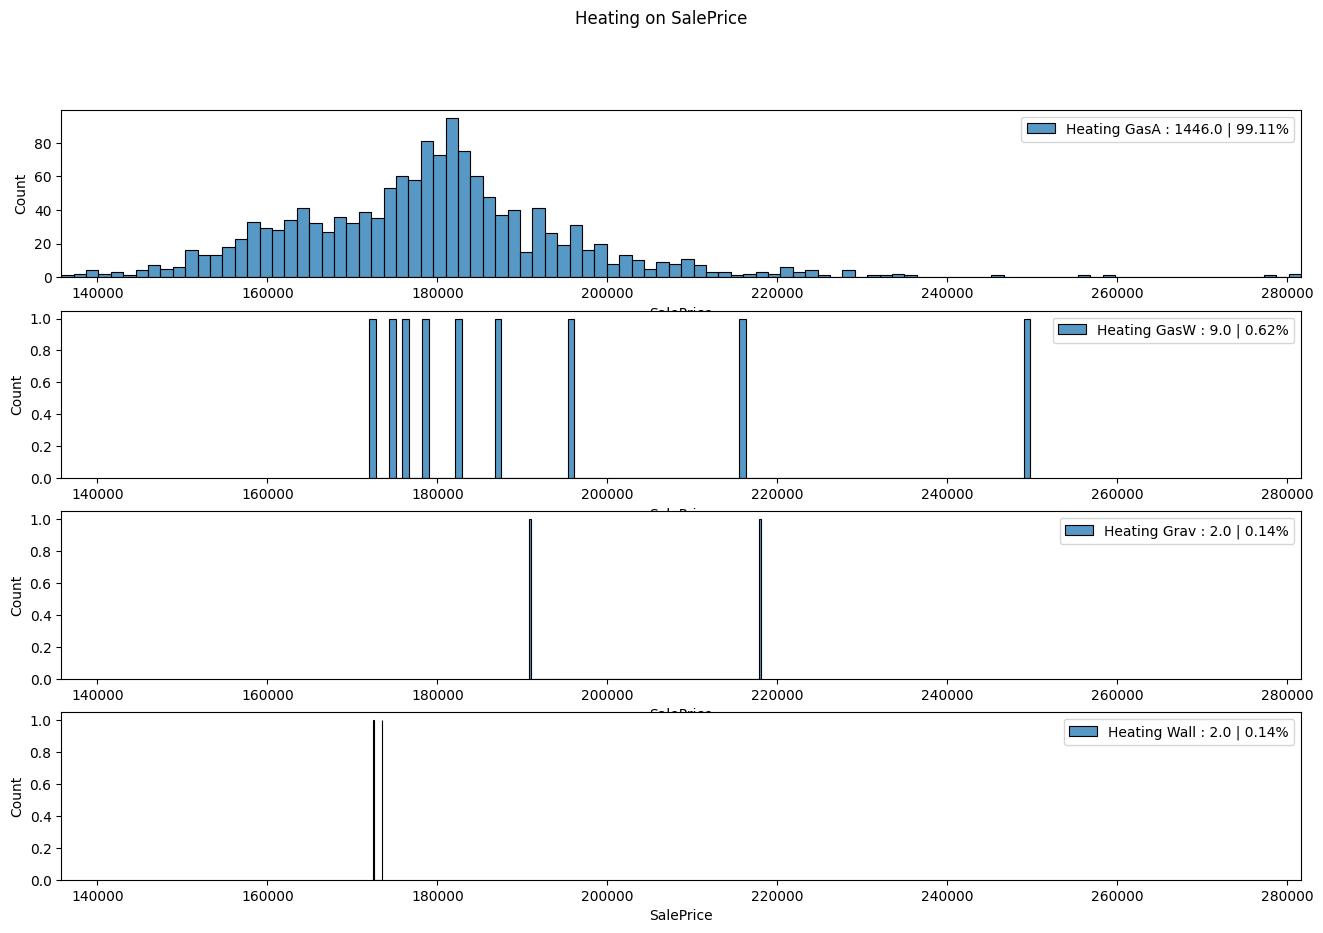

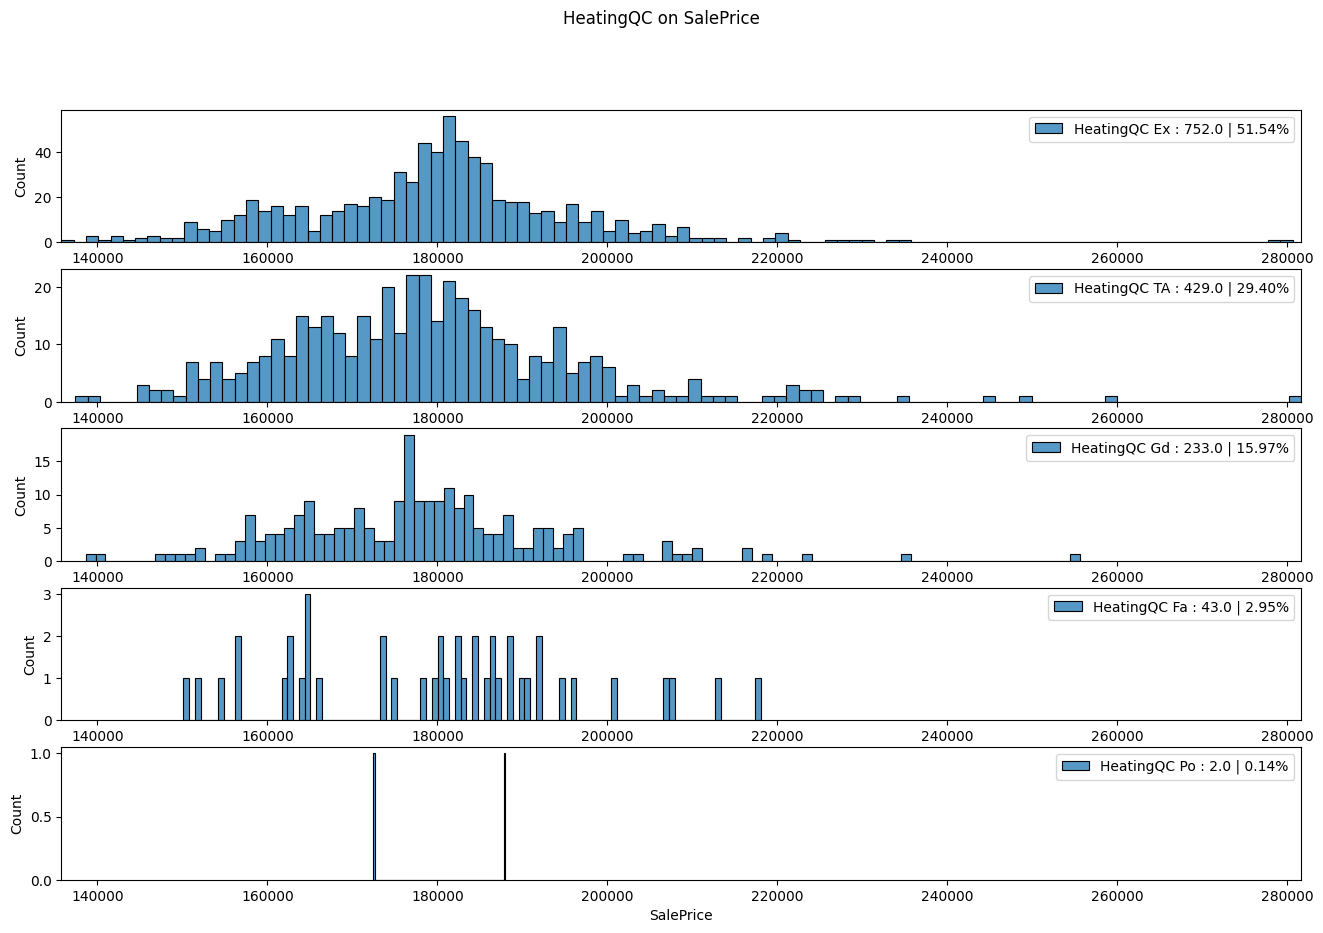

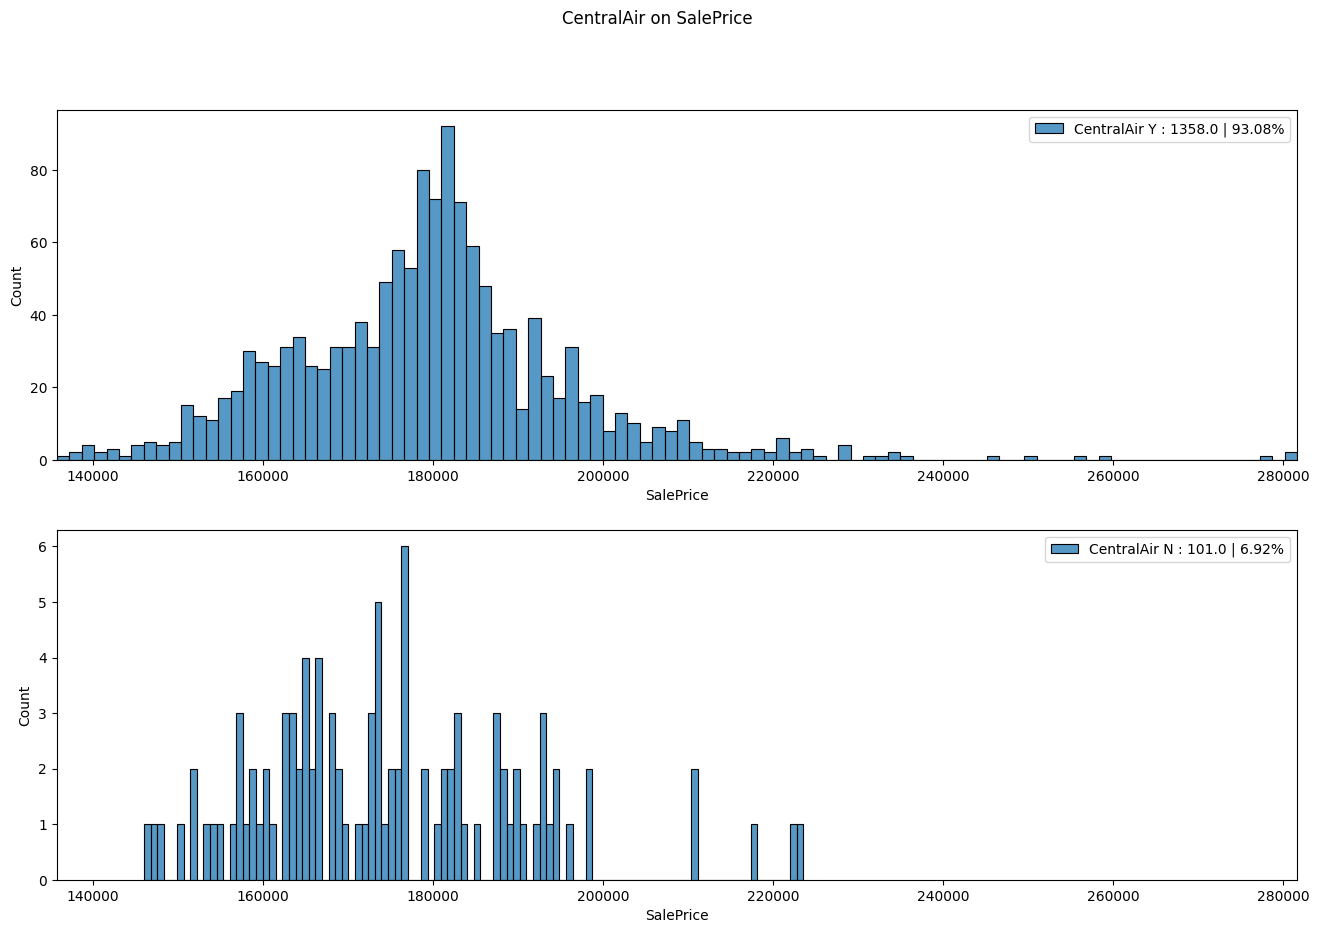

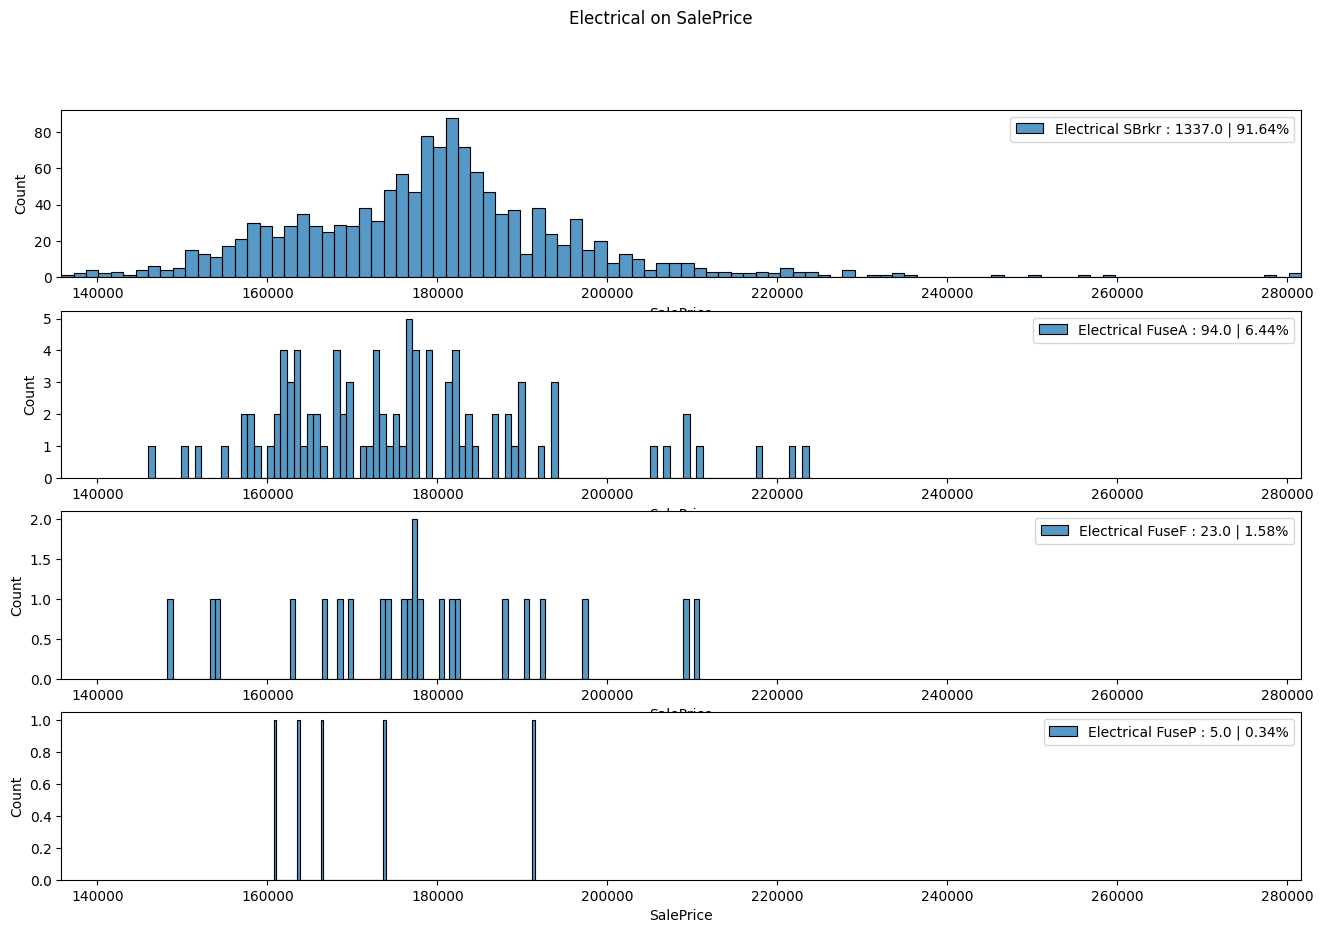

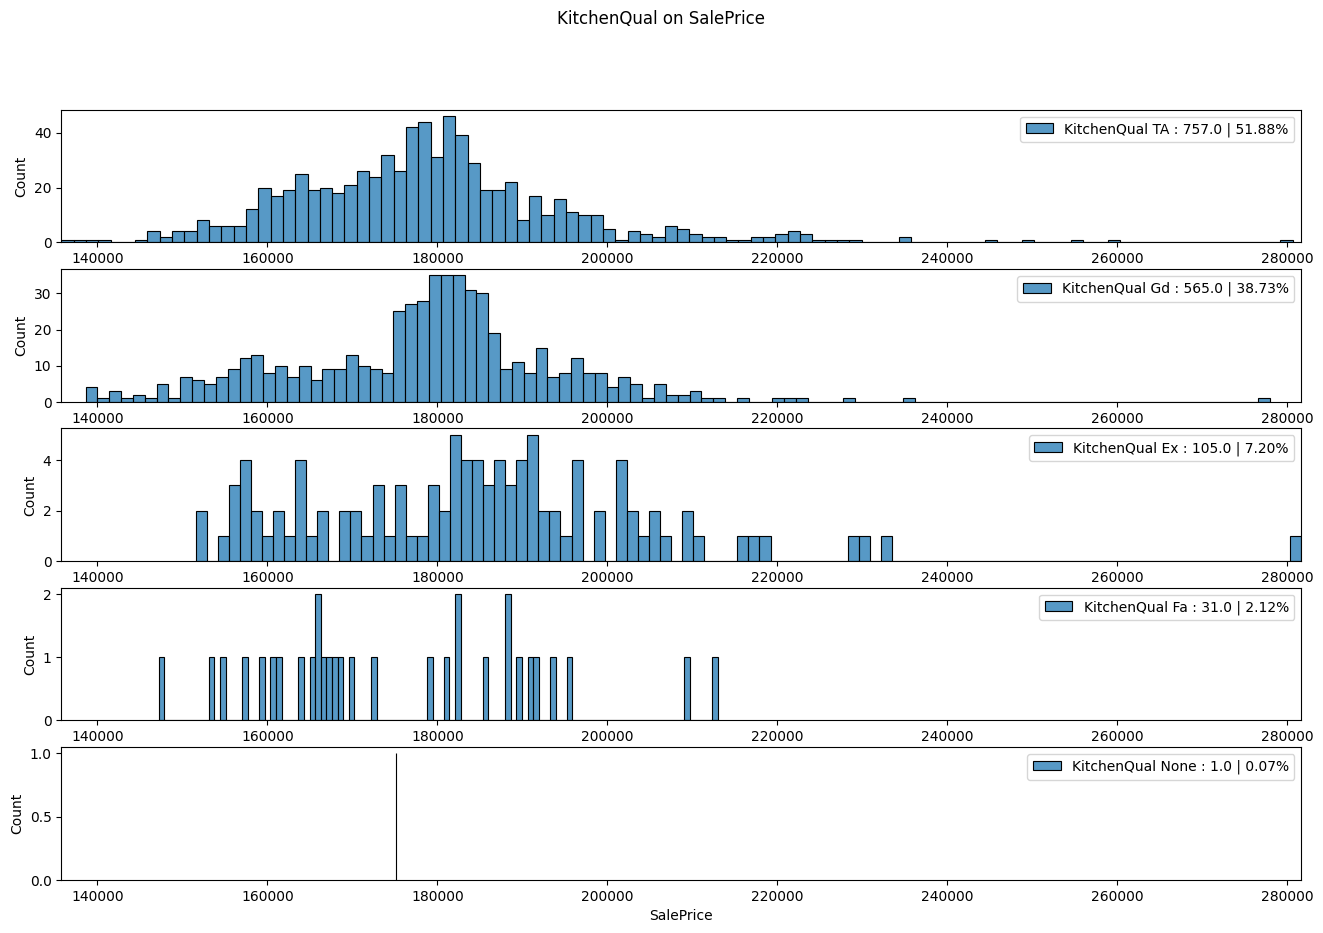

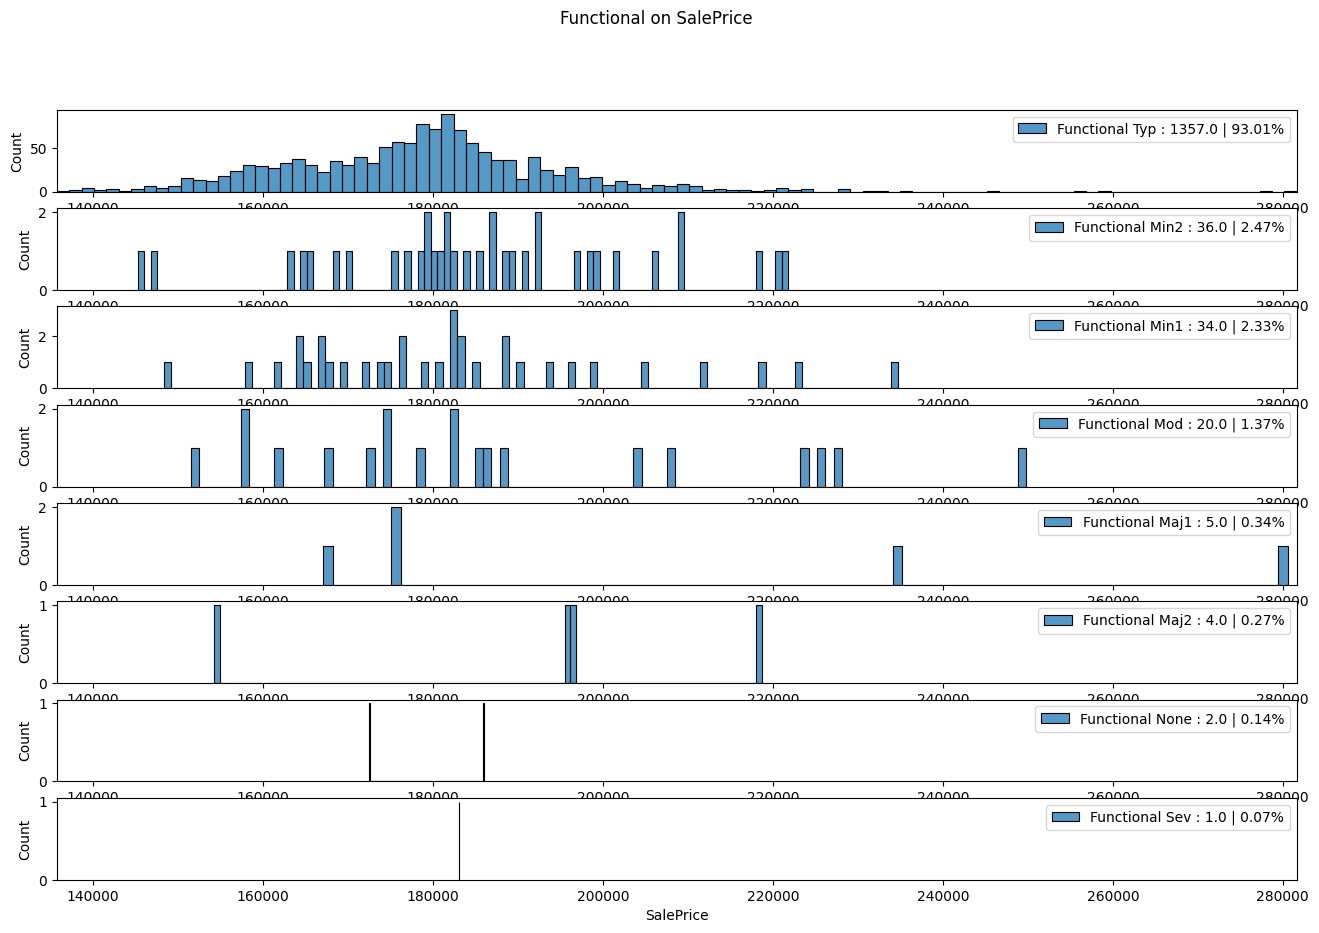

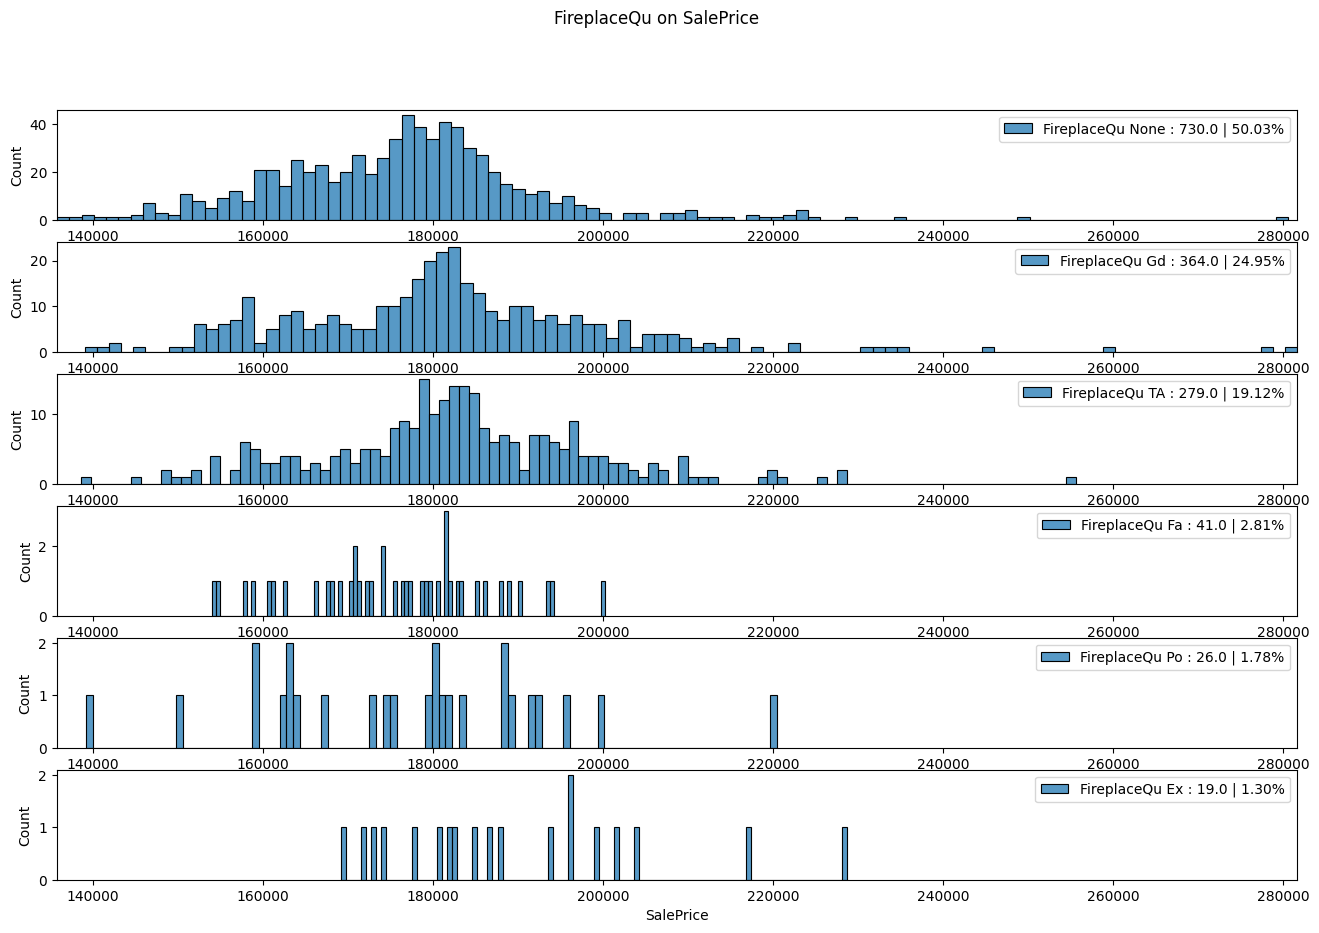

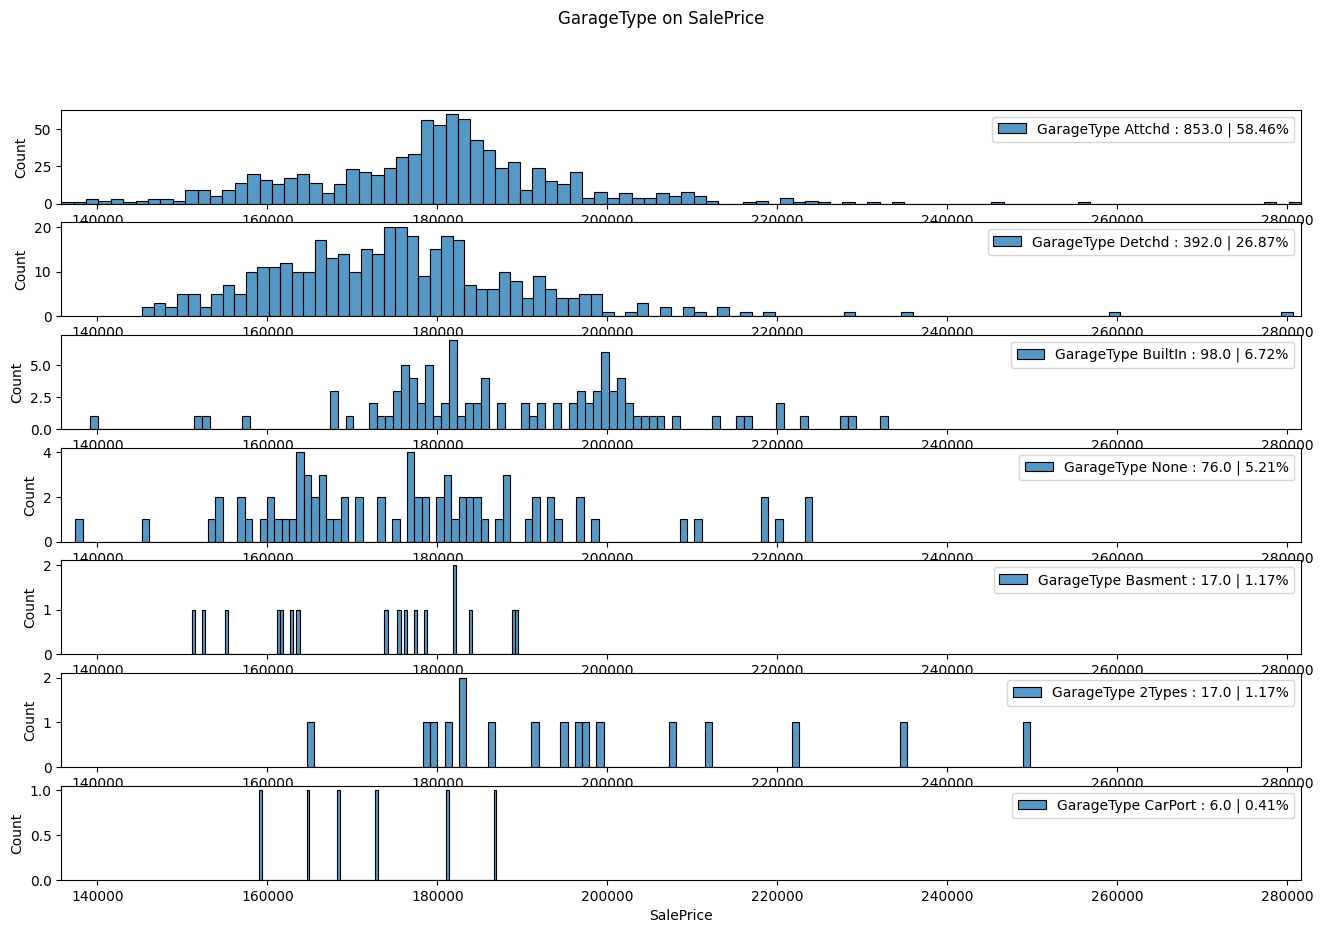

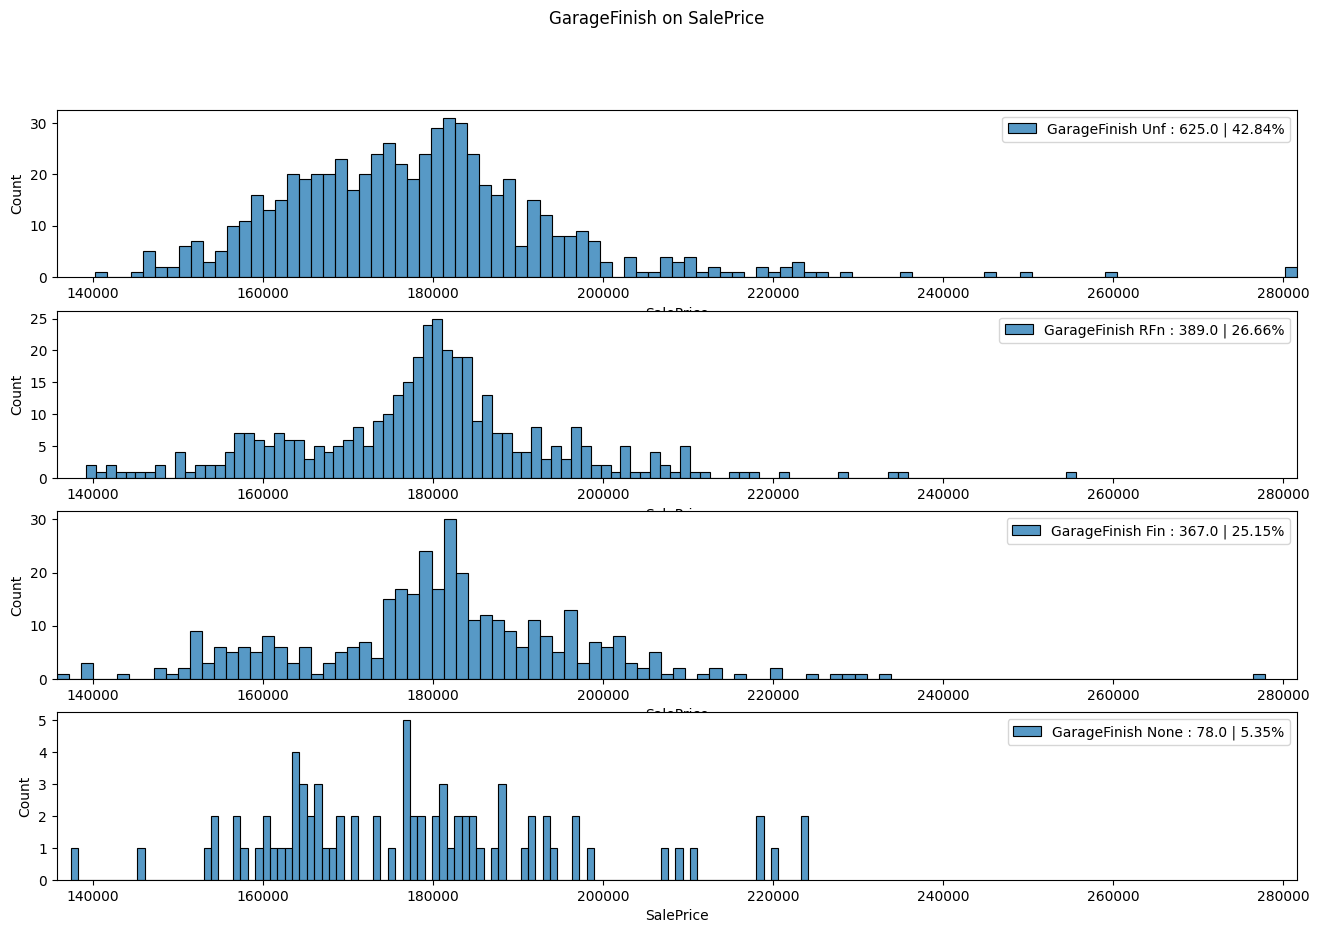

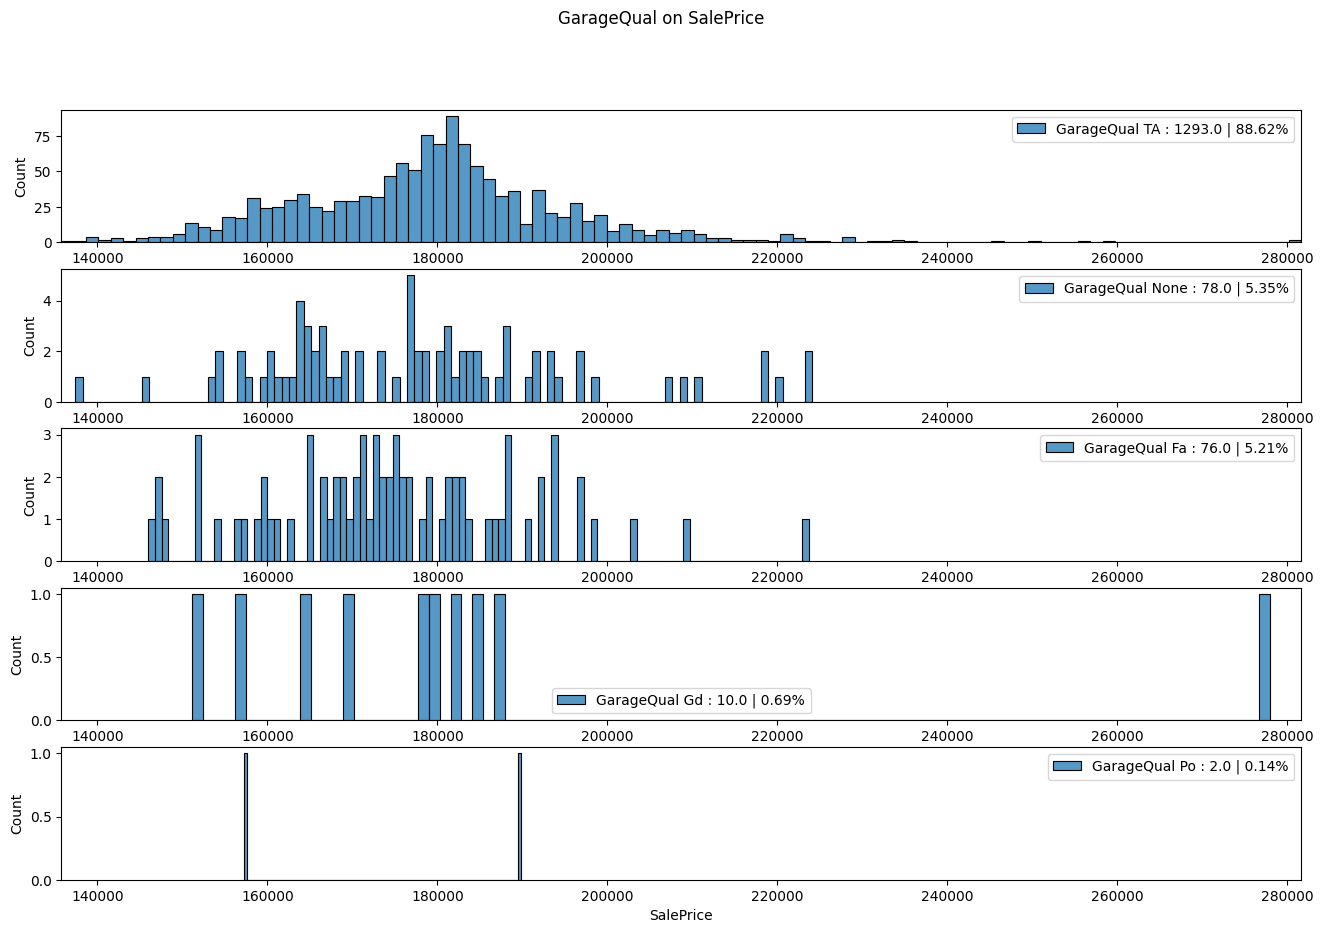

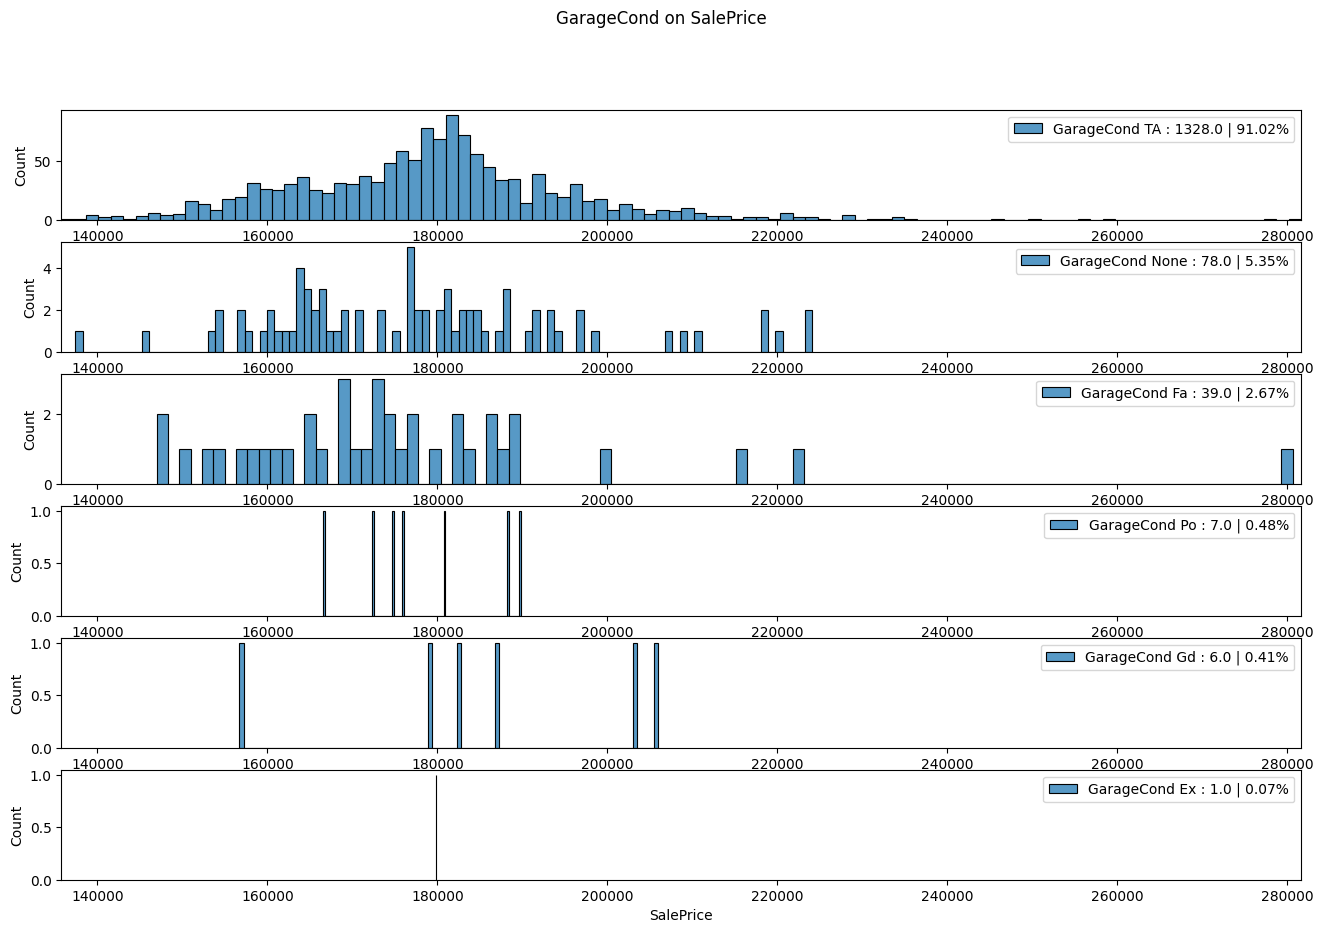

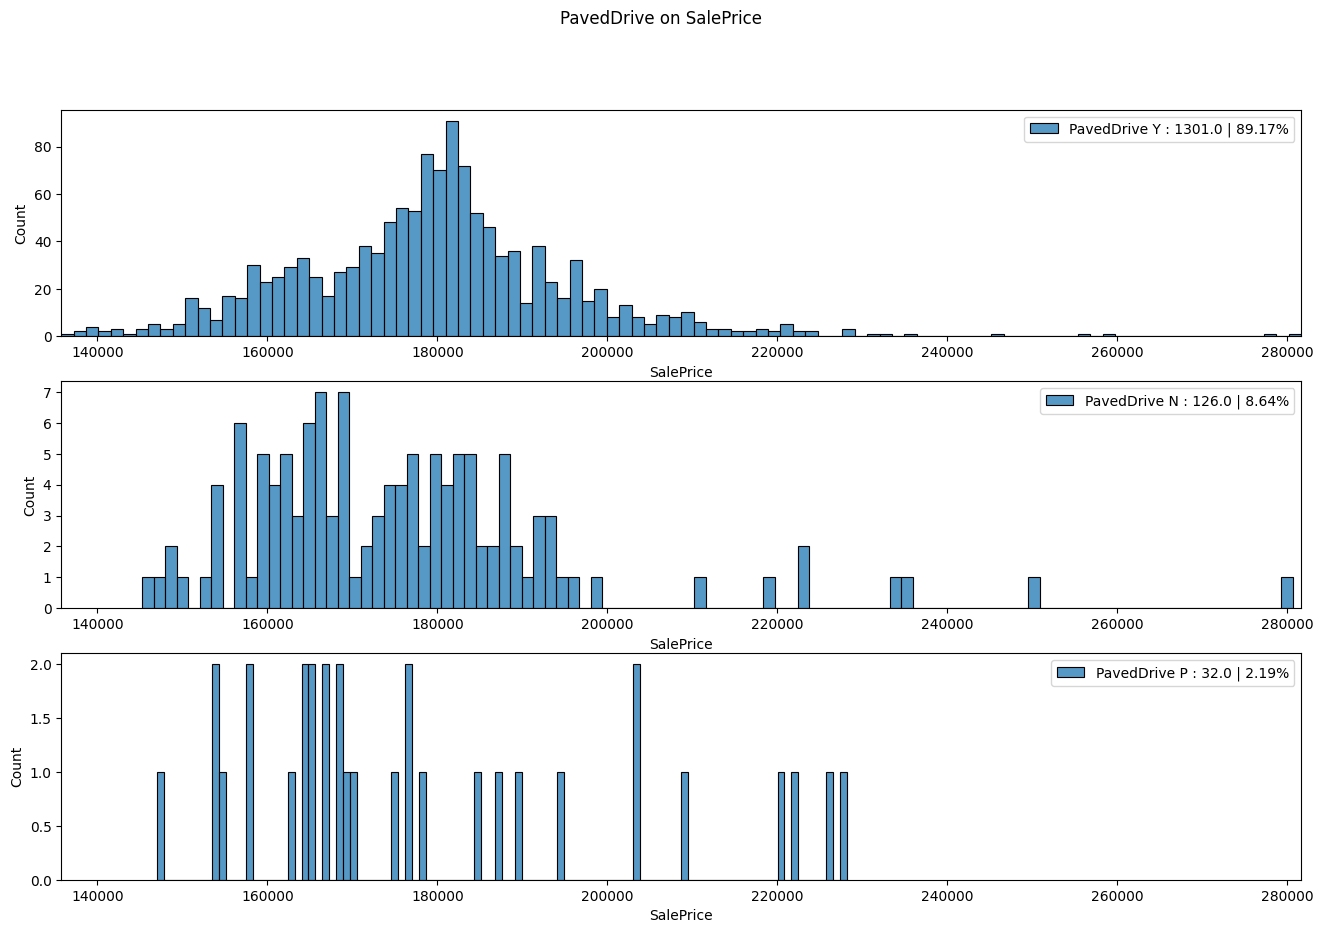

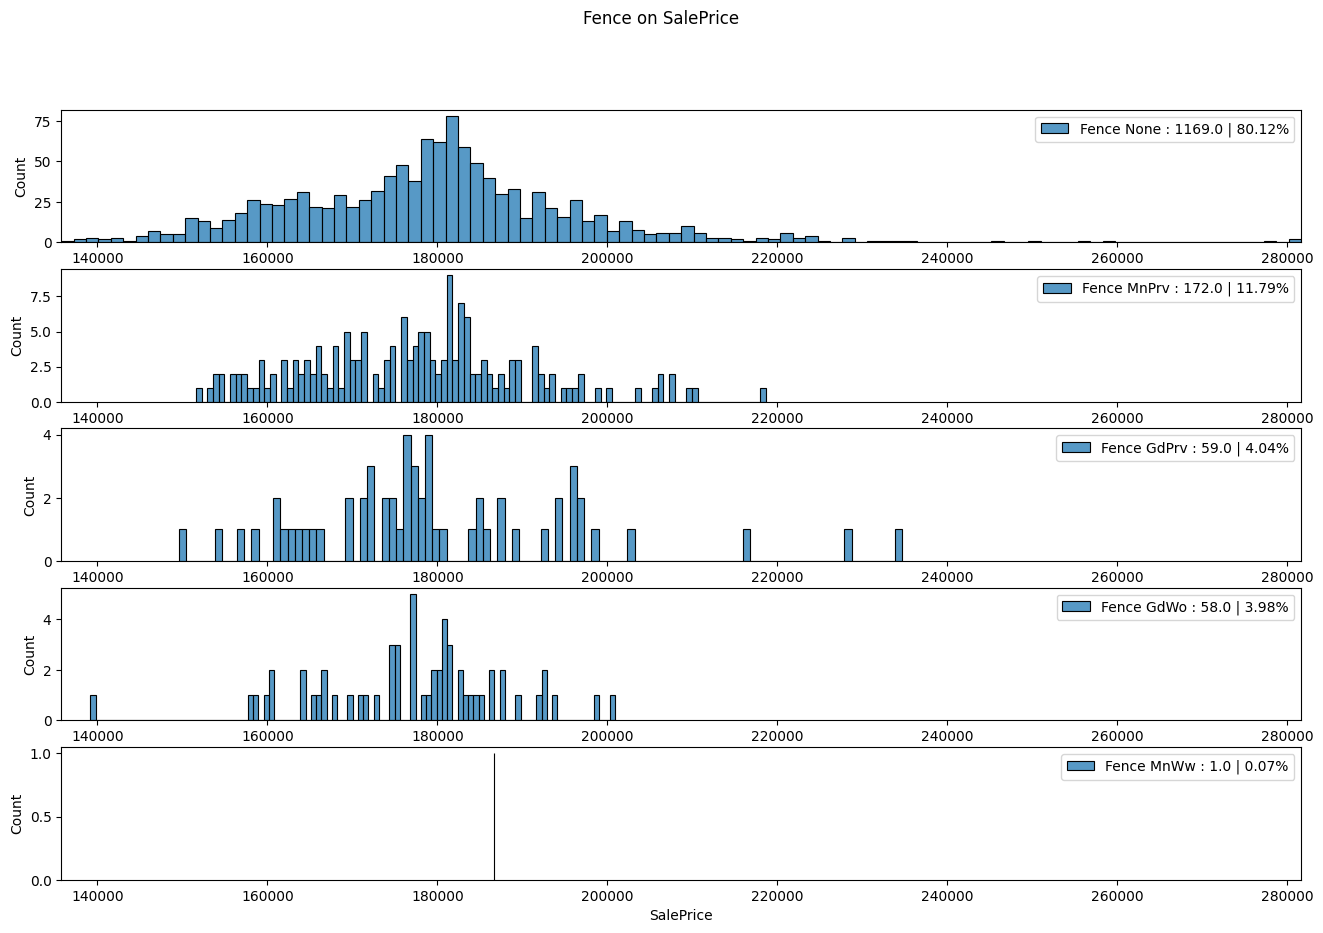

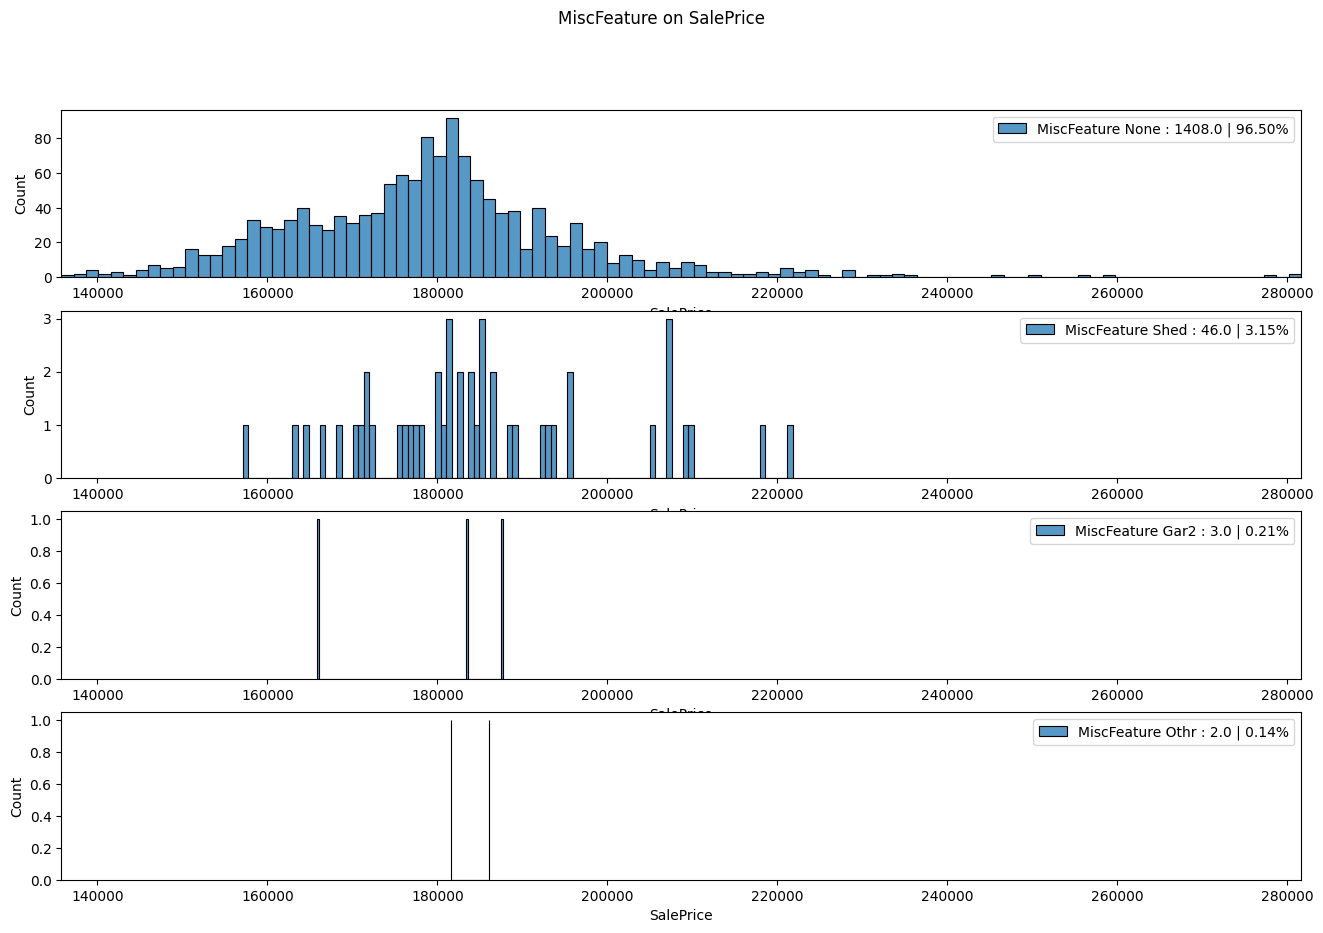

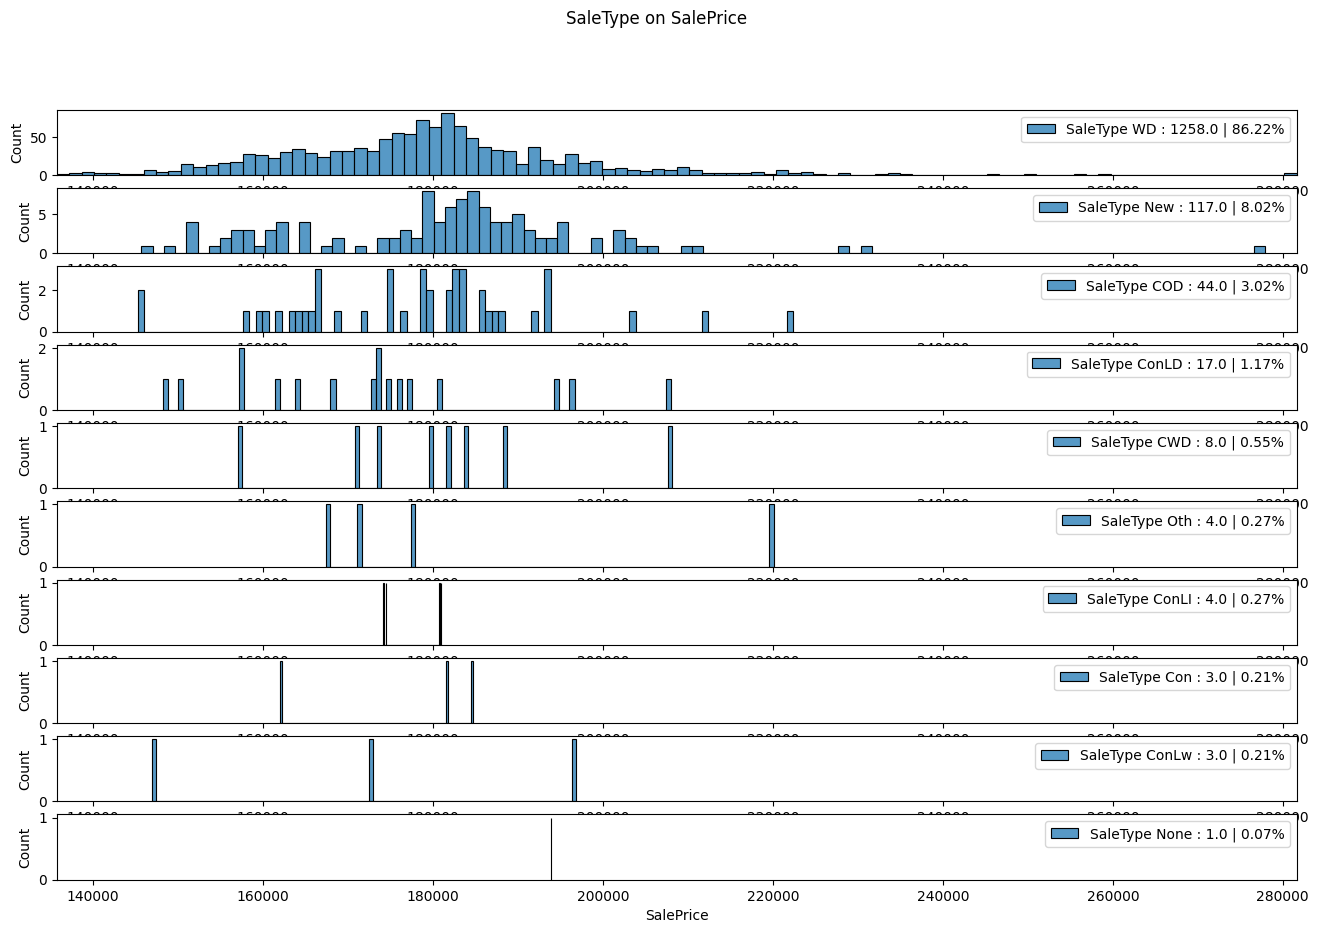

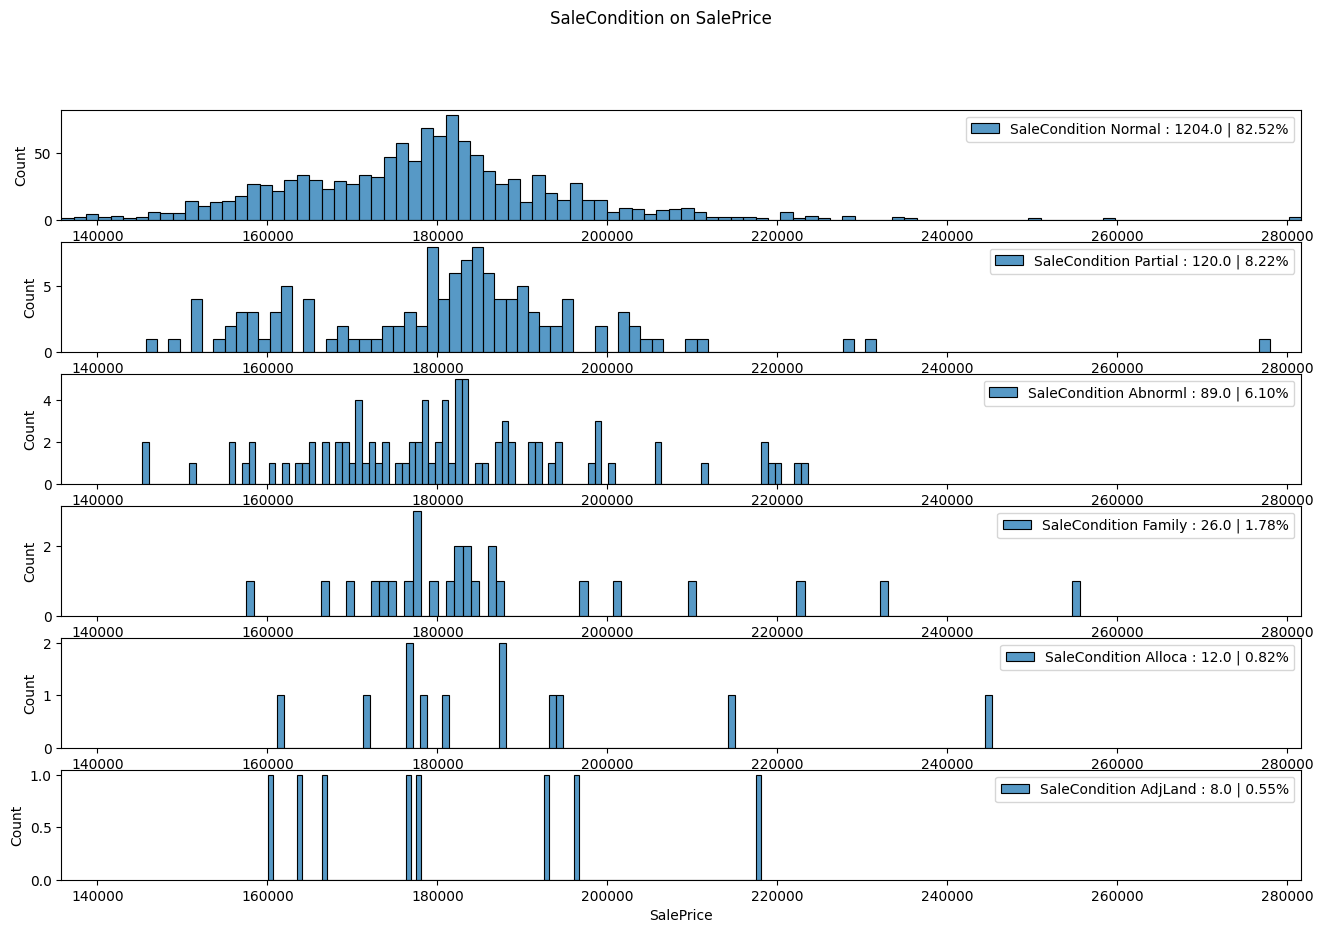

In [35]:
number_cols = get_data_type(test_data_csv, PDataType.CATHEGORICAL).sample(n = 10)
print(number_cols.columns.to_numpy())
plot_hist_for_unique_category_array(test_data_csv, number_cols.columns.to_numpy(), 'SalePrice');

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces


/home/mg/AI_Py_3_10/lib/python3.10/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
SalePrice


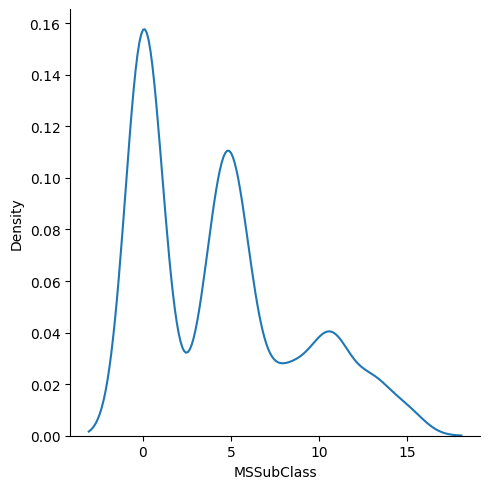

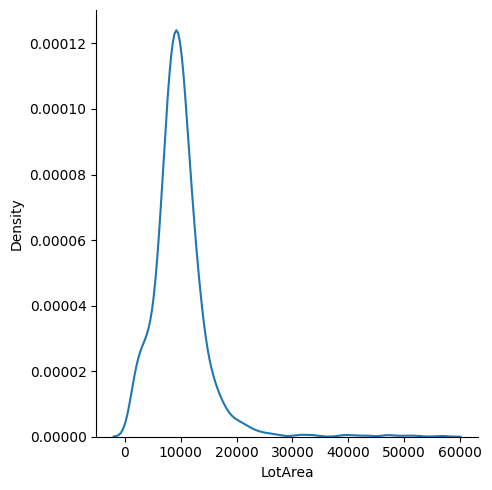

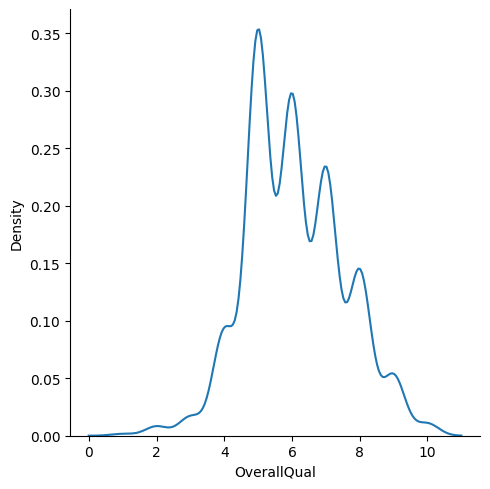

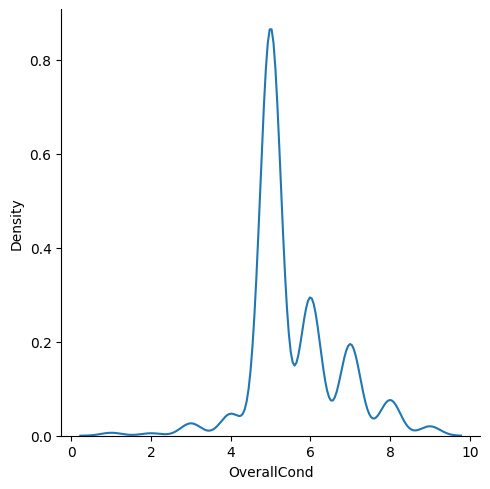

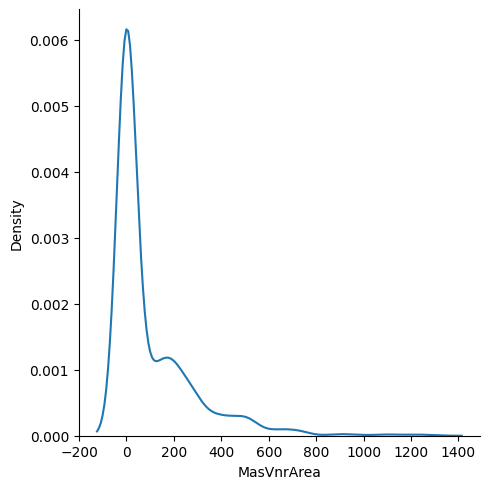

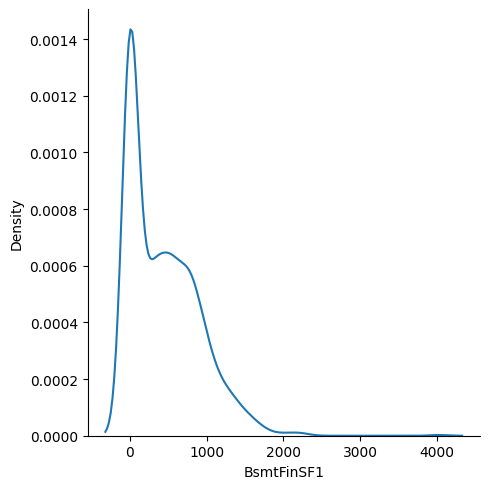

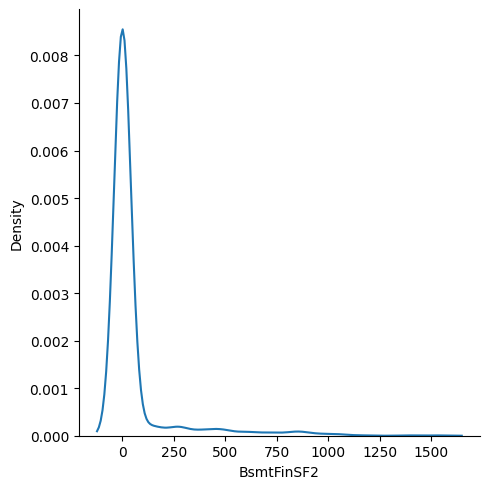

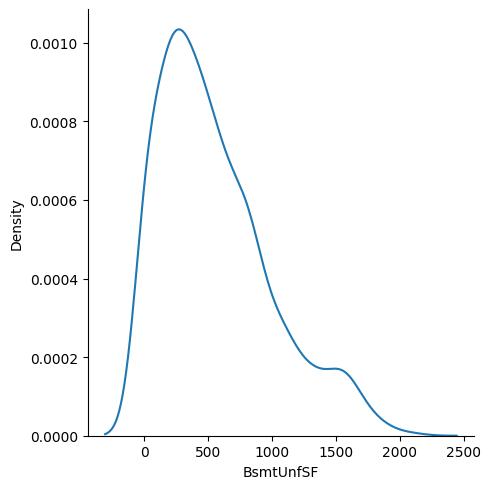

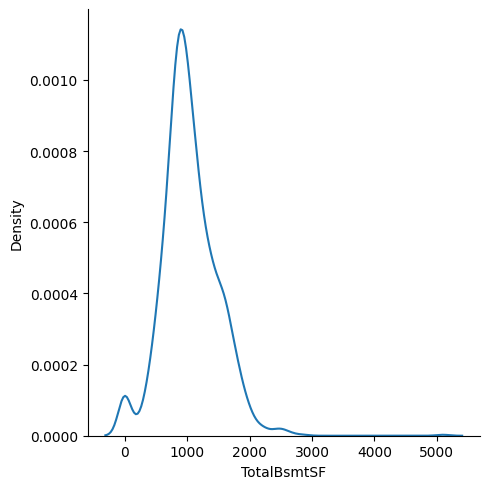

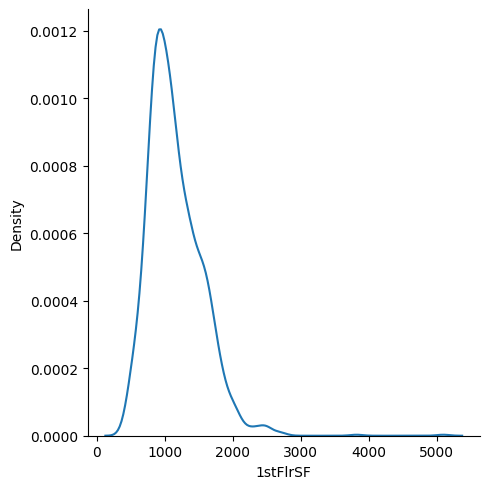

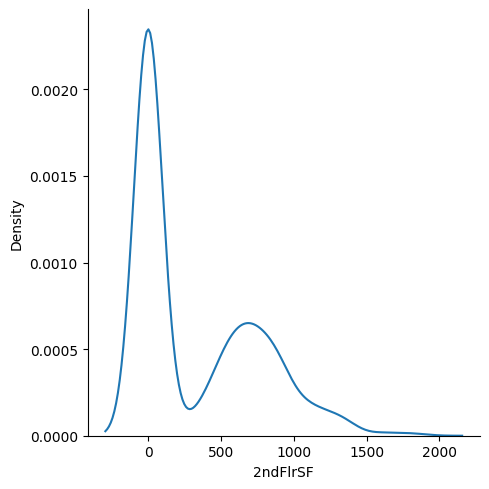

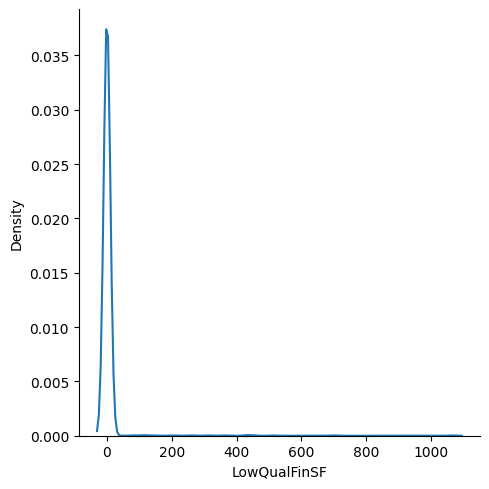

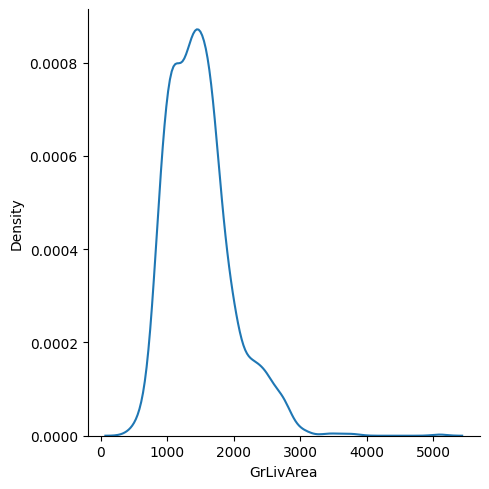

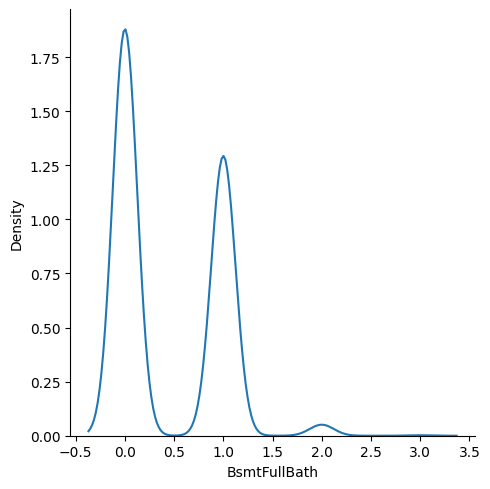

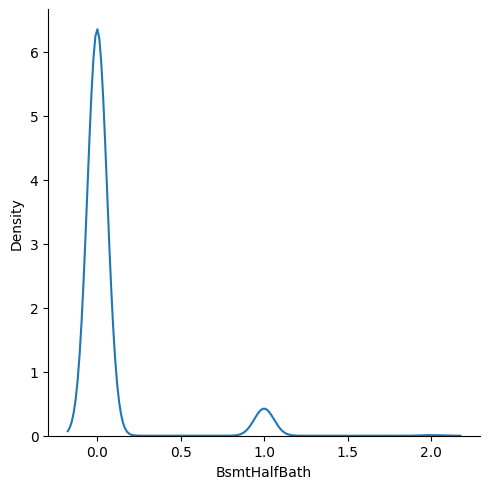

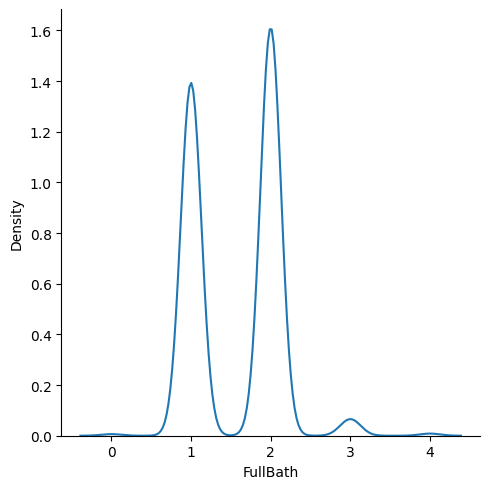

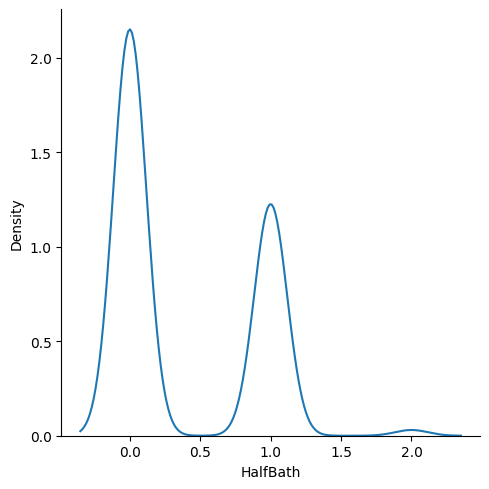

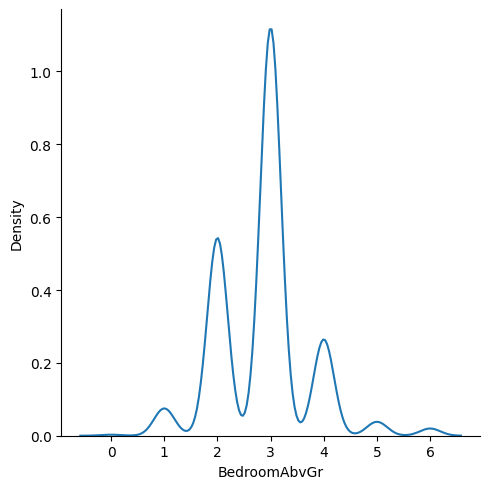

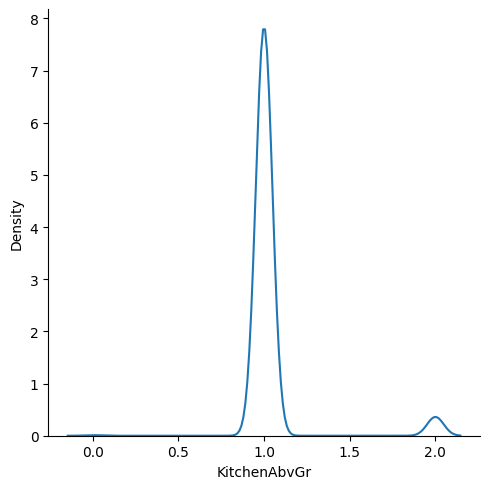

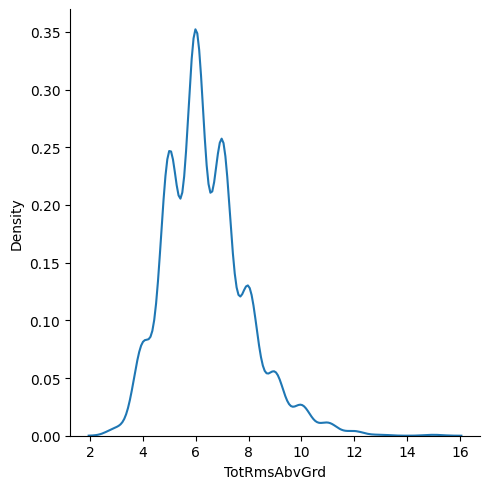

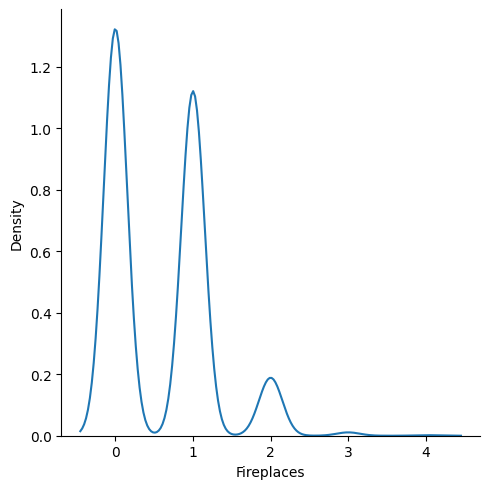

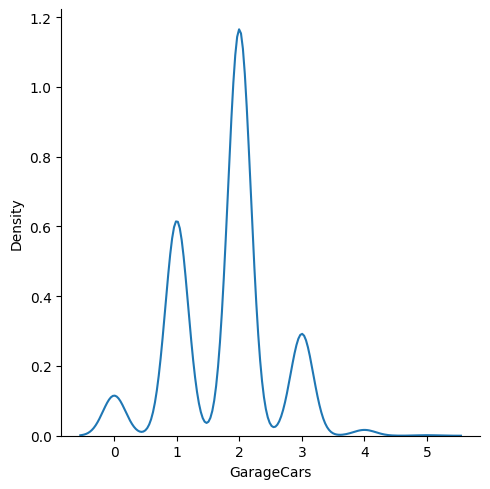

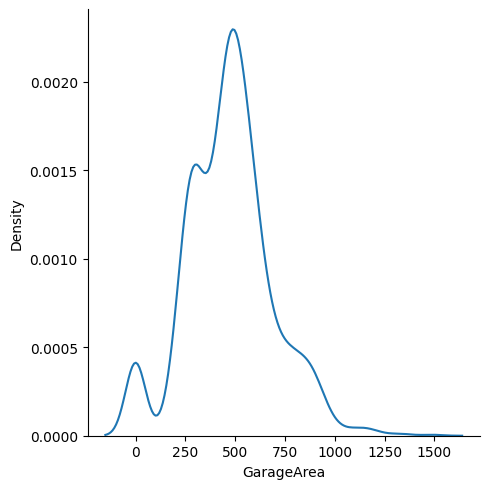

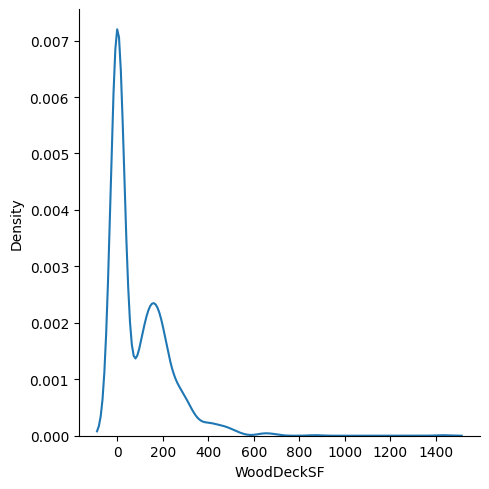

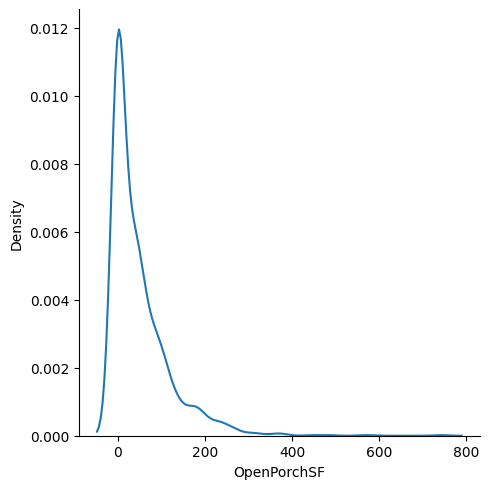

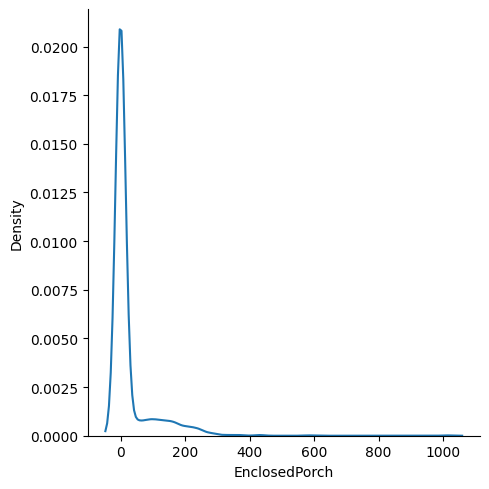

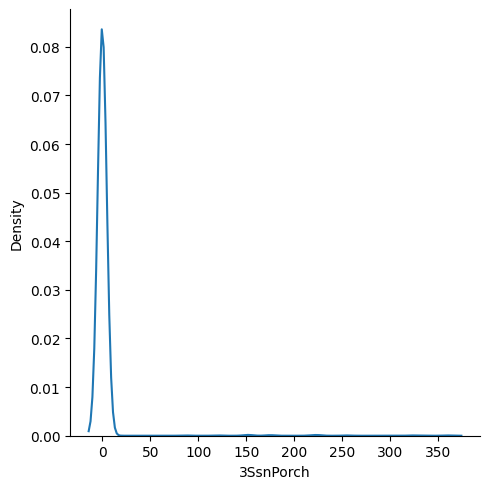

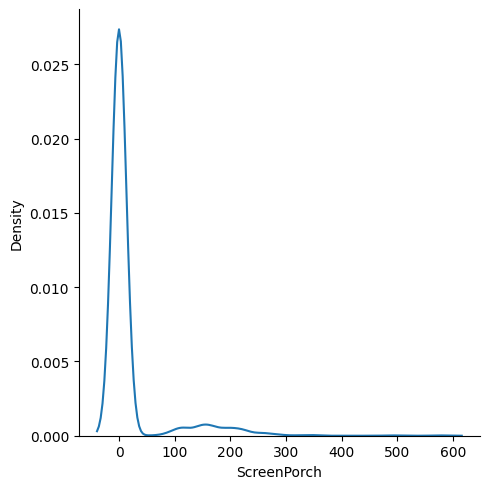

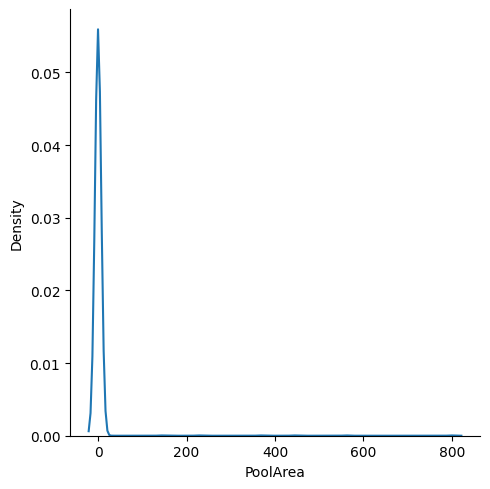

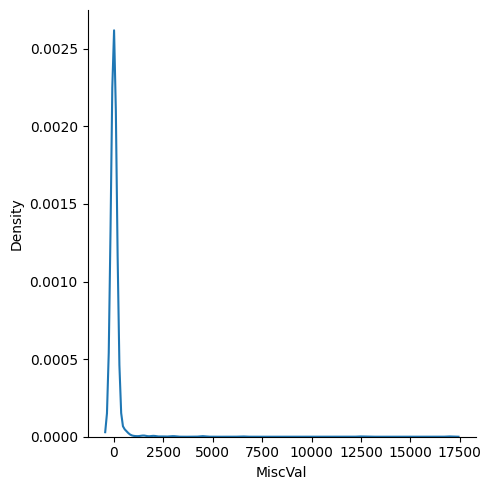

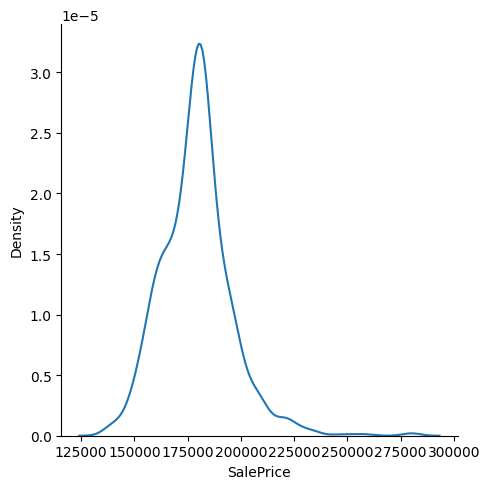

In [36]:
number_col_names = get_data_type(test_data_csv,PDataType.NUMERICAL)
if not DO_NOT_PLOT:
    for c in number_col_names:
        print(c)
        sns.displot(test_data_csv[c], kind = 'kde') # I have no idea what it means the KDE..


## DRAW correlation Matrix for SalePrice

SalePrice        1.000000
BedroomAbvGr     0.786022
LotArea          0.715795
TotRmsAbvGrd     0.625592
GrLivArea        0.566654
LotFrontage      0.501833
1stFlrSF         0.339335
2ndFlrSF         0.330785
FullBath         0.326312
GarageArea       0.250879
GarageCars       0.233308
HalfBath         0.223001
Fireplaces       0.213041
TotalBsmtSF      0.209069
BsmtUnfSF        0.179678
KitchenAbvGr     0.177035
OpenPorchSF      0.151314
MasVnrArea       0.150002
WoodDeckSF       0.109188
EnclosedPorch    0.094659
OverallQual      0.093643
MiscVal          0.081200
PoolArea         0.071271
ScreenPorch      0.041524
BsmtFinSF1       0.029932
LowQualFinSF     0.020544
BsmtFinSF2       0.002282
BsmtHalfBath    -0.007117
BsmtFullBath    -0.050680
3SsnPorch       -0.055704
OverallCond     -0.083753
MSSubClass      -0.158930
Name: SalePrice, dtype: float64


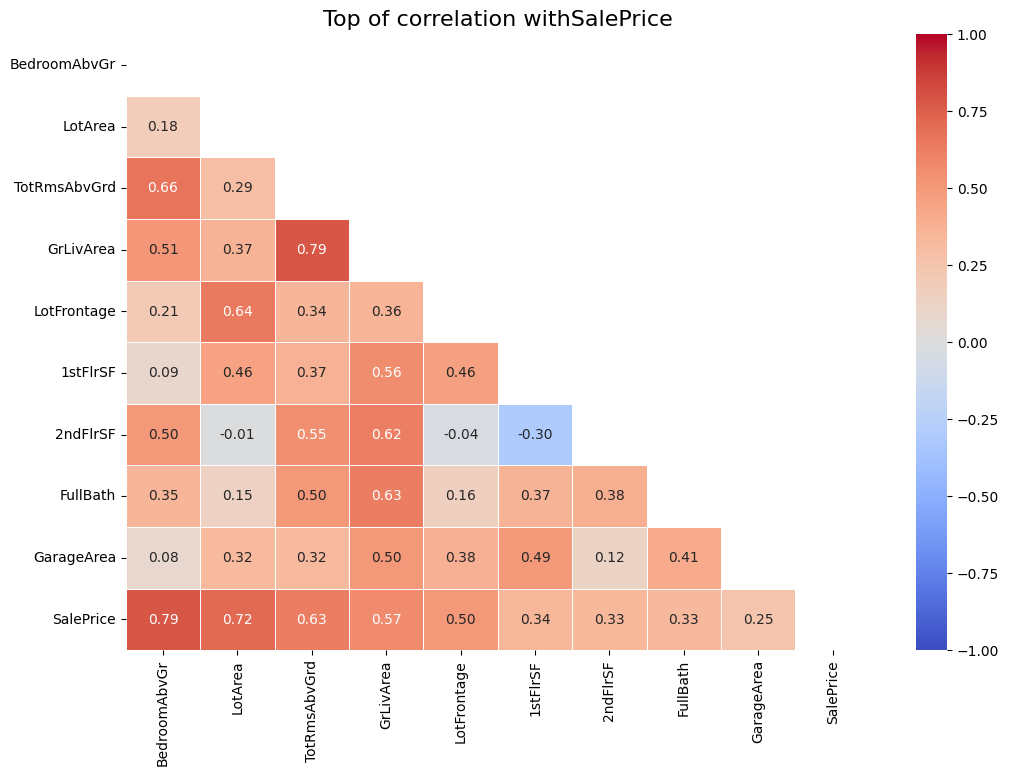

In [37]:
plot_correlation_for(test_data_csv,'SalePrice')


## Generate OneHotEncoders

In [38]:
import sys;
np.set_printoptions(threshold=sys.maxsize)
test_data_csv2 = pd.get_dummies(test_data_csv)
#for c in test_data_csv2.columns:
#    print(c)
print(len(test_data_csv2.columns))
print(len(test_data_csv.columns))

288
78


In [39]:
!pip install scikit-learn

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [41]:
features = [col for col in test_data_csv2._get_numeric_data().columns if col !='SalePrice']
features
X = test_data_csv2[features]
y = test_data_csv2['SalePrice']
print(X.columns)



Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_New', 'SaleType_None', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=283)


In [42]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
ss = StandardScaler()
ss.fit(x_train) # WHat is that?...

X_train_scaled = ss.transform(x_train)
X_test_scaled = ss.transform(x_train)

In [44]:
def scikit_model_vis(y_valid, y_pred):
    plt.figure()
    plt.scatter(y_valid, y_pred)
    plt.xlabel('ground truth (y_valid)')
    plt.ylabel('predict (y_pred)')
    plt.show()

    print(f'MAE: {metrics.mean_absolute_error(y_valid, y_pred):.2f}')
    print(f'MSE: {metrics.mean_squared_error(y_valid, y_pred):.2f}')
    print(f'R2: {metrics.r2_score(y_valid, y_pred):.2f}')

## Is it ok or no? I have no idea

In [45]:
from sklearn.linear_model import LinearRegression

reg_orig = LinearRegression()
reg_orig.fit(x_train, y_train)
y_pred = reg_orig.predict(x_valid)

scikit_model_vis(y_valid, y_pred)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

For dropped columns that have less than 90% of 1 cathegorical data the output is:
MAE: 2987.60
MSE: 13901067.82
R2: 0.94
Is it better? or not? I have no idea ; )

In [ ]:
print(x_train)


In [ ]:
print(x_valid)


In [ ]:
print(y_train)


In [ ]:
print(y_valid )

In [ ]:
y_pred